In [1]:
import numpy as np
from scipy import stats
import pandas as pd
import nltk

import matplotlib.pyplot as plt
# import requests
# import urllib.request
from matplotlib import rc
import seaborn as sns

%matplotlib inline
# %matplotlib nbagg
# import mpld3
# mpld3.enable_notebook()
from matplotlib.axis import Axis 
from matplotlib import interactive
interactive(True)
# %matplotlib qt

# sets the width and height of the plots in inches
plt.rcParams['figure.figsize'] = [10, 5]



from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

In [2]:
tripadv=pd.read_csv('tripadvisor.csv')
tripadv.columns = ['Attraction', 
                   'City', 
                   'Posted', 
                   'Visited', 
                   'User_Reviews', 
                   'User_Helpful',
                   'Review_Helpful', 
                   'Rating', 
                   'Text', 
                   'Title', 
                   'Username', 
                   'User_Location']

In [3]:
tripadv.loc[tripadv.Posted=='8-Jul', :]

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Location
13716,Petersen Automotive Museum,Los Angeles,8-Jul,0,33,14,0,5,Robert Petersen published a lot of the magazin...,Great Stop for All,basicgrandpa,"Clifton, Virginia"
13723,Petersen Automotive Museum,Los Angeles,8-Jul,0,698,101,1,5,"I am NOT AT ALL interested in cars, but I thou...",MUCH better than expected,JdeP,London


In [4]:
tripadv['Posted'] = tripadv['Posted'].apply(lambda x: x.zfill(6))

In [5]:
tripadv['Visited'] = tripadv['Visited'].apply(lambda x: x.zfill(6) if x != '' else None)

In [6]:
tripadv['Posted'] = pd.to_datetime(tripadv['Posted'].astype(str), format='%y-%b')

In [7]:
tripadv.loc[tripadv.Visited=='000000', :]

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Location
2023,The Art Institute of Chicago,Chicago,2019-05-01,000000,125,42,0,5,A day is not enough for the beautiful artifact...,A day is not enough...,CyprusEffie,"Larnaca, Cyprus"
2203,The Art Institute of Chicago,Chicago,2018-09-01,000000,98,26,0,5,I spent several hours here and still didnâ€™t ...,Amazing,eightohtwo,"Burlington, Vermont"
2535,The Art Institute of Chicago,Chicago,2019-07-01,000000,46,33,1,5,Superb quality and impossible to take all of i...,Could return many times to this museum,JS19772017,"Kansas City, Kansas"
2695,The Art Institute of Chicago,Chicago,2020-01-01,000000,5,0,0,5,You must visit this Chicago staple. They have ...,Fantastic.,jules,"Chicago, Illinois"
2797,The Art Institute of Chicago,Chicago,2019-09-01,000000,43,9,0,5,This museum has a great collection of art from...,Great Art Museum,AdamB16,"Iowa City, Iowa"
...,...,...,...,...,...,...,...,...,...,...,...,...
36357,The National 9/11 Memorial & Museum,New York City,2020-02-01,000000,2,0,0,5,My party of six included my aging parents. Guy...,"""The Guy""",Jeff Cole,"Indianapolis, Indiana"
36470,The National 9/11 Memorial & Museum,New York City,2020-02-01,000000,159,54,1,5,The memorial is so moving and beautiful So hea...,A moving must see!,jadehardman1983,"Swinton, United Kingdom"
36621,The National 9/11 Memorial & Museum,New York City,2020-03-01,000000,432,1,3,4,The 9/11 Memorial Museum tour helps give peopl...,The Ideal Learning Experience for Out-of-Towners,Richard L. Entrup,"New York City, New York"
36682,The National 9/11 Memorial & Museum,New York City,2020-06-01,000000,35,73,3,5,This was so beautifully done. From outside at ...,Wow,Jana T,NaN


In [8]:
tripadv['Visited'] = pd.to_datetime(tripadv['Visited'].astype(str), format='%y-%b', errors='coerce')

In [9]:
tripadv.loc[2023,]

Attraction                             The Art Institute of Chicago
City                                                        Chicago
Posted                                          2019-05-01 00:00:00
Visited                                                         NaT
User_Reviews                                                    125
User_Helpful                                                     42
Review_Helpful                                                    0
Rating                                                            5
Text              A day is not enough for the beautiful artifact...
Title                                        A day is not enough...
Username                                                CyprusEffie
User_Location                                       Larnaca, Cyprus
Name: 2023, dtype: object

In [10]:
tripadv.shape

(38294, 12)

In [11]:
tripadv.sample(15)

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Location
17567,The Getty Center,Los Angeles,2018-10-01,2018-10-01,720,372,0,5,The Getty Center is a must if you are in Los A...,Fabulous,abarasol,"Clifton Park, New York"
22487,Museum of Fine Arts,Boston,2019-10-01,2019-09-01,222,29,0,5,Boston's Museum of Fine Arts (MFA) ranks among...,One of the Best,LouisEbarb,"Da Nang, Vietnam"
25335,North End,Boston,2017-09-01,2017-09-01,86,48,0,5,A must visit when in Boston. Paul Revere's hou...,A must!,TS1959,"Bucks County, Pennsylvania"
30378,Museum of Science and Industry,Chicago,2019-06-01,2019-06-01,72,31,1,5,I took my kids there over 30 years ago and was...,Awesome!,dbingDayton_OH,"New Port Richey, Florida"
31694,Museum of Science and Industry,Chicago,2019-12-01,2019-12-01,1,0,0,5,Iâ€™m homeschooling my 10-year old son for the...,Homeschool lab,AmyMomOf3SDS,NaN
35590,The National 9/11 Memorial & Museum,New York City,2019-12-01,2019-11-01,104,35,0,5,This was a very interesting Memorial & Museum....,First Trip to New York,RayJanG,"Llandrindod Wells, United Kingdom"
12203,Universal Studios Hollywood,Los Angeles,2019-04-01,2019-04-01,"4,779",730,0,5,This is a must do experience if you are visiti...,Must do in LA,Martino B,"Chelmsford, United Kingdom"
16840,The Getty Center,Los Angeles,2018-03-01,2018-03-01,92,25,0,5,"Great displays of art, sculpture and photograp...",Awesome displays,904-424-3593,"Jacksonville, Florida"
38030,Central Park,New York City,2020-02-01,2020-02-01,23,7,0,5,"We visited the park twice during our stay, onc...",Tranquility,Jane M,NaN
33768,Cloud Gate,Chicago,2019-07-01,2019-07-01,250,357,1,5,It was a cloudy and wet day during my visit to...,A Silver Bean under the Cloud (Gate),David L,NaN


In [12]:
# Split up the location column to grab all possible parts of the location

tripadv_loc = tripadv['User_Location'].str.split(', ', expand = True)
tripadv_loc.columns = ['User_Loc1', 'User_Loc2', 'User_Loc3', 'User_Loc4', 'User_Loc5']

tripadv_loc = tripadv_loc.fillna(value='').apply(lambda x: x.astype(str).str.upper())

tripadv = tripadv.drop(labels='User_Location', axis=1)
tripadv = pd.concat([tripadv, tripadv_loc], axis = 1)

tripadv = tripadv.sort_values(['City', 'Attraction'])
tripadv.sample(20)

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Loc1,User_Loc2,User_Loc3,User_Loc4,User_Loc5
21656,Museum of Fine Arts,Boston,2018-03-01,2018-03-01,42,14,0,5,This is a fabulous museum. Very easy to naviga...,Wonderful Experience,148henry,CHAPEL HILL,NORTH CAROLINA,,,
16491,The Wizarding World of Harry Potter,Los Angeles,2018-11-01,2018-10-01,15,32,2,3,I had a good time at this land. I really like ...,fun,Jayne,DAYTON,OHIO,,,
21525,Museum of Fine Arts,Boston,2017-12-01,2017-11-01,55,26,0,5,Excellent display of Money paintings. Went rou...,Beautiful Museum,Margaret G,GLASGOW,UNITED KINGDOM,,,
4243,The Metropolitan Museum of Art,New York City,2019-09-01,2019-09-01,100,62,0,5,"Wow, what a museum! Simply amazing! Set aside ...",Amazing Museum!,JAB,SALT LAKE CITY,UTAH,,,
5928,The Metropolitan Museum of Art,New York City,2020-03-01,2020-03-01,35,14,0,5,Wow!! Such a fantastic building with a ton of ...,Wow,kmmnb2,ROY,UTAH,,,
10028,Griffith Observatory,Los Angeles,2018-09-01,2018-09-01,63,5,0,5,We had 12 hours until we needed to be at LAX a...,Iconic building with fantastic views,RMFV,COLUMBUS,OHIO,,,
8521,Top of the Rock,New York City,2019-09-01,2019-09-01,12,11,1,5,"Went here recently and got the sunset ticket, ...",Views hard to beat,Sightsee779839,,,,,
33099,Cloud Gate,Chicago,2018-12-01,2018-12-01,225,67,0,5,On account of the freezing temperatures we did...,A Brisk Walk!,Claire,LIMERICK,IRELAND,,,
6005,Empire State Building,New York City,2019-12-01,2019-12-01,3,0,0,4,This was good to see but felt the price was a ...,Ok but expensive,Janet G,,,,,
13629,Universal Studios Hollywood,Los Angeles,2020-03-01,2020-02-01,53,28,1,5,We like the rides and tour here. A few rides w...,Fun Times and Harry Potter ride too!,rdhfn,WALLA WALLA,WASHINGTON,,,


In [13]:
st_abbr = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

from collections import Counter

st_abbr = {k.upper(): v for k, v in st_abbr.items()}
st_abbr

{'ALABAMA': 'AL',
 'ALASKA': 'AK',
 'AMERICAN SAMOA': 'AS',
 'ARIZONA': 'AZ',
 'ARKANSAS': 'AR',
 'CALIFORNIA': 'CA',
 'COLORADO': 'CO',
 'CONNECTICUT': 'CT',
 'DELAWARE': 'DE',
 'DISTRICT OF COLUMBIA': 'DC',
 'FLORIDA': 'FL',
 'GEORGIA': 'GA',
 'GUAM': 'GU',
 'HAWAII': 'HI',
 'IDAHO': 'ID',
 'ILLINOIS': 'IL',
 'INDIANA': 'IN',
 'IOWA': 'IA',
 'KANSAS': 'KS',
 'KENTUCKY': 'KY',
 'LOUISIANA': 'LA',
 'MAINE': 'ME',
 'MARYLAND': 'MD',
 'MASSACHUSETTS': 'MA',
 'MICHIGAN': 'MI',
 'MINNESOTA': 'MN',
 'MISSISSIPPI': 'MS',
 'MISSOURI': 'MO',
 'MONTANA': 'MT',
 'NEBRASKA': 'NE',
 'NEVADA': 'NV',
 'NEW HAMPSHIRE': 'NH',
 'NEW JERSEY': 'NJ',
 'NEW MEXICO': 'NM',
 'NEW YORK': 'NY',
 'NORTH CAROLINA': 'NC',
 'NORTH DAKOTA': 'ND',
 'NORTHERN MARIANA ISLANDS': 'MP',
 'OHIO': 'OH',
 'OKLAHOMA': 'OK',
 'OREGON': 'OR',
 'PENNSYLVANIA': 'PA',
 'PUERTO RICO': 'PR',
 'RHODE ISLAND': 'RI',
 'SOUTH CAROLINA': 'SC',
 'SOUTH DAKOTA': 'SD',
 'TENNESSEE': 'TN',
 'TEXAS': 'TX',
 'UTAH': 'UT',
 'VERMONT': 'VT',
 '

In [14]:
tripadv['User_Loc2'] = tripadv.User_Loc2.replace(st_abbr)
tripadv

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Loc1,User_Loc2,User_Loc3,User_Loc4,User_Loc5
0,Boston Tea Party Ships & Museum,Boston,2017-03-01,2017-03-01,360,186,0,5,We stopped over here on our way to the airport...,Entertaining and Educational,nadiag0610,SAN DIEGO,CA,,,
1,Boston Tea Party Ships & Museum,Boston,2017-03-01,2017-03-01,174,17,0,5,Who knew committing treason could be fun? From...,History Comes Alive,1TravelNP,GREENSBORO,NC,,,
2,Boston Tea Party Ships & Museum,Boston,2017-03-01,2017-03-01,31,11,0,5,Loved this. It's great fun and there are some ...,Really well done,Paulrob75,LONDON,UNITED KINGDOM,,,
3,Boston Tea Party Ships & Museum,Boston,2017-03-01,2017-03-01,44,26,0,5,"Well organised tour, staff very knowledgeable ...",Very informative,budd1965,DERBY,UNITED KINGDOM,,,
4,Boston Tea Party Ships & Museum,Boston,2017-03-01,2017-03-01,21,2,0,5,This museum is very interactive and extremely ...,Wow!,Kara B,RICHMOND,TX,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34775,Top of the Rock,New York City,2019-10-01,2019-10-01,115,79,1,5,"Visited at 9.30 pm Saturday evening, brilliant...","Great at night,",karen m,STOCKPORT,UNITED KINGDOM,,,
34776,Top of the Rock,New York City,2019-10-01,2019-10-01,19,6,0,4,We went at night time the wait time was not to...,Amazing at night,X5657DYcaroll,DUBLIN,IRELAND,,,
34777,Top of the Rock,New York City,2019-10-01,2019-10-01,242,92,1,5,"We had tickets right away for 8am one morning,...",Really depends on the weather!,AnnmarieK,SAN FRANCISCO,CA,,,
34778,Top of the Rock,New York City,2019-10-01,2019-10-01,30,2,1,4,Beautiful views of NYC. Somewhat pricey for wh...,Top of the Rock,Courtlee86,ST. JOHN'S,CANADA,,,


In [15]:
# creating a separate dataframes for each city

# ta_bos = tripadv.loc[tripadv.City=='Boston',:]
# ta_ord = tripadv.loc[tripadv.City=='Chicago',:]
# ta_lax = tripadv.loc[tripadv.City=='Los Angeles',:]
# ta_jfk = tripadv.loc[tripadv.City=='New York City',:]

## Rating Stats

In [16]:
# Simple stats on whether reviews for each city were marked helpful

tripadv.groupby('City').agg(['sum', 'min', 'max', 'mean', 'std'])['Rating']

,sum,min,max,mean,std
City,,,,,
Boston,46885,1,5,4.695543,0.630302
Chicago,46679,1,5,4.675381,0.668019
Los Angeles,41392,1,5,4.578255,0.792727
New York City,43721,1,5,4.709285,0.698435


In [17]:
# Simple stats on whether reviews for Boston were marked helpful

tripadv[tripadv['City']=='Boston'].groupby('Attraction').agg(['sum', 'min', 'max', 'mean', 'std'])['Rating']

,sum,min,max,mean,std
Attraction,,,,,
Boston Tea Party Ships & Museum,9096,1,5,4.570854,0.744178
Fenway Park,9372,1,5,4.686000,0.711096
Freedom Trail,9398,1,5,4.699000,0.599649
Museum of Fine Arts,9557,1,5,4.790476,0.518668
North End,9462,1,5,4.731000,0.523236


- Below are ratings comparisons between attractions
- The comparisons are between reviews giving 5 stars to the attraction and reviews giving anything less than 4 stars

In [18]:
# change the ratings 1, 2, 3 to 'poor' since there are so few of them

ta_chng_rat = tripadv.replace({'Rating': [1, 2, 3]}, 'Poor')
ta_chng_rat.sample(20)

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Loc1,User_Loc2,User_Loc3,User_Loc4,User_Loc5
34869,The National 9/11 Memorial & Museum,New York City,2020-02-01,2020-02-01,2,3,1,5,WOW this was worth $100.00 a ticket but I only...,AMAZING,Cathy M,,,,,
22880,Boston Tea Party Ships & Museum,Boston,2017-07-01,2017-07-01,57,11,0,5,After trudging all over town learning again al...,Best tour in Boton,jerkbait,KY,,,,
21729,Museum of Fine Arts,Boston,2018-05-01,2018-05-01,"1,520",238,0,4,We went after Red Sox game as museum is closed...,Interesting museum,irina j,LONDON,UNITED KINGDOM,,,
32217,360 Chicago Observation Deck,Chicago,2020-03-01,2020-03-01,20,5,0,5,First attraction got to try in Chicago. You vi...,Great experience,Scooter P,RAEFORD,NC,,,
36439,The National 9/11 Memorial & Museum,New York City,2020-02-01,2020-02-01,183,82,0,5,"This is a must, itâ€™s so quiet yet thereâ€™s ...",Heart breaking,Shaun P,ABERBARGOED,UNITED KINGDOM,,,
14307,Petersen Automotive Museum,Los Angeles,2016-04-01,2016-04-01,1,0,0,5,If you have any concerns about seeing the vaul...,The Vault,John W,KODIAK,AK,,,
20598,Freedom Trail,Boston,2020-03-01,2019-08-01,11,2,0,5,FREE and excellent for discovery historical pl...,Excellent for discovery,Claude R,QUEBEC CITY,CANADA,,,
35460,The National 9/11 Memorial & Museum,New York City,2019-11-01,2019-09-01,17,23,1,5,We arrived on the anniversary of 9/11. We got ...,9/11 Memorial,bev g,SHREWSBURY,UNITED KINGDOM,,,
11212,Griffith Observatory,Los Angeles,2019-08-01,2019-08-01,87,27,0,5,Worth the slight difficulty in getting there a...,A fantastic free resource,JoshAdvisor,LAUNCESTON,UNITED KINGDOM,,,
22280,Museum of Fine Arts,Boston,2019-05-01,2019-05-01,21,7,0,5,The museum has an extensive collection and is ...,Great variety - great place for a rainy afternoon,Michelle G,,,,,


In [19]:
group_city = ta_chng_rat.groupby('City')
for item in group_city:
    print(item)

('Boston',                             Attraction    City     Posted    Visited  \
0      Boston Tea Party Ships & Museum  Boston 2017-03-01 2017-03-01   
1      Boston Tea Party Ships & Museum  Boston 2017-03-01 2017-03-01   
2      Boston Tea Party Ships & Museum  Boston 2017-03-01 2017-03-01   
3      Boston Tea Party Ships & Museum  Boston 2017-03-01 2017-03-01   
4      Boston Tea Party Ships & Museum  Boston 2017-03-01 2017-03-01   
...                                ...     ...        ...        ...   
34478                        North End  Boston 2017-11-01 2017-10-01   
34480                        North End  Boston 2017-10-01 2017-10-01   
34481                        North End  Boston 2017-11-01 2017-11-01   
34483                        North End  Boston 2017-10-01 2017-09-01   
34485                        North End  Boston 2017-10-01 2017-10-01   

      User_Reviews  User_Helpful  Review_Helpful Rating  \
0              360           186               0      5   
1     

- Total Ratings Count

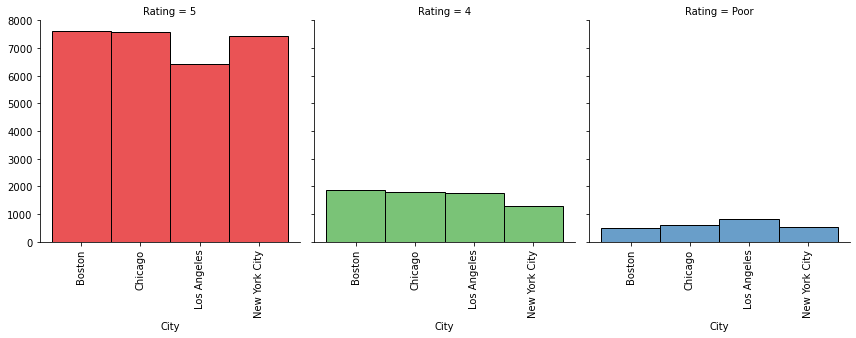

In [20]:
# %matplotlib notebook
ratingsgrid = sns.FacetGrid(data=ta_chng_rat, col='Rating', hue="Rating", palette="Set1", height=4,
                            col_order=ta_chng_rat.Rating.value_counts().index)
ratingsgrid.map(sns.histplot, 'City', kde=False)
ratingsgrid.set_xticklabels(rotation='vertical', fontsize=10)

- Ratings Count broken down by Attraction

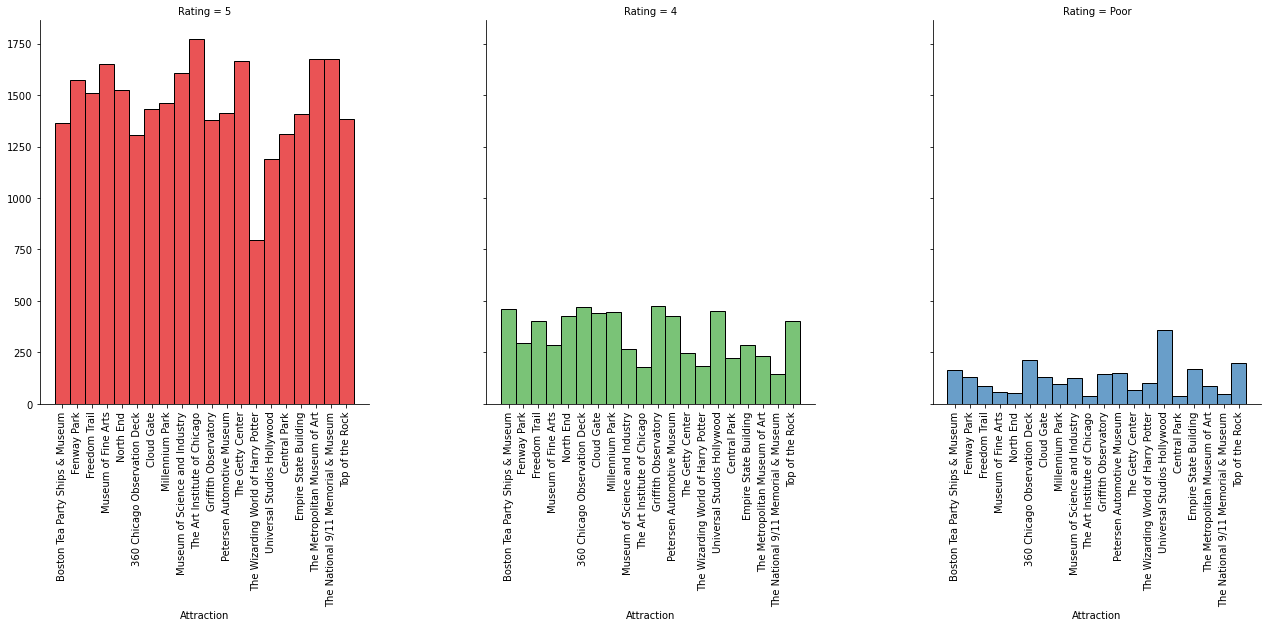

In [21]:
ratingsgrid = sns.FacetGrid(data=ta_chng_rat, col='Rating', hue="Rating", palette="Set1",
                            col_order=ta_chng_rat.Rating.value_counts().index, height=6.25, aspect=1)
ratingsgrid.map(sns.histplot, 'Attraction', kde=False)
ratingsgrid.set_xticklabels(rotation='vertical', fontsize=10)


# Analyzing Boston

### Analyzing by Rating (5 stars, 4 stars, Poor)

In [22]:
ta_5vspoor = ta_chng_rat[(ta_chng_rat['City']=='Boston') ]

ta_5vspoor.sample(20)

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Loc1,User_Loc2,User_Loc3,User_Loc4,User_Loc5
25997,North End,Boston,2018-10-01,2018-09-01,51,8,0,5,We loved this district in Boston. People with ...,Next Visit to Boston - Will definitely Stay in...,Joanne W,BIRMINGHAM,AL,,,
21572,Museum of Fine Arts,Boston,2018-01-01,2017-12-01,33,6,0,5,Exquisite experience. The perfect museum. Peac...,First class,Leopoldo Chopo G,GLASTONBURY,CT,,,
21167,Museum of Fine Arts,Boston,2017-07-01,2017-05-01,422,23,0,5,Great place to spend the whole day in especial...,Fine arts at its finest,C2428SBbenjaminl,BOSTON,MA,,,
26716,Fenway Park,Boston,2018-10-01,2018-09-01,88,14,0,5,Growing up Fenway Park was one of those iconic...,Boston Fan for a day!,ChristineHewton,LONDON,CANADA,,,
24977,North End,Boston,2017-05-01,2017-04-01,84,24,0,4,nice be ready to walk. so you can enjoy the sh...,vacation,tania p,,,,,
25084,North End,Boston,2017-06-01,2017-06-01,385,94,0,5,I loved the North End because of all the excel...,Get Ready for an Italian Meal,Alicia N,FORT MYERS,FL,,,
23607,Boston Tea Party Ships & Museum,Boston,2018-07-01,2018-05-01,25,4,0,4,"As with many people, we only go to the tourist...",Surprisingly fun museum,Steve Sutter,BOSTON,MA,,,
27897,Fenway Park,Boston,2019-09-01,2019-09-01,5,0,0,5,This is a beautiful ballpark. Theres not a bad...,Game,Misty E,,,,,
25407,North End,Boston,2017-10-01,2017-09-01,147,28,0,5,The North End is a great place to stay if visi...,Great Place to Stay and Eat,AtravelerAD,NAPLES,FL,,,
20032,Freedom Trail,Boston,2019-08-01,2019-07-01,362,66,0,4,I chose to do this tour on my own and follow a...,Must Walk it,idaho92,BODICOTE,UNITED KINGDOM,,,


## Using Word Lemmatizer to Analyze Text Data

### Single Word Analysis

- 5 Star Analysis

In [23]:
lemmatizer= WordNetLemmatizer()
stop_filters = stopwords.words('english') + list(string.punctuation) + ['boston', '’', "n't", "'s", 'u', 'get', "'m", 
                                                                        'also', '...' ,"'", '`', '``', '-', '"', "''", '""']

# Word Count

corpus_5star = ' '.join(ta_5vspoor[ta_5vspoor['Rating']==5]['Text']).lower()
tokens_5star = [lemmatizer.lemmatize(tokens) for tokens in word_tokenize(corpus_5star) if tokens not in stop_filters]

fdist_5star = FreqDist(tokens_5star)
fdist_5star.most_common(50)

[('tour', 3360),
 ('great', 3163),
 ('museum', 2419),
 ('history', 2305),
 ('time', 2139),
 ('see', 1937),
 ('trail', 1632),
 ('visit', 1561),
 ('day', 1547),
 ('tea', 1543),
 ('one', 1456),
 ('place', 1456),
 ('well', 1411),
 ('north', 1343),
 ('end', 1308),
 ('art', 1293),
 ('go', 1262),
 ('park', 1248),
 ('walk', 1199),
 ('guide', 1162),
 ('lot', 1134),
 ('restaurant', 1128),
 ('way', 1075),
 ('really', 1067),
 ('fun', 1033),
 ('many', 1021),
 ('good', 1019),
 ('much', 1016),
 ('fenway', 1008),
 ('experience', 1006),
 ('take', 973),
 ('old', 968),
 ('food', 953),
 ('game', 931),
 ('would', 909),
 ('freedom', 894),
 ('worth', 890),
 ('exhibit', 889),
 ('italian', 873),
 ('must', 838),
 ('area', 838),
 ('around', 816),
 ('recommend', 800),
 ('enjoyed', 793),
 ('hour', 773),
 ('collection', 763),
 ('like', 753),
 ('part', 733),
 ('shop', 719),
 ('walking', 719)]

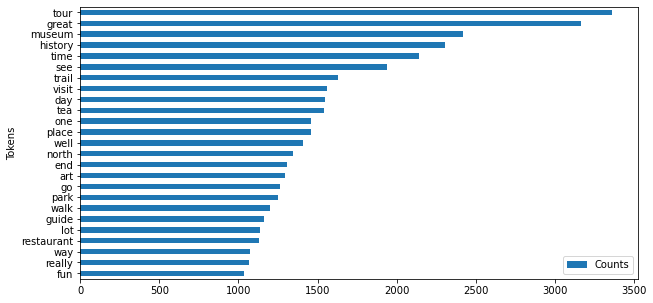

In [24]:
# Graph of Word Count

fdist_5star_graph = pd.DataFrame(fdist_5star.most_common(25), columns=['Tokens', 'Counts']).set_index('Tokens').plot(kind='barh')
fdist_5star_graph.invert_yaxis()

- 4 Star Analysis

In [25]:
corpus_4star = ' '.join(ta_5vspoor[ta_5vspoor['Rating']==4]['Text']).lower()
tokens_4star = [lemmatizer.lemmatize(tokens) for tokens in word_tokenize(corpus_4star) if tokens not in stop_filters]

fdist_4star = FreqDist(tokens_4star)
fdist_4star.most_common(50)

[('tour', 786),
 ('great', 663),
 ('history', 542),
 ('tea', 530),
 ('time', 492),
 ('museum', 486),
 ('see', 470),
 ('trail', 455),
 ('good', 417),
 ('lot', 382),
 ('place', 354),
 ('walk', 353),
 ('visit', 326),
 ('well', 320),
 ('restaurant', 320),
 ('end', 311),
 ('would', 305),
 ('way', 304),
 ('day', 302),
 ('one', 301),
 ('really', 295),
 ('north', 288),
 ('guide', 285),
 ('around', 283),
 ('fun', 277),
 ('take', 263),
 ('area', 256),
 ('go', 252),
 ('party', 250),
 ('park', 248),
 ('old', 247),
 ('freedom', 239),
 ('nice', 238),
 ('worth', 234),
 ('little', 229),
 ('many', 229),
 ('italian', 229),
 ('enjoyed', 225),
 ('experience', 220),
 ('like', 214),
 ('ship', 213),
 ('shop', 212),
 ('walking', 211),
 ('hour', 204),
 ('part', 202),
 ('much', 201),
 ('interesting', 200),
 ('game', 199),
 ('art', 196),
 ('food', 183)]

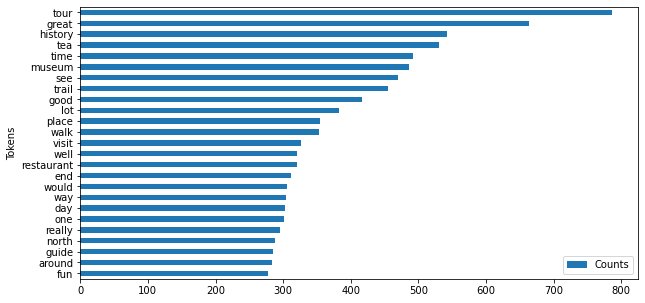

In [26]:
fdist_4star_graph = pd.DataFrame(fdist_4star.most_common(25), columns=['Tokens', 'Counts']).set_index('Tokens').plot(kind='barh')
fdist_4star_graph.invert_yaxis()

- Poor Rating Analysis

In [27]:
corpus_poor = ' '.join(ta_5vspoor[ta_5vspoor['Rating']=='Poor']['Text']).lower()
tokens_poor = [lemmatizer.lemmatize(tokens) for tokens in word_tokenize(corpus_poor) if tokens not in stop_filters]

fdist_poor = FreqDist(tokens_poor)
fdist_poor.most_common(50)

[('tour', 360),
 ('museum', 189),
 ('would', 151),
 ('tea', 149),
 ('time', 134),
 ('see', 125),
 ('history', 117),
 ('good', 116),
 ('one', 116),
 ('go', 109),
 ('guide', 105),
 ('like', 101),
 ('great', 100),
 ('day', 99),
 ('experience', 99),
 ('trail', 96),
 ('park', 95),
 ('people', 94),
 ('really', 89),
 ('u', 85),
 ('place', 83),
 ('ticket', 81),
 ('game', 81),
 ('much', 79),
 ('way', 78),
 ('could', 78),
 ('fenway', 78),
 ('around', 76),
 ('lot', 74),
 ('ship', 73),
 ('visit', 72),
 ('thing', 70),
 ('little', 68),
 ('interesting', 67),
 ('group', 66),
 ('seat', 66),
 ('nice', 64),
 ('walk', 63),
 ('room', 62),
 ('kid', 61),
 ('shop', 58),
 ('went', 57),
 ('stadium', 57),
 ('part', 56),
 ('well', 55),
 ('take', 55),
 ('fan', 55),
 ('back', 54),
 ('actor', 53),
 ('however', 52)]

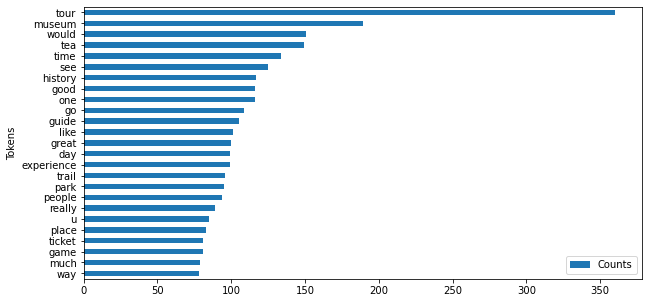

In [28]:
fdist_poor_graph = pd.DataFrame(fdist_poor.most_common(25),
                                columns=['Tokens', 'Counts']).set_index('Tokens').plot(kind='barh')
fdist_poor_graph.invert_yaxis()

- We can see that most of the reviews that gave 3 or fewer stars mentioned tours the most

### Bigram Analysis

- 5 Star Analysis

In [29]:
lemmatizer= WordNetLemmatizer()
stop_filters = stopwords.words('english') + list(string.punctuation) +\
['boston', '’', "n't", "'s", 'u', "u", 'get', "'m", 'also', '...' ,"'", '`', '-', '"']

corpus_5star = ' '.join(ta_5vspoor[ta_5vspoor['Rating']==5]['Text']).lower()
tokens_5star = [lemmatizer.lemmatize(tokens) for tokens in word_tokenize(corpus_5star) if tokens not in stop_filters]

bigram_5star = list(nltk.bigrams(tokens_5star))
fdist_bi_5star = FreqDist(bigram_5star)
fdist_bi_5star.most_common(50)

[(('north', 'end'), 983),
 (('freedom', 'trail'), 854),
 (('tea', 'party'), 578),
 (('tour', 'guide'), 469),
 (('fenway', 'park'), 406),
 (('paul', 'revere'), 384),
 (('red', 'sox'), 379),
 (('highly', 'recommend'), 378),
 (('well', 'worth'), 312),
 (('north', 'church'), 302),
 (('green', 'monster'), 261),
 (('baseball', 'fan'), 257),
 (('old', 'north'), 257),
 (('must', 'see'), 234),
 (('italian', 'restaurant'), 231),
 (('gift', 'shop'), 221),
 (('revere', 'house'), 214),
 (('bunker', 'hill'), 213),
 (('great', 'way'), 195),
 (('along', 'way'), 195),
 (('really', 'enjoyed'), 193),
 (('guided', 'tour'), 193),
 (('great', 'place'), 192),
 (('fine', 'art'), 188),
 (('italian', 'food'), 186),
 (('tea', 'room'), 167),
 (('us', 'constitution'), 160),
 (('well', 'done'), 158),
 (('art', 'museum'), 155),
 (('great', 'time'), 153),
 (('much', 'history'), 152),
 (('easy', 'follow'), 149),
 (('much', 'see'), 145),
 (('year', 'old'), 144),
 (('walk', 'around'), 142),
 (('red', 'brick'), 140),
 ((

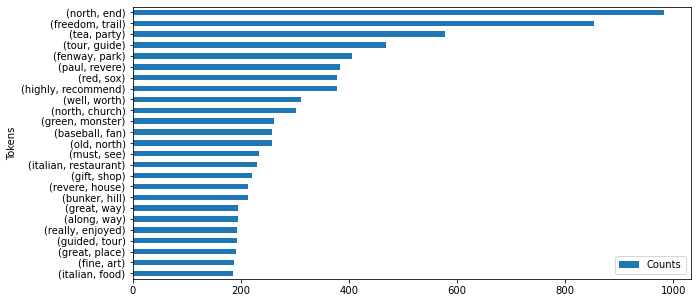

In [30]:
# Graph of 5 Star Bigram

fdist_bi_5star_graph = pd.DataFrame(fdist_bi_5star.most_common(25), columns=['Tokens', 'Counts']).set_index('Tokens').plot(kind='barh')
fdist_bi_5star_graph.invert_yaxis()

- 4 Star Analysis

In [31]:
corpus_4star = ' '.join(ta_5vspoor[ta_5vspoor['Rating']==4]['Text']).lower()
tokens_4star = [lemmatizer.lemmatize(tokens) for tokens in word_tokenize(corpus_4star) if tokens not in stop_filters]

bigram_4star = list(nltk.bigrams(tokens_4star))
fdist_bi_4star = FreqDist(bigram_4star)
fdist_bi_4star.most_common(50)

[(('tea', 'party'), 230),
 (('freedom', 'trail'), 227),
 (('north', 'end'), 215),
 (('paul', 'revere'), 104),
 (('tour', 'guide'), 86),
 (('italian', 'restaurant'), 77),
 (('red', 'sox'), 74),
 (('gift', 'shop'), 66),
 (('great', 'way'), 62),
 (('fenway', 'park'), 61),
 (('north', 'church'), 60),
 (('revere', 'house'), 58),
 (('really', 'enjoyed'), 56),
 (('worth', 'visit'), 55),
 (('well', 'worth'), 54),
 (('old', 'north'), 51),
 (('walk', 'around'), 50),
 (('guided', 'tour'), 49),
 (('red', 'brick'), 49),
 (('along', 'way'), 49),
 (('baseball', 'fan'), 49),
 (('great', 'place'), 47),
 (('green', 'monster'), 44),
 (('would', 'recommend'), 43),
 (('must', 'see'), 41),
 (('little', 'italy'), 40),
 (('bunker', 'hill'), 39),
 (('italian', 'food'), 38),
 (('tea', 'room'), 37),
 (('lot', 'history'), 37),
 (('easy', 'follow'), 36),
 (('walking', 'tour'), 35),
 (('mike', 'pastry'), 35),
 (('great', 'time'), 34),
 (('highly', 'recommend'), 32),
 (('make', 'sure'), 32),
 (('walking', 'around'),

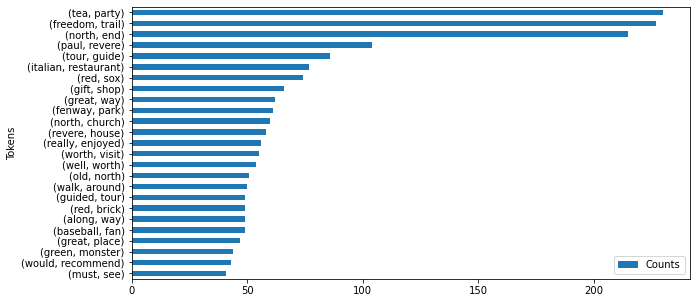

In [32]:
# Graph of 4 Star Bigram

fdist_bi_4star_graph = pd.DataFrame(fdist_bi_4star.most_common(25), columns=['Tokens', 'Counts']).set_index('Tokens').plot(kind='barh')
fdist_bi_4star_graph.invert_yaxis()

- Poor Rating Analysis

In [33]:
corpus_poor = ' '.join(ta_5vspoor[ta_5vspoor['Rating']=='Poor']['Text']).lower()
tokens_poor = [lemmatizer.lemmatize(tokens) for tokens in word_tokenize(corpus_poor) if tokens not in stop_filters]

bigram_poor = list(nltk.bigrams(tokens_poor))
fdist_bi_poor = FreqDist(bigram_poor)
fdist_bi_poor.most_common(50)

[(('tour', 'guide'), 44),
 (('tea', 'party'), 40),
 (('freedom', 'trail'), 36),
 (('gift', 'shop'), 27),
 (('red', 'sox'), 26),
 (('north', 'end'), 22),
 (('tea', 'room'), 19),
 (('green', 'monster'), 17),
 (('guided', 'tour'), 15),
 (('fenway', 'park'), 15),
 (('baseball', 'fan'), 15),
 (('many', 'people'), 13),
 (('paul', 'revere'), 13),
 (('walk', 'around'), 12),
 (('museum', 'experience'), 11),
 (('actor', 'good'), 10),
 (('part', 'tour'), 10),
 (('locker', 'room'), 10),
 (('bunker', 'hill'), 10),
 (('year', 'old'), 9),
 (('ship', 'museum'), 9),
 (('sox', 'fan'), 9),
 (('took', 'u'), 9),
 (('one', 'hour'), 8),
 (('replica', 'ship'), 8),
 (('felt', 'like'), 8),
 (('much', 'better'), 8),
 (('tour', 'group'), 8),
 (('across', 'street'), 8),
 (('must', 'see'), 8),
 (('old', 'north'), 8),
 (('north', 'church'), 8),
 (('easy', 'follow'), 8),
 (('tea', 'box'), 7),
 (('really', 'good'), 7),
 (('ticket', 'online'), 7),
 (('would', 'recommend'), 7),
 (('tea', 'chest'), 7),
 (('tourist', 'tra

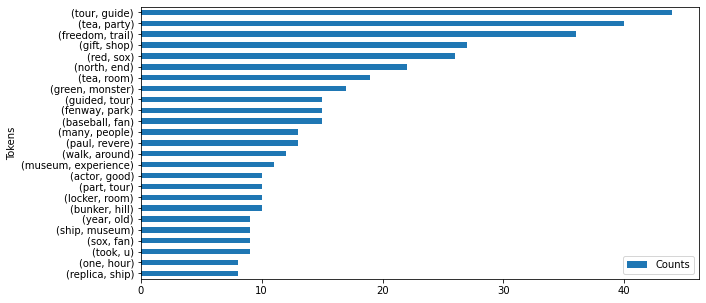

In [34]:
# Graph of Poor Bigram

fdist_bi_poor_graph = pd.DataFrame(fdist_bi_poor.most_common(25), columns=['Tokens', 'Counts']).set_index('Tokens').plot(kind='barh')
fdist_bi_poor_graph.invert_yaxis()

- Plot of the top 25 most used words for reviews regarding the top 5 Boston Attractions

- We see some similar words that we saw in the analysis of helpful reviews of Boston's Attractions

- A small sample of the reviews found where the word 'tour' was mentioned in helpful reviews of Boston

In [35]:
bigram_words_5star = [tup[0] for tup in fdist_bi_5star.most_common(50)]
bigram_words_5star

[('north', 'end'),
 ('freedom', 'trail'),
 ('tea', 'party'),
 ('tour', 'guide'),
 ('fenway', 'park'),
 ('paul', 'revere'),
 ('red', 'sox'),
 ('highly', 'recommend'),
 ('well', 'worth'),
 ('north', 'church'),
 ('green', 'monster'),
 ('baseball', 'fan'),
 ('old', 'north'),
 ('must', 'see'),
 ('italian', 'restaurant'),
 ('gift', 'shop'),
 ('revere', 'house'),
 ('bunker', 'hill'),
 ('great', 'way'),
 ('along', 'way'),
 ('really', 'enjoyed'),
 ('guided', 'tour'),
 ('great', 'place'),
 ('fine', 'art'),
 ('italian', 'food'),
 ('tea', 'room'),
 ('us', 'constitution'),
 ('well', 'done'),
 ('art', 'museum'),
 ('great', 'time'),
 ('much', 'history'),
 ('easy', 'follow'),
 ('much', 'see'),
 ('year', 'old'),
 ('walk', 'around'),
 ('red', 'brick'),
 ('museum', 'fine'),
 ('little', 'italy'),
 ('make', 'sure'),
 ('ball', 'park'),
 ('worth', 'visit'),
 ('one', 'best'),
 ('great', 'experience'),
 ('american', 'history'),
 ('way', 'see'),
 ('mike', 'pastry'),
 ('would', 'recommend'),
 ('go', 'back'),
 ('

In [36]:
bigram_words_4star = [tup[0] for tup in fdist_bi_4star.most_common(50)]
bigram_words_4star

[('tea', 'party'),
 ('freedom', 'trail'),
 ('north', 'end'),
 ('paul', 'revere'),
 ('tour', 'guide'),
 ('italian', 'restaurant'),
 ('red', 'sox'),
 ('gift', 'shop'),
 ('great', 'way'),
 ('fenway', 'park'),
 ('north', 'church'),
 ('revere', 'house'),
 ('really', 'enjoyed'),
 ('worth', 'visit'),
 ('well', 'worth'),
 ('old', 'north'),
 ('walk', 'around'),
 ('guided', 'tour'),
 ('red', 'brick'),
 ('along', 'way'),
 ('baseball', 'fan'),
 ('great', 'place'),
 ('green', 'monster'),
 ('would', 'recommend'),
 ('must', 'see'),
 ('little', 'italy'),
 ('bunker', 'hill'),
 ('italian', 'food'),
 ('tea', 'room'),
 ('lot', 'history'),
 ('easy', 'follow'),
 ('walking', 'tour'),
 ('mike', 'pastry'),
 ('great', 'time'),
 ('highly', 'recommend'),
 ('make', 'sure'),
 ('walking', 'around'),
 ('tea', 'overboard'),
 ('year', 'old'),
 ('us', 'constitution'),
 ('throwing', 'tea'),
 ('american', 'history'),
 ('way', 'see'),
 ('party', 'ship'),
 ('well', 'done'),
 ('ship', 'museum'),
 ('throw', 'tea'),
 ('really'

In [37]:
bigram_words_poor = [tup[0] for tup in fdist_bi_poor.most_common(50)]
bigram_words_poor

[('tour', 'guide'),
 ('tea', 'party'),
 ('freedom', 'trail'),
 ('gift', 'shop'),
 ('red', 'sox'),
 ('north', 'end'),
 ('tea', 'room'),
 ('green', 'monster'),
 ('guided', 'tour'),
 ('fenway', 'park'),
 ('baseball', 'fan'),
 ('many', 'people'),
 ('paul', 'revere'),
 ('walk', 'around'),
 ('museum', 'experience'),
 ('actor', 'good'),
 ('part', 'tour'),
 ('locker', 'room'),
 ('bunker', 'hill'),
 ('year', 'old'),
 ('ship', 'museum'),
 ('sox', 'fan'),
 ('took', 'u'),
 ('one', 'hour'),
 ('replica', 'ship'),
 ('felt', 'like'),
 ('much', 'better'),
 ('tour', 'group'),
 ('across', 'street'),
 ('must', 'see'),
 ('old', 'north'),
 ('north', 'church'),
 ('easy', 'follow'),
 ('tea', 'box'),
 ('really', 'good'),
 ('ticket', 'online'),
 ('would', 'recommend'),
 ('tea', 'chest'),
 ('tourist', 'trap'),
 ('time', 'money'),
 ('go', 'back'),
 ('make', 'sure'),
 ('batting', 'practice'),
 ('red', 'brick'),
 ('art', 'museum'),
 ('little', 'italy'),
 ('tea', 'shop'),
 ('people', 'group'),
 ('customer', 'service

In [38]:
bigram_common_words = list(set(bigram_words_5star).intersection(bigram_words_poor))
bigram_common_words = list(set(bigram_common_words).intersection(bigram_words_4star))
bigram_common_words

[('paul', 'revere'),
 ('old', 'north'),
 ('north', 'church'),
 ('tea', 'party'),
 ('must', 'see'),
 ('tour', 'guide'),
 ('bunker', 'hill'),
 ('red', 'sox'),
 ('gift', 'shop'),
 ('guided', 'tour'),
 ('freedom', 'trail'),
 ('tea', 'room'),
 ('red', 'brick'),
 ('would', 'recommend'),
 ('make', 'sure'),
 ('baseball', 'fan'),
 ('walk', 'around'),
 ('little', 'italy'),
 ('green', 'monster'),
 ('year', 'old'),
 ('north', 'end'),
 ('easy', 'follow'),
 ('fenway', 'park')]

In [39]:
words_5star_count = [tup for tup in fdist_bi_5star.most_common(50) if tup[0] in bigram_common_words]
print(len(words_5star_count))

words_5star_count_df = pd.DataFrame(words_5star_count, columns = ['Words', '5Star_Count'])
words_5star_count_df

23


,Words,5Star_Count
0,"(north, end)",983
1,"(freedom, trail)",854
2,"(tea, party)",578
3,"(tour, guide)",469
4,"(fenway, park)",406
5,"(paul, revere)",384
6,"(red, sox)",379
7,"(north, church)",302
8,"(green, monster)",261
9,"(baseball, fan)",257


In [40]:
words_4star_count = [tup for tup in fdist_bi_4star.most_common(50) if tup[0] in bigram_common_words]
print(len(words_4star_count))

words_4star_count_df = pd.DataFrame(words_4star_count, columns = ['Words', '4Star_Count'])
words_4star_count_df

23


,Words,4Star_Count
0,"(tea, party)",230
1,"(freedom, trail)",227
2,"(north, end)",215
3,"(paul, revere)",104
4,"(tour, guide)",86
5,"(red, sox)",74
6,"(gift, shop)",66
7,"(fenway, park)",61
8,"(north, church)",60
9,"(old, north)",51


In [41]:
words_poor_count = [tup for tup in fdist_bi_poor.most_common(50) if tup[0] in bigram_common_words]
print(len(words_poor_count))

words_poor_count_df = pd.DataFrame(words_poor_count, columns = ['Words', 'Poor_Count'])
words_poor_count_df

23


,Words,Poor_Count
0,"(tour, guide)",44
1,"(tea, party)",40
2,"(freedom, trail)",36
3,"(gift, shop)",27
4,"(red, sox)",26
5,"(north, end)",22
6,"(tea, room)",19
7,"(green, monster)",17
8,"(guided, tour)",15
9,"(fenway, park)",15


In [42]:
from functools import reduce

dfs = [words_5star_count_df, words_4star_count_df, words_poor_count_df]

combined_words_df = reduce(lambda left,right: pd.merge(left,right,on='Words'), dfs)
combined_words_df

,Words,5Star_Count,4Star_Count,Poor_Count
0,"(north, end)",983,215,22
1,"(freedom, trail)",854,227,36
2,"(tea, party)",578,230,40
3,"(tour, guide)",469,86,44
4,"(fenway, park)",406,61,15
5,"(paul, revere)",384,104,13
6,"(red, sox)",379,74,26
7,"(north, church)",302,60,8
8,"(green, monster)",261,44,17
9,"(baseball, fan)",257,49,15


In [43]:
count_5star_ttl = len(ta_5vspoor[(ta_5vspoor['Rating']==5)])
count_5star_ttl

7622

In [44]:
count_4star_ttl = len(ta_5vspoor[(ta_5vspoor['Rating']==4)])
count_4star_ttl

1873

In [45]:
count_poor_ttl = len(ta_5vspoor[(ta_5vspoor['Rating']=='Poor')])
count_poor_ttl

490

In [46]:
combined_words_df[['5Star_Count']] = combined_words_df[['5Star_Count']]/count_5star_ttl
combined_words_df

,Words,5Star_Count,4Star_Count,Poor_Count
0,"(north, end)",0.128969,215,22
1,"(freedom, trail)",0.112044,227,36
2,"(tea, party)",0.075833,230,40
3,"(tour, guide)",0.061532,86,44
4,"(fenway, park)",0.053267,61,15
5,"(paul, revere)",0.050380,104,13
6,"(red, sox)",0.049724,74,26
7,"(north, church)",0.039622,60,8
8,"(green, monster)",0.034243,44,17
9,"(baseball, fan)",0.033718,49,15


In [47]:
combined_words_df[['4Star_Count']] = combined_words_df[['4Star_Count']]/count_4star_ttl
combined_words_df

,Words,5Star_Count,4Star_Count,Poor_Count
0,"(north, end)",0.128969,0.114789,22
1,"(freedom, trail)",0.112044,0.121196,36
2,"(tea, party)",0.075833,0.122798,40
3,"(tour, guide)",0.061532,0.045916,44
4,"(fenway, park)",0.053267,0.032568,15
5,"(paul, revere)",0.050380,0.055526,13
6,"(red, sox)",0.049724,0.039509,26
7,"(north, church)",0.039622,0.032034,8
8,"(green, monster)",0.034243,0.023492,17
9,"(baseball, fan)",0.033718,0.026161,15


In [48]:
combined_words_df[['Poor_Count']] = combined_words_df[['Poor_Count']]/count_poor_ttl
combined_words_df

,Words,5Star_Count,4Star_Count,Poor_Count
0,"(north, end)",0.128969,0.114789,0.044898
1,"(freedom, trail)",0.112044,0.121196,0.073469
2,"(tea, party)",0.075833,0.122798,0.081633
3,"(tour, guide)",0.061532,0.045916,0.089796
4,"(fenway, park)",0.053267,0.032568,0.030612
5,"(paul, revere)",0.050380,0.055526,0.026531
6,"(red, sox)",0.049724,0.039509,0.053061
7,"(north, church)",0.039622,0.032034,0.016327
8,"(green, monster)",0.034243,0.023492,0.034694
9,"(baseball, fan)",0.033718,0.026161,0.030612


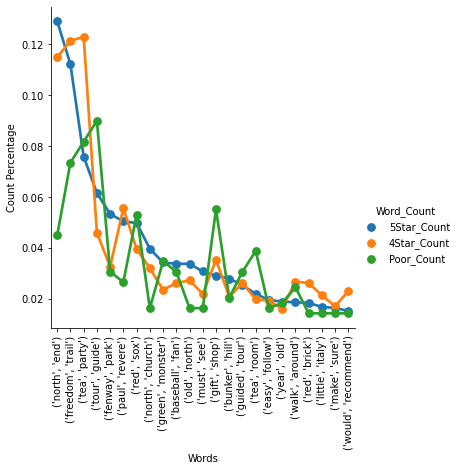

<Figure size 720x360 with 0 Axes>

In [49]:
combined_words_df_plot = combined_words_df.melt('Words', var_name='Word_Count', value_name = 'Count Percentage')
combined_words_df_plot = sns.catplot(x="Words", y="Count Percentage", hue='Word_Count',
                                     data=combined_words_df_plot, kind='point')
plt.figure(figsize=(10,5))
combined_words_df_plot.set_xticklabels(rotation='vertical', fontsize=10)
plt.show()

In [50]:
list(set(bigram_words_5star) - set(bigram_words_4star) - set(bigram_words_poor))

[('museum', 'fine'),
 ('much', 'see'),
 ('much', 'history'),
 ('fine', 'art'),
 ('ball', 'park'),
 ('special', 'exhibit'),
 ('one', 'best'),
 ('great', 'experience')]

In [51]:
list(set(bigram_words_4star) - set(bigram_words_5star) - set(bigram_words_poor))

[('historic', 'site'),
 ('throwing', 'tea'),
 ('tea', 'overboard'),
 ('throw', 'tea'),
 ('faneuil', 'hall'),
 ('lot', 'history'),
 ('walking', 'around')]

In [52]:
# even taking 'u' and "u" out with the lemmatizer does not actually take the letter out

list(set(bigram_words_poor) - set(bigram_words_4star) - set(bigram_words_5star))

[('one', 'hour'),
 ('ticket', 'online'),
 ('tourist', 'trap'),
 ('much', 'better'),
 ('tea', 'box'),
 ('sox', 'fan'),
 ('time', 'money'),
 ('customer', 'service'),
 ('replica', 'ship'),
 ('tea', 'chest'),
 ('actor', 'good'),
 ('tour', 'group'),
 ('batting', 'practice'),
 ('people', 'group'),
 ('many', 'people'),
 ('across', 'street'),
 ('felt', 'like'),
 ('museum', 'experience'),
 ('took', 'u'),
 ('tea', 'shop'),
 ('locker', 'room'),
 ('part', 'tour')]

In [53]:
ta_5vspoor[(ta_5vspoor['Rating']=='Poor') &
           (ta_5vspoor['Text'].str.contains('gift')) &
           (ta_5vspoor['Text'].str.contains('shop'))]

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Loc1,User_Loc2,User_Loc3,User_Loc4,User_Loc5
22579,Boston Tea Party Ships & Museum,Boston,2017-03-01,2017-03-01,984,175,0,Poor,Had to to this for our visit to Boston. We had...,Interesting.,tinytrace,BRISTOL,UNITED KINGDOM,,,
22648,Boston Tea Party Ships & Museum,Boston,2017-05-01,2017-04-01,6,3,0,Poor,"The ship is fun to look at, but the ceremony a...",Iced Tea to Drink Rather than Throw in Harbor,KathrynCleveland,CLEVELAND,OH,,,
22649,Boston Tea Party Ships & Museum,Boston,2017-04-01,2017-04-01,34,37,0,Poor,This is run by (for Profit?) Historic Tours of...,Private Company and not worth it,GustavSpeed,DSM,,,,
22705,Boston Tea Party Ships & Museum,Boston,2017-05-01,2017-04-01,283,78,0,Poor,intended to visit the museum but a lot of scho...,More of a place for school trips,Geraldine L,WATFORD,UNITED KINGDOM,,,
22742,Boston Tea Party Ships & Museum,Boston,2017-06-01,2017-06-01,"1,363",483,0,Poor,Ok - you have to go there as it is globally fa...,Had to go!,Honisoiquimalypense,DERBY,UNITED KINGDOM,,,
22811,Boston Tea Party Ships & Museum,Boston,2017-07-01,2017-07-01,6,2,0,Poor,Stay away! I attempted to purchase three items...,Taxation without Representation,RI_Mom_1,WARWICK,RI,,,
22843,Boston Tea Party Ships & Museum,Boston,2017-07-01,2017-07-01,308,78,0,Poor,This was fun to see and would likely be really...,Fun to see.,Michelle2560,MOBILE,AL,,,
22939,Boston Tea Party Ships & Museum,Boston,2017-07-01,2017-07-01,10,1,0,Poor,I wish I could have said I loved every minute ...,More for kids...,Sara H,BALTIMORE,MD,,,
22943,Boston Tea Party Ships & Museum,Boston,2017-08-01,2017-07-01,38,9,0,Poor,We opted for this trip as add on to our trolle...,Good experience about history,TravelJunkie707,ODESSA,FL,,,
22973,Boston Tea Party Ships & Museum,Boston,2017-08-01,2017-07-01,179,84,0,Poor,Booked tickets online through viator. Timed sl...,Boston tea party ship/Museum,yogianddaisy,CROWBOROUGH,UNITED KINGDOM,,,


In [54]:
ta_5vspoor.loc[23023, 'Text']

"Sorry guys but we really didn't like this museum. The role play by actors in costumes was frankly embarrassing (British reserve I guess) and so little history about what actually happened and its significance. We all found the shouty actors irritating after a while, and the one exhibit in the museum just made us laugh - a tea chest on a rotating podium with spotlights, behind glass. Really? The crown jewels in the Tower of London have less fanfare than that. The film was really good though (no shouting) but the talking portraits were frankly silly. The portrayal of King George was laughable and comedic - not suitable for a historic museum and a bit insulting I thought (although understandable given the context I guess). Sorry guys, this place is clearly aimed at a domestic audience and to be fair the US visitors seemed to love it. However we just didn't enjoy it and the whole experience left us cold and irritable. Great gift shop though with the best selection we saw anywhere in Bosto

In [55]:
ta_5vspoor[(ta_5vspoor['Rating']=='Poor') &
           (ta_5vspoor['Attraction']=='Boston Tea Party Ships & Museum') &
           (ta_5vspoor['Text'].str.contains('gift')) &
           (ta_5vspoor['Text'].str.contains('shop'))]

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Loc1,User_Loc2,User_Loc3,User_Loc4,User_Loc5
22579,Boston Tea Party Ships & Museum,Boston,2017-03-01,2017-03-01,984,175,0,Poor,Had to to this for our visit to Boston. We had...,Interesting.,tinytrace,BRISTOL,UNITED KINGDOM,,,
22648,Boston Tea Party Ships & Museum,Boston,2017-05-01,2017-04-01,6,3,0,Poor,"The ship is fun to look at, but the ceremony a...",Iced Tea to Drink Rather than Throw in Harbor,KathrynCleveland,CLEVELAND,OH,,,
22649,Boston Tea Party Ships & Museum,Boston,2017-04-01,2017-04-01,34,37,0,Poor,This is run by (for Profit?) Historic Tours of...,Private Company and not worth it,GustavSpeed,DSM,,,,
22705,Boston Tea Party Ships & Museum,Boston,2017-05-01,2017-04-01,283,78,0,Poor,intended to visit the museum but a lot of scho...,More of a place for school trips,Geraldine L,WATFORD,UNITED KINGDOM,,,
22742,Boston Tea Party Ships & Museum,Boston,2017-06-01,2017-06-01,"1,363",483,0,Poor,Ok - you have to go there as it is globally fa...,Had to go!,Honisoiquimalypense,DERBY,UNITED KINGDOM,,,
22811,Boston Tea Party Ships & Museum,Boston,2017-07-01,2017-07-01,6,2,0,Poor,Stay away! I attempted to purchase three items...,Taxation without Representation,RI_Mom_1,WARWICK,RI,,,
22843,Boston Tea Party Ships & Museum,Boston,2017-07-01,2017-07-01,308,78,0,Poor,This was fun to see and would likely be really...,Fun to see.,Michelle2560,MOBILE,AL,,,
22939,Boston Tea Party Ships & Museum,Boston,2017-07-01,2017-07-01,10,1,0,Poor,I wish I could have said I loved every minute ...,More for kids...,Sara H,BALTIMORE,MD,,,
22943,Boston Tea Party Ships & Museum,Boston,2017-08-01,2017-07-01,38,9,0,Poor,We opted for this trip as add on to our trolle...,Good experience about history,TravelJunkie707,ODESSA,FL,,,
22973,Boston Tea Party Ships & Museum,Boston,2017-08-01,2017-07-01,179,84,0,Poor,Booked tickets online through viator. Timed sl...,Boston tea party ship/Museum,yogianddaisy,CROWBOROUGH,UNITED KINGDOM,,,


In [56]:
ta_5vspoor.loc[22648, 'Text']

'The ship is fun to look at, but the ceremony and costumers were quite cheesy. The gift shop is better than average. The employees were great.'

In [57]:
ta_5vspoor.loc[23859, 'Text']

"We didn't pay the $30 for the tour but the gift shop is very good and there are nice views of the ships for photos, bit of a tourist trap and being British we didn't want to take the blame for history !! However it would be great for children to learn the story in this setting and the tour did sound great fun."

In [58]:
pd.set_option('display.max_colwidth', None)
ta_5vspoor[(ta_5vspoor['Rating']=='Poor') &
           (ta_5vspoor['Attraction']=='Boston Tea Party Ships & Museum') &
           (ta_5vspoor['Text'].str.contains('gift')) &
           (ta_5vspoor['Text'].str.contains('shop'))][['Text']]

,Text
22579,"Had to to this for our visit to Boston. We had it included with our hop on/off bus tickets. We arrived and they have showings throughout the day. Possibly every half hour. We went straight in. They partly replay parts and you watch some on screens. You go on a boat and throw a padded box over the side, to resemble throwing the tea over board. Overall it was fairly interesting, and it was good to learn a little more about it. They have a very good gift shop and tea shop with cakes. Look for sale items."
22648,"The ship is fun to look at, but the ceremony and costumers were quite cheesy. The gift shop is better than average. The employees were great."
22649,"This is run by (for Profit?) Historic Tours of America, Inc. an entertainment company. They charge $29 to go inside. You are first treated to two actors who yell out a script about the ""origins"" of the American split with the British (I guess for those who never got past the second grade), then you are whisked to a ship look alike and herded through the place. You can hurl fake tea bundles into the bay (although they tell you this was not done - they had to open the bundles to pour out the tea, go figure). Next you are quickly escorted into a dark room where holograph figures yell at you. Next you are marched into a room where they show you the one artifact in this ""museum"": as actual crate from the Tea Party. You then hear two paintings yell and argue. The next room has a film (stand) about the first shot of the American Revolution before being forced upstair to the gift shop and overpriced tea room. Total Time 30 minutes (not counting the time in the gift shop)"
22705,intended to visit the museum but a lot of school trips so just went to the gift shop and tea shop. Would definitely recommend a visit to the tea shop.
22742,"Ok - you have to go there as it is globally famous. It is pretty fake with all the folks dressed up in 16th century clothes but it ir a bit cheesy for me. The 2 sailing boats look great, the gift shop is cool but my over-riding feeling was ""cheesy""! We did not pay to do the tossing of the tea over the side of the ship thing!"
22811,"Stay away! I attempted to purchase three items in the gift shop, two priced at $4.99 and one at $5.99. When the girl at the register rang up the items at a total of $22 and change, I suggested that something was wrong. She disagreed and didn't understand that $5 +$5 + $6= $16, plus approximately $1.30 in tax should total $17 and change, not $22. When the Manager came over and reviewed the transaction, she insisted that the computer was right. They were both so stubborn and rude and refused to take a moment to realize that the cashier had rang in one item twice resulting in an extra $5. Instead, the Manager told me I had to consider the tax because I'm in Massachusetts and not down South. I'm not from the South, so not sure what her point was, but we'd already agreed the tax was $1.30. She gave me a few choices, over-pay for the merchandise, buy tickets for the boat-tour (most likely a rip-off), or leave. I left, disappointed that these retail employees were unable to complete simple math and treat customers so badly."
22843,"This was fun to see and would likely be really great for small children. The costumes are elaborate and the staff are friendly and helpful. The gift shop was really fun. The ""tea"" is not really tea that they throw off the side, but this is likely due to the fact that throwing tea into the harbor would be really bad for the environment."
22939,"I wish I could have said I loved every minute of this tour, but I didn't. Just when you think it's going to end, it doesn't. I was hoping that by taking the tour, I'd learn a lot about the Boston Tea Party, but unfortunately, the tour guides who were in ""character"" the entire time, didn't engage my attention at all. It was like watching a bad play for an hour and a half. The positive thing about the tour was getting to go on the replicas of th

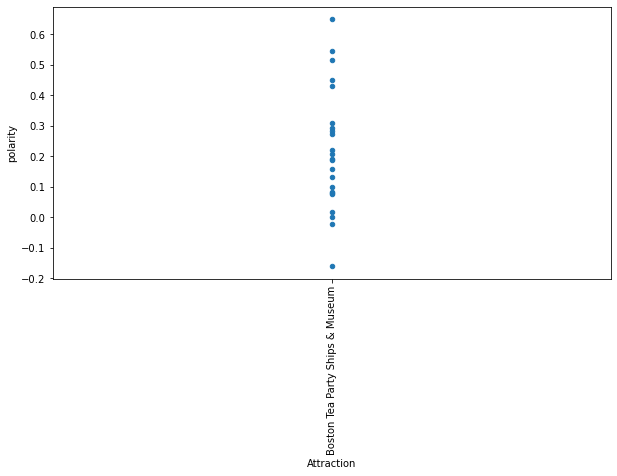

In [59]:
from textblob import TextBlob

bos_tpsm_giftshop = ta_5vspoor[(ta_5vspoor['Rating']=='Poor') &
                               (ta_5vspoor['Attraction']=='Boston Tea Party Ships & Museum') &
                               (ta_5vspoor['Text'].str.contains('gift')) &
                               (ta_5vspoor['Text'].str.contains('shop'))]

sample_size = len(bos_tpsm_giftshop)

def sentiment_func(x):
    sentiment = TextBlob(x['Text'])
    x['polarity'] = sentiment.polarity
    x['subjectivity'] = sentiment.subjectivity
    return x

sample = bos_tpsm_giftshop.sample(sample_size).apply(sentiment_func, axis=1)
sample.plot.scatter('Attraction', 'polarity').tick_params(axis='x', labelrotation = 90)

In [60]:
bos_tpsm_gs_text = bos_tpsm_giftshop['Text']
bos_tpsm_gs_text_pd = bos_tpsm_giftshop[['Text']]
bos_tpsm_gs_corpus = ' '.join(bos_tpsm_gs_text).lower()
bos_tpsm_gs_corpus

'had to to this for our visit to boston. we had it included with our hop on/off bus tickets. we arrived and they have showings throughout the day. possibly every half hour. we went straight in. they partly replay parts and you watch some on screens. you go on a boat and throw a padded box over the side, to resemble throwing the tea over board. overall it was fairly interesting, and it was good to learn a little more about it. they have a very good gift shop and tea shop with cakes. look for sale items. the ship is fun to look at, but the ceremony and costumers were quite cheesy. the gift shop is better than average. the employees were great. this is run by (for profit?) historic tours of america, inc. an entertainment company. they charge $29 to go inside. you are first treated to two actors who yell out a script about the "origins" of the american split with the british (i guess for those who never got past the second grade), then you are whisked to a ship look alike and herded throug

In [61]:
bos_tpsm_gs_text

22579                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   Had to to this for our visit to Boston. We had it included with our hop on/off bus tickets. We a

In [62]:
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

In [63]:
bos_tpsm_gs_corpus_nltktxt = nltk.Text(bos_tpsm_gs_corpus.split())

In [64]:
bos_tpsm_gs_corpus_nltktxt.concordance('gift')

Displaying 24 of 24 matches:
more about it. they have a very good gift shop and tea shop with cakes. look f
and costumers were quite cheesy. the gift shop is better than average. the emp
n before being forced upstair to the gift shop and overpriced tea room. total 
inutes (not counting the time in the gift shop) intended to visit the museum b
 of school trips so just went to the gift shop and tea shop. would definitely 
 the 2 sailing boats look great, the gift shop is cool but my over-riding feel
mpted to purchase three items in the gift shop, two priced at $4.99 and one at
 staff are friendly and helpful. the gift shop was really fun. the "tea" is no
ng "adult" thing about the tour. the gift shop is also pretty nice. other than
l's tea room. they also have a great gift shop with some neat items. so depend
w is all staged. lovely tea room and gift shop. would recommend. the experienc
 and have some money to spend in the gift shop. sorry guys but we really didn'
ce left us cold and irr

In [65]:
# The concordance above does not tell us much. We will have to look through the text 1 by 1
bos_tpsm_gs_text_pd

,Text
22579,"Had to to this for our visit to Boston. We had it included with our hop on/off bus tickets. We arrived and they have showings throughout the day. Possibly every half hour. We went straight in. They partly replay parts and you watch some on screens. You go on a boat and throw a padded box over the side, to resemble throwing the tea over board. Overall it was fairly interesting, and it was good to learn a little more about it. They have a very good gift shop and tea shop with cakes. Look for sale items."
22648,"The ship is fun to look at, but the ceremony and costumers were quite cheesy. The gift shop is better than average. The employees were great."
22649,"This is run by (for Profit?) Historic Tours of America, Inc. an entertainment company. They charge $29 to go inside. You are first treated to two actors who yell out a script about the ""origins"" of the American split with the British (I guess for those who never got past the second grade), then you are whisked to a ship look alike and herded through the place. You can hurl fake tea bundles into the bay (although they tell you this was not done - they had to open the bundles to pour out the tea, go figure). Next you are quickly escorted into a dark room where holograph figures yell at you. Next you are marched into a room where they show you the one artifact in this ""museum"": as actual crate from the Tea Party. You then hear two paintings yell and argue. The next room has a film (stand) about the first shot of the American Revolution before being forced upstair to the gift shop and overpriced tea room. Total Time 30 minutes (not counting the time in the gift shop)"
22705,intended to visit the museum but a lot of school trips so just went to the gift shop and tea shop. Would definitely recommend a visit to the tea shop.
22742,"Ok - you have to go there as it is globally famous. It is pretty fake with all the folks dressed up in 16th century clothes but it ir a bit cheesy for me. The 2 sailing boats look great, the gift shop is cool but my over-riding feeling was ""cheesy""! We did not pay to do the tossing of the tea over the side of the ship thing!"
22811,"Stay away! I attempted to purchase three items in the gift shop, two priced at $4.99 and one at $5.99. When the girl at the register rang up the items at a total of $22 and change, I suggested that something was wrong. She disagreed and didn't understand that $5 +$5 + $6= $16, plus approximately $1.30 in tax should total $17 and change, not $22. When the Manager came over and reviewed the transaction, she insisted that the computer was right. They were both so stubborn and rude and refused to take a moment to realize that the cashier had rang in one item twice resulting in an extra $5. Instead, the Manager told me I had to consider the tax because I'm in Massachusetts and not down South. I'm not from the South, so not sure what her point was, but we'd already agreed the tax was $1.30. She gave me a few choices, over-pay for the merchandise, buy tickets for the boat-tour (most likely a rip-off), or leave. I left, disappointed that these retail employees were unable to complete simple math and treat customers so badly."
22843,"This was fun to see and would likely be really great for small children. The costumes are elaborate and the staff are friendly and helpful. The gift shop was really fun. The ""tea"" is not really tea that they throw off the side, but this is likely due to the fact that throwing tea into the harbor would be really bad for the environment."
22939,"I wish I could have said I loved every minute of this tour, but I didn't. Just when you think it's going to end, it doesn't. I was hoping that by taking the tour, I'd learn a lot about the Boston Tea Party, but unfortunately, the tour guides who were in ""character"" the entire time, didn't engage my attention at all. It was like watching a bad play for an hour and a half. The positive thing about the tour was getting to go on the replicas of th

In [66]:
ta_5vspoor[(ta_5vspoor['Rating']=='Poor') &
           (ta_5vspoor['Text'].str.contains('tour')) &
           (ta_5vspoor['Text'].str.contains('guide'))]

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Loc1,User_Loc2,User_Loc3,User_Loc4,User_Loc5
22637,Boston Tea Party Ships & Museum,Boston,2017-04-01,2017-04-01,8,2,0,Poor,"More of a one hour historical play (on stage) than anything else. I was excited to see the tea party ship, but was told this ship had just been built to the same scale. We did get to tour the ship after their little show. The tour guides are dressed up and speak (and pretend) like they are from the 1700s. I think KIDS will like this a lot. For adults IMO I think it's an hour I would have rather spent on a tour bus or seeing the state house.",A little too cutesy for adults,Jill123pink,CHARLOTTE,NC,,,
22803,Boston Tea Party Ships & Museum,Boston,2017-07-01,2017-06-01,257,12,0,Poor,"We bought a hop on hop off old town trolley tour and we decided to get off on the stop in front of the Museum. It is on the left side of the Children's museum and close to the area for the tour to MIT. We get a discount from purchasing the trolley tour so we decided to might as well tour the museum. As you enter the room, a lady dressed in that era greeted us and handed us cards-showing what character we were assigned. We were also handed feathers symbolizing the disguise made so they won't be recognized if caught. You get to keep the cards and feathers at the end of the tour. We were supposed to relive a town hall meeting regarding taxation without representation -and went aboard a replica of the ship where the tea were kept. Got a sort of reenactment of how the tea were dumped in the ocean. Video clips were also shown in the museum. The tour guide was in character throughout the tour. Overall an okay tour if you want a piece of history.",A piece of history,marifern96,SAN RAMON,CA,,,
22842,Boston Tea Party Ships & Museum,Boston,2017-07-01,2017-07-01,84,33,0,Poor,"This could be so much better! The guides try hard to engage everyone but I found the chat all very samey and it got a bit boring. Need more interactive elements and the museum had one item in it, a tea box, not much of a museum really! Trying hard to be like Disney and failing. I love history but this left me cold! Abigail's tea room at the end however is excellent, $5.95 for bottomless mug of tea, five types to try and a souvenir mug to take home. Great Value! Don't do this tour if you are on a budget. Duck tour or USS constitution much better.",Not worth the money!,Georgiadrubbin,GLASGOW,UNITED KINGDOM,,,
22939,Boston Tea Party Ships & Museum,Boston,2017-07-01,2017-07-01,10,1,0,Poor,"I wish I could have said I loved every minute of this tour, but I didn't. Just when you think it's going to end, it doesn't. I was hoping that by taking the tour, I'd learn a lot about the Boston Tea Party, but unfortunately, the tour guides who were in ""character"" the entire time, didn't engage my attention at all. It was like watching a bad play for an hour and a half. The positive thing about the tour was getting to go on the replicas of the ships.... and then there was a film at the end, which was the only interesting ""adult"" thing about the tour. The gift shop is also pretty nice. Other than that, there isn't too much to say about this...",More for kids...,Sara H,BALTIMORE,MD,,,
22943,Boston Tea Party Ships & Museum,Boston,2017-08-01,2017-07-01,38,9,0,Poor,"We opted for this trip as add on to our trolley tour. Since my daughter is going into the 5th grade and they will be studying this history, I thought it would be neat for her to experience it and learn some things. You first enter a sitting hall where the realistic experience begins. A woman (Rebecca Hodge) dressed in period wear was greeting each family giving out character cards. She would speak to each family making fun conversation with the kids....except for us! I know my daughter and I were only a family of 2 but there was no reason to basically ignore us. My daughter and I felt a bit left out and miffed. Hence my 3 s

In [67]:
ta_5vspoor.loc[19768, 'Text']

"The Freedom Trail is a designated pedestrian route through central Boston, which takes you from the Common, through different areas of the town centre, past various landmarks, parks and monuments. Although paid guided tours are available, it can be just done as a self-guided walk. It's a pleasant walk, not too far and a good way to navigate through the city. Unfortunately, while the route itself is well marked by a continuous line on the floor, there are limited information boards or signs to alert you to what the points of interest are. Also, each venue on the route is individually managed and there's no co-ordination between them in terms of ticketing so while each may only be $10-20, for a family of 4 it quickly adds up to $70 plus! We didn't bother, but it was a nice enough walk!"

In [68]:
time_money_poor = ta_5vspoor[(ta_5vspoor['Rating']=='Poor') &
           (ta_5vspoor['Text'].str.contains('time')) &
           (ta_5vspoor['Text'].str.contains('money'))]
time_money_poor

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Loc1,User_Loc2,User_Loc3,User_Loc4,User_Loc5
23886,Boston Tea Party Ships & Museum,Boston,2018-12-01,2018-12-01,22,28,1,Poor,"I visited this museum with my 13 years boy. It's a nice small exhibition, mostly played by actors and contains visual effects. Not a regular museum you are expected to see. As for my boy it was boring especially if English isn't your language. So it looks like more as a small show on very low level. Don't waste your time and money, just take a walk around .",Doesn't worth the price,Alextsvang,,,,,
24007,Boston Tea Party Ships & Museum,Boston,2019-05-01,2019-04-01,2,1,0,Poor,"Not entirely worth the $50+ dollars to view. I wouldn't do it again. Actors did an amazing job; but once you paid, you were at the timeline mercy of the museum. You can't stay and linger and look. You get herded into the museum store, so you can part with more of your money. Info was good; but there's not enough time to view it.",Expensive for what it is,Gnarlynick,,,,,
24209,Boston Tea Party Ships & Museum,Boston,2019-08-01,2019-08-01,490,182,0,Poor,"Possibly great for kids, younger teens. As an adult, I could have skipped it. Yes, the 'cast' is enthusiastic, though a little thrown off by in depth questions about the tenor of the times - the assumption is that (most) everyone shared the same views in 1773 - nut the ship tour is a total reconstruction, you're herded through the museum, the videos are mostly perfunctory (though with a cool picture come to life effect, and the sole surviving tea chest was interesting / although its spinning presentation like a priceless gem is a bit much) and the entire history lesson would occupy a couple pages of text. Again, if you have kids and are willnig to shell out - great. Solo, and know something about history - your money might be better spent elsewhere.","Overpriced, overhyped",scott r,SILVER SPRING,MD,,,
24247,Boston Tea Party Ships & Museum,Boston,2019-09-01,NaT,651,251,2,Poor,"This tour, led by actors in period costume, re-enacts events leading up to, and after the Boston tea party. Visitors are encouraged to participate with cheers and boos, so be prepared. You are taken through key events either by the actors or through high-tech multimedia performances. You get to visit one of 2 ships which were involved in the tea party to experience life in the 1770s. The whole tour lasts just over an hour but it all felt very rushed and highly organised, as visitors are shepherded from one event to the next. There was not enough time to read and digest the displays on the wharf. It was definitely a money-making enterprise with the object being to push tours through to the gift shop and the tea room.",Need more time to explore!,Jacqui M,,,,,
24385,Boston Tea Party Ships & Museum,Boston,2019-11-01,2019-10-01,27,8,0,Poor,"My wife and I were on a trip to Boston sightseeing and was looking forward to visiting this attraction. We paid $59 for both of us and of all the things that we did on our three week trip to New England this was by far the biggest waste of money. The tour starts in a mock up of the Old Meeting house and is conducted by two role playing guides. The whole presentation is aimed at young children - probably 5 to 10 year olds - fair enough but we hoped we would be able to read the info in the exhibits. However, the issue is that everything is rushed and the very few things to read/look at that are in the ""museum"" you are not given time to take in. When we went out to the boat the guide gave his talk on the top deck and then asked everybody to go down to the next deck where he would continue the tour. There were two sets of stairs going down but we were told we could only use one. We were at the back of a large group, thirty or forty people, and by the time we had filed downstairs the guide was already half way through his talk so we missed it (no waiting allowed as they have to clea

In [69]:
list(time_money_poor.index)

[23886,
 24007,
 24209,
 24247,
 24385,
 24485,
 34501,
 27176,
 27313,
 27315,
 27719,
 28137,
 19220,
 21537]

In [70]:
for i in list(time_money_poor.index):
    print(i)
    print(time_money_poor.loc[i, 'Attraction'])
    print(time_money_poor.loc[i, 'Text'])
    print('\n')
    print('-'*50)

23886
Boston Tea Party Ships & Museum
I visited this museum with my 13 years boy. It's a nice small exhibition, mostly played by actors and contains visual effects. Not a regular museum you are expected to see. As for my boy it was boring especially if English isn't your language. So it looks like more as a small show on very low level. Don't waste your time and money, just take a walk around .


--------------------------------------------------
24007
Boston Tea Party Ships & Museum
Not entirely worth the $50+ dollars to view. I wouldn't do it again. Actors did an amazing job; but once you paid, you were at the timeline mercy of the museum. You can't stay and linger and look. You get herded into the museum store, so you can part with more of your money. Info was good; but there's not enough time to view it.


--------------------------------------------------
24209
Boston Tea Party Ships & Museum
Possibly great for kids, younger teens. As an adult, I could have skipped it. Yes, the 'c

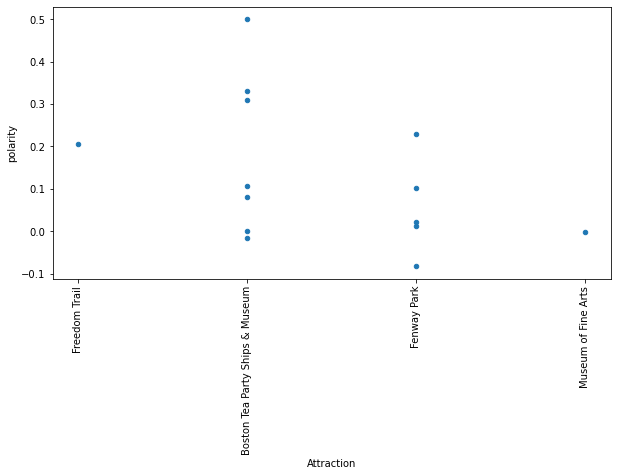

In [71]:
sample_size = len(time_money_poor)

def sentiment_func(x):
    sentiment = TextBlob(x['Text'])
    x['polarity'] = sentiment.polarity
    x['subjectivity'] = sentiment.subjectivity
    return x

sample = time_money_poor.sample(sample_size).apply(sentiment_func, axis=1)
sample.plot.scatter('Attraction', 'polarity').tick_params(axis='x', labelrotation = 90)

# Trigram Analysis

In [72]:
# 5 Star Analysis

trigram_5star = list(nltk.trigrams(tokens_5star))
fdist_tri_5star = FreqDist(trigram_5star)
fdist_tri_5star.most_common(50)

[(('old', 'north', 'church'), 252),
 (('paul', 'revere', 'house'), 206),
 (('museum', 'fine', 'art'), 130),
 (('would', 'highly', 'recommend'), 95),
 (('tea', 'party', 'ship'), 80),
 (('red', 'sox', 'fan'), 74),
 (('bunker', 'hill', 'monument'), 73),
 (('church', 'paul', 'revere'), 68),
 (('north', 'church', 'paul'), 66),
 (('well', 'worth', 'visit'), 65),
 (('great', 'way', 'see'), 64),
 (('house', 'old', 'north'), 58),
 (('party', 'ship', 'museum'), 54),
 (('highly', 'recommend', 'tour'), 54),
 (('revere', 'house', 'old'), 51),
 (('follow', 'red', 'brick'), 49),
 (('tea', 'party', 'museum'), 47),
 (('along', 'freedom', 'trail'), 47),
 (('red', 'sox', 'game'), 45),
 (('john', 'singer', 'sargent'), 45),
 (('walking', 'freedom', 'trail'), 43),
 (('fenway', 'park', 'tour'), 43),
 (('tour', 'guide', 'knowledgeable'), 41),
 (('walk', 'freedom', 'trail'), 40),
 (('walked', 'freedom', 'trail'), 40),
 (('wear', 'comfortable', 'shoe'), 37),
 (('north', 'end', 'great'), 37),
 (('throw', 'tea', 

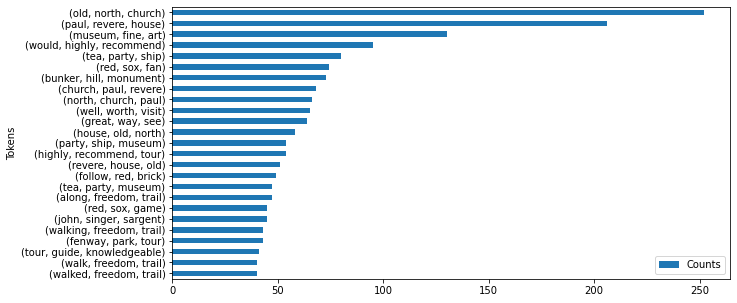

In [73]:
# Graph of 5 Star Trigram

fdist_tri_5star_graph = pd.DataFrame(fdist_tri_5star.most_common(25), columns=['Tokens', 'Counts']).set_index('Tokens').plot(kind='barh')
fdist_tri_5star_graph.invert_yaxis()

In [74]:
# 4 Star Analysis

trigram_4star = list(nltk.trigrams(tokens_4star))
fdist_tri_4star = FreqDist(trigram_4star)
fdist_tri_4star.most_common(50)

[(('paul', 'revere', 'house'), 58),
 (('old', 'north', 'church'), 48),
 (('tea', 'party', 'ship'), 28),
 (('museum', 'fine', 'art'), 19),
 (('tea', 'party', 'museum'), 18),
 (('throwing', 'tea', 'overboard'), 17),
 (('well', 'worth', 'visit'), 17),
 (('bunker', 'hill', 'monument'), 16),
 (('follow', 'red', 'brick'), 16),
 (('party', 'ship', 'museum'), 14),
 (('around', 'north', 'end'), 14),
 (('great', 'way', 'see'), 13),
 (('lot', 'italian', 'restaurant'), 12),
 (('learn', 'tea', 'party'), 11),
 (('red', 'sox', 'game'), 11),
 (('freedom', 'trail', 'great'), 11),
 (('walk', 'freedom', 'trail'), 11),
 (('house', 'old', 'north'), 11),
 (('history', 'tea', 'party'), 10),
 (('``', 'tea', "''"), 10),
 (('would', 'highly', 'recommend'), 10),
 (('great', 'way', 'spend'), 10),
 (('tour', 'guide', 'knowledgeable'), 10),
 (('red', 'brick', 'line'), 10),
 (('revere', 'house', 'old'), 10),
 (('north', 'end', 'great'), 10),
 (('many', 'italian', 'restaurant'), 10),
 (('story', 'tea', 'party'), 9),


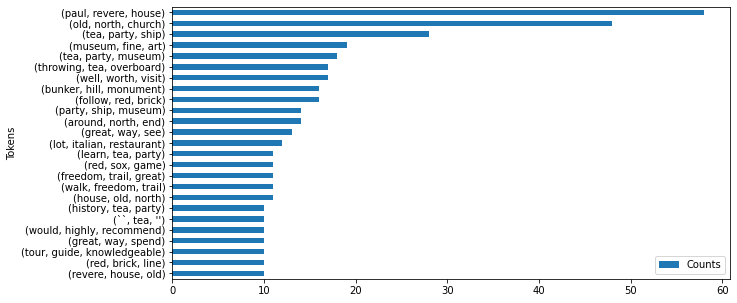

In [75]:
# Graph of 4 Star Trigram

fdist_tri_4star_graph = pd.DataFrame(fdist_tri_4star.most_common(25), columns=['Tokens', 'Counts']).set_index('Tokens').plot(kind='barh')
fdist_tri_4star_graph.invert_yaxis()

In [76]:
# Poor Analysis

trigram_poor = list(nltk.trigrams(tokens_poor))
fdist_tri_poor = FreqDist(trigram_poor)
fdist_tri_poor.most_common(50)

[(('old', 'north', 'church'), 8),
 (('tea', 'party', 'ship'), 6),
 (('party', 'ship', 'museum'), 5),
 (('red', 'sox', 'fan'), 5),
 (('paul', 'revere', 'house'), 5),
 (('many', 'people', 'tour'), 4),
 (('huge', 'baseball', 'fan'), 4),
 (('visitor', 'locker', 'room'), 4),
 (('top', 'green', 'monster'), 4),
 (('dugout', 'locker', 'room'), 4),
 (('walked', 'freedom', 'trail'), 4),
 (('house', 'old', 'north'), 4),
 (('trail', 'easy', 'follow'), 4),
 (('gift', 'shop', 'tea'), 3),
 (('kid', 'would', 'probably'), 3),
 (('great', 'gift', 'shop'), 3),
 (('``', 'tea', "''"), 3),
 (('waste', 'money', 'tour'), 3),
 (('throwing', 'tea', 'harbor'), 3),
 (('abigail', 'tea', 'room'), 3),
 (('tour', 'gift', 'shop'), 3),
 (('tea', 'party', 'experience'), 3),
 (('tea', 'party', 'museum'), 3),
 (('waste', 'time', 'money'), 3),
 (('self', 'guided', 'tour'), 3),
 (('revere', 'house', 'old'), 3),
 (('shop', 'tea', 'shop'), 2),
 (('think', 'kid', 'like'), 2),
 (('``', 'museum', "''"), 2),
 (('young', 'actor', 

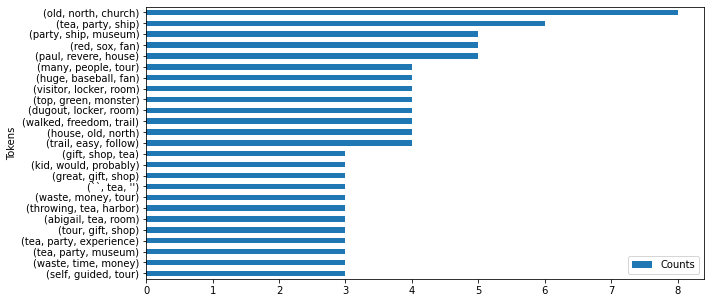

In [77]:
# Graph of Poor Bigram

fdist_tri_poor_graph = pd.DataFrame(fdist_tri_poor.most_common(25), columns=['Tokens', 'Counts']).set_index('Tokens').plot(kind='barh')
fdist_tri_poor_graph.invert_yaxis()

In [78]:
trigram_words_5star = [tup[0] for tup in fdist_tri_5star.most_common(50)]
trigram_words_5star

[('old', 'north', 'church'),
 ('paul', 'revere', 'house'),
 ('museum', 'fine', 'art'),
 ('would', 'highly', 'recommend'),
 ('tea', 'party', 'ship'),
 ('red', 'sox', 'fan'),
 ('bunker', 'hill', 'monument'),
 ('church', 'paul', 'revere'),
 ('north', 'church', 'paul'),
 ('well', 'worth', 'visit'),
 ('great', 'way', 'see'),
 ('house', 'old', 'north'),
 ('party', 'ship', 'museum'),
 ('highly', 'recommend', 'tour'),
 ('revere', 'house', 'old'),
 ('follow', 'red', 'brick'),
 ('tea', 'party', 'museum'),
 ('along', 'freedom', 'trail'),
 ('red', 'sox', 'game'),
 ('john', 'singer', 'sargent'),
 ('walking', 'freedom', 'trail'),
 ('fenway', 'park', 'tour'),
 ('tour', 'guide', 'knowledgeable'),
 ('walk', 'freedom', 'trail'),
 ('walked', 'freedom', 'trail'),
 ('wear', 'comfortable', 'shoe'),
 ('north', 'end', 'great'),
 ('throw', 'tea', 'overboard'),
 ('history', 'tea', 'party'),
 ('tour', 'fenway', 'park'),
 ('visit', 'north', 'end'),
 ('would', 'definitely', 'recommend'),
 ('around', 'north', 'end'

In [79]:
trigram_words_4star = [tup[0] for tup in fdist_tri_4star.most_common(50)]
trigram_words_4star

[('paul', 'revere', 'house'),
 ('old', 'north', 'church'),
 ('tea', 'party', 'ship'),
 ('museum', 'fine', 'art'),
 ('tea', 'party', 'museum'),
 ('throwing', 'tea', 'overboard'),
 ('well', 'worth', 'visit'),
 ('bunker', 'hill', 'monument'),
 ('follow', 'red', 'brick'),
 ('party', 'ship', 'museum'),
 ('around', 'north', 'end'),
 ('great', 'way', 'see'),
 ('lot', 'italian', 'restaurant'),
 ('learn', 'tea', 'party'),
 ('red', 'sox', 'game'),
 ('freedom', 'trail', 'great'),
 ('walk', 'freedom', 'trail'),
 ('house', 'old', 'north'),
 ('history', 'tea', 'party'),
 ('``', 'tea', "''"),
 ('would', 'highly', 'recommend'),
 ('great', 'way', 'spend'),
 ('tour', 'guide', 'knowledgeable'),
 ('red', 'brick', 'line'),
 ('revere', 'house', 'old'),
 ('north', 'end', 'great'),
 ('many', 'italian', 'restaurant'),
 ('story', 'tea', 'party'),
 ('would', 'definitely', 'recommend'),
 ('walking', 'freedom', 'trail'),
 ('red', 'sox', 'fan'),
 ('trail', 'great', 'way'),
 ('self', 'guided', 'tour'),
 ('church', '

In [80]:
trigram_words_poor = [tup[0] for tup in fdist_tri_poor.most_common(50)]
trigram_words_poor

[('old', 'north', 'church'),
 ('tea', 'party', 'ship'),
 ('party', 'ship', 'museum'),
 ('red', 'sox', 'fan'),
 ('paul', 'revere', 'house'),
 ('many', 'people', 'tour'),
 ('huge', 'baseball', 'fan'),
 ('visitor', 'locker', 'room'),
 ('top', 'green', 'monster'),
 ('dugout', 'locker', 'room'),
 ('walked', 'freedom', 'trail'),
 ('house', 'old', 'north'),
 ('trail', 'easy', 'follow'),
 ('gift', 'shop', 'tea'),
 ('kid', 'would', 'probably'),
 ('great', 'gift', 'shop'),
 ('``', 'tea', "''"),
 ('waste', 'money', 'tour'),
 ('throwing', 'tea', 'harbor'),
 ('abigail', 'tea', 'room'),
 ('tour', 'gift', 'shop'),
 ('tea', 'party', 'experience'),
 ('tea', 'party', 'museum'),
 ('waste', 'time', 'money'),
 ('self', 'guided', 'tour'),
 ('revere', 'house', 'old'),
 ('shop', 'tea', 'shop'),
 ('think', 'kid', 'like'),
 ('``', 'museum', "''"),
 ('young', 'actor', 'take'),
 ('nice', 'way', 'spend'),
 ('way', 'spend', 'hour'),
 ('would', 'probably', 'really'),
 ('trolley', 'tour', 'decided'),
 ('wall', 'wall'

In [81]:
trigram_common_words = list(set(trigram_words_5star).intersection(trigram_words_poor))
trigram_common_words = list(set(trigram_common_words).intersection(trigram_words_4star))
trigram_common_words

[('tea', 'party', 'museum'),
 ('house', 'old', 'north'),
 ('``', 'tea', "''"),
 ('self', 'guided', 'tour'),
 ('party', 'ship', 'museum'),
 ('revere', 'house', 'old'),
 ('red', 'sox', 'fan'),
 ('paul', 'revere', 'house'),
 ('abigail', 'tea', 'room'),
 ('tea', 'party', 'ship'),
 ('old', 'north', 'church')]

In [82]:
words_5star_tri_count = [tup for tup in fdist_tri_5star.most_common(50) if tup[0] in trigram_common_words]
print(len(words_5star_tri_count))

words_5star_tri_count_df = pd.DataFrame(words_5star_tri_count, columns = ['Words', '5Star_Count'])
words_5star_tri_count_df

11


,Words,5Star_Count
0,"(old, north, church)",252
1,"(paul, revere, house)",206
2,"(tea, party, ship)",80
3,"(red, sox, fan)",74
4,"(house, old, north)",58
5,"(party, ship, museum)",54
6,"(revere, house, old)",51
7,"(tea, party, museum)",47
8,"(self, guided, tour)",34
9,"(``, tea, '')",26


In [83]:
words_4star_tri_count = [tup for tup in fdist_tri_4star.most_common(50) if tup[0] in trigram_common_words]
print(len(words_4star_tri_count))


words_4star_tri_count_df = pd.DataFrame(words_4star_tri_count, columns = ['Words', '4Star_Count'])
words_4star_tri_count_df

11


,Words,4Star_Count
0,"(paul, revere, house)",58
1,"(old, north, church)",48
2,"(tea, party, ship)",28
3,"(tea, party, museum)",18
4,"(party, ship, museum)",14
5,"(house, old, north)",11
6,"(``, tea, '')",10
7,"(revere, house, old)",10
8,"(red, sox, fan)",9
9,"(self, guided, tour)",9


In [84]:
words_poor_tri_count = [tup for tup in fdist_tri_poor.most_common(50) if tup[0] in trigram_common_words]
print(len(words_poor_tri_count))

words_poor_tri_count_df = pd.DataFrame(words_poor_tri_count, columns = ['Words', 'Poor_Count'])
words_poor_tri_count_df

11


,Words,Poor_Count
0,"(old, north, church)",8
1,"(tea, party, ship)",6
2,"(party, ship, museum)",5
3,"(red, sox, fan)",5
4,"(paul, revere, house)",5
5,"(house, old, north)",4
6,"(``, tea, '')",3
7,"(abigail, tea, room)",3
8,"(tea, party, museum)",3
9,"(self, guided, tour)",3


In [85]:
from functools import reduce

tri_dfs = [words_5star_tri_count_df, words_4star_tri_count_df, words_poor_tri_count_df]

combined_words_tri_df = reduce(lambda left,right: pd.merge(left,right,on='Words'), tri_dfs)
combined_words_tri_df

,Words,5Star_Count,4Star_Count,Poor_Count
0,"(old, north, church)",252,48,8
1,"(paul, revere, house)",206,58,5
2,"(tea, party, ship)",80,28,6
3,"(red, sox, fan)",74,9,5
4,"(house, old, north)",58,11,4
5,"(party, ship, museum)",54,14,5
6,"(revere, house, old)",51,10,3
7,"(tea, party, museum)",47,18,3
8,"(self, guided, tour)",34,9,3
9,"(``, tea, '')",26,10,3


In [86]:
combined_words_tri_df[['5Star_Count']] = combined_words_tri_df[['5Star_Count']]/count_5star_ttl
combined_words_tri_df[['4Star_Count']] = combined_words_tri_df[['4Star_Count']]/count_5star_ttl
combined_words_tri_df[['Poor_Count']] = combined_words_tri_df[['Poor_Count']]/count_5star_ttl
combined_words_tri_df

,Words,5Star_Count,4Star_Count,Poor_Count
0,"(old, north, church)",0.033062,0.006298,0.001050
1,"(paul, revere, house)",0.027027,0.007610,0.000656
2,"(tea, party, ship)",0.010496,0.003674,0.000787
3,"(red, sox, fan)",0.009709,0.001181,0.000656
4,"(house, old, north)",0.007610,0.001443,0.000525
5,"(party, ship, museum)",0.007085,0.001837,0.000656
6,"(revere, house, old)",0.006691,0.001312,0.000394
7,"(tea, party, museum)",0.006166,0.002362,0.000394
8,"(self, guided, tour)",0.004461,0.001181,0.000394
9,"(``, tea, '')",0.003411,0.001312,0.000394


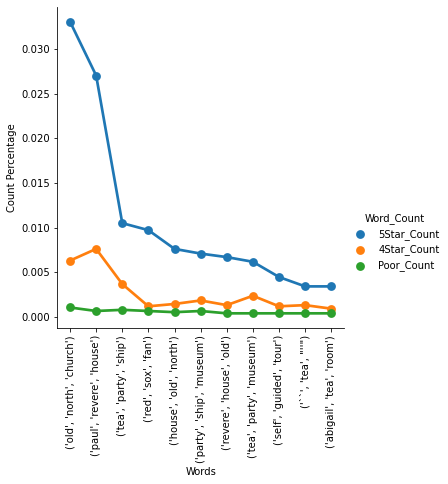

<Figure size 720x360 with 0 Axes>

In [87]:
combined_words_tri_df_plot = combined_words_tri_df.melt('Words', var_name='Word_Count', value_name = 'Count Percentage')
combined_words_tri_df_plot = sns.catplot(x="Words", y="Count Percentage", hue='Word_Count', 
                                         data=combined_words_tri_df_plot, kind='point')
plt.figure(figsize=(10,5))
combined_words_tri_df_plot.set_xticklabels(rotation='vertical', fontsize=10)
plt.show()

In [88]:
trigram_words_5star_only = list(set(trigram_words_5star) - set(trigram_words_4star) - set(trigram_words_poor))
trigram_words_5star_only

[('great', 'italian', 'restaurant'),
 ('love', 'north', 'end'),
 ('highly', 'recommend', 'tour'),
 ('well', 'worth', 'time'),
 ('john', 'singer', 'sargent'),
 ('throw', 'tea', 'overboard'),
 ('game', 'fenway', 'park'),
 ('tour', 'fenway', 'park'),
 ('wear', 'comfortable', 'shoe'),
 ('fenway', 'park', 'tour'),
 ('well', 'worth', 'money'),
 ('part', 'freedom', 'trail'),
 ('along', 'freedom', 'trail'),
 ('old', 'state', 'house')]

In [89]:
trigram_words_4star_only = list(set(trigram_words_4star) - set(trigram_words_5star) - set(trigram_words_poor))
trigram_words_4star_only

[('walked', 'north', 'end'),
 ('trail', 'great', 'way'),
 ('great', 'tour', 'guide'),
 ('tour', 'tea', 'party'),
 ('throw', '``', 'tea'),
 ('red', 'brick', 'line'),
 ('many', 'italian', 'restaurant'),
 ('little', 'italy', "''"),
 ('freedom', 'trail', 'take'),
 ('find', 'way', 'around'),
 ('reenactment', 'tea', 'party'),
 ('``', 'little', 'italy'),
 ('definitely', 'worth', 'visit'),
 ('learn', 'tea', 'party'),
 ('story', 'tea', 'party'),
 ('lot', 'italian', 'restaurant')]

In [90]:
trigram_words_poor_only = list(set(trigram_words_poor) - set(trigram_words_5star) - set(trigram_words_4star))
trigram_words_poor_only

[('booked', 'ticket', 'online'),
 ('overboard', 'gift', 'shop'),
 ('young', 'actor', 'take'),
 ('waste', 'money', 'tour'),
 ('dugout', 'locker', 'room'),
 ('trail', 'easy', 'follow'),
 ('tour', 'led', 'actor'),
 ('good', 'nice', 'view'),
 ('tour', 'gift', 'shop'),
 ('tour', 'guide', 'make'),
 ('tour', 'getting', 'go'),
 ('actor', 'costume', 'playing'),
 ('nice', 'way', 'spend'),
 ('money', 'tea', 'party'),
 ('kid', 'would', 'probably'),
 ('way', 'spend', 'hour'),
 ('many', 'people', 'tour'),
 ('waste', 'time', 'money'),
 ('trolley', 'tour', 'decided'),
 ('think', 'kid', 'like'),
 ('``', 'museum', "''"),
 ('huge', 'baseball', 'fan'),
 ('visitor', 'locker', 'room'),
 ('gift', 'shop', 'tea'),
 ('actor', 'good', 'job'),
 ('shop', 'tea', 'shop'),
 ('tea', 'party', 'experience'),
 ('would', 'probably', 'really'),
 ('tour', 'let', 'u'),
 ('gift', 'shop', 'neat'),
 ('many', 'people', 'group'),
 ('kid', 'enjoyed', 'throwing'),
 ('wall', 'wall', 'people'),
 ('throwing', 'tea', 'harbor'),
 ('staf

In [91]:
old_north_church = ta_5vspoor[(ta_5vspoor['Rating']==5) &
           (ta_5vspoor['Text'].str.contains('old')) &
           (ta_5vspoor['Text'].str.contains('north')) &
           (ta_5vspoor['Text'].str.contains('church'))]

In [92]:
ta_5vspoor.loc[19224,'Text']

'This was my first visit to Boston, amazing city rich in history. Loved the Freedom Trail. Follow the red bricks throughout the city and youâ€™ll find cemeteries where Samuel Adams, The Franklins (Ben Franklins parents) were buried. Paul Revereâ€™s home, the old north church.'

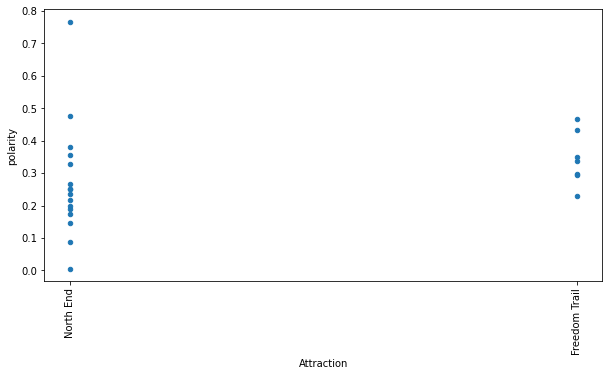

In [93]:
from textblob import TextBlob

sample_size = len(old_north_church)

def sentiment_func(x):
    sentiment = TextBlob(x['Text'])
    x['polarity'] = sentiment.polarity
    x['subjectivity'] = sentiment.subjectivity
    return x

sample = old_north_church.sample(sample_size).apply(sentiment_func, axis=1)
sample.plot.scatter('Attraction', 'polarity').tick_params(axis='x', labelrotation = 90)

In [94]:
for i in list(old_north_church.index):
    print(i)
    print(old_north_church.loc[i, 'Attraction'])
    print(old_north_church.loc[i, 'Text'])
    print('\n')
    print('-'*50)

19224
Freedom Trail
This was my first visit to Boston, amazing city rich in history. Loved the Freedom Trail. Follow the red bricks throughout the city and youâ€™ll find cemeteries where Samuel Adams, The Franklins (Ben Franklins parents) were buried. Paul Revereâ€™s home, the old north church.


--------------------------------------------------
19273
Freedom Trail
This was a great walk. Getting to see Paul Revereâ€™s house, old north church, and other sites was fantastic. I learned about this in school. It was fun to see these sites.


--------------------------------------------------
19321
Freedom Trail
We started near the harbor and walked by the graveyard, explored the graveyard, then went to the old north church where Paul Revere lit the candles to alert the other riders. The trail is in a beautiful neighborhood, is easy to follow, and if you are lucky, actors will come around and give you a talk!


--------------------------------------------------
19688
Freedom Trail
I love th

In [95]:
# Reviews containing the top trigram for Poor Ratings


waste_money_tour = ta_5vspoor[(ta_5vspoor['Rating']=='Poor') &
           (ta_5vspoor['Text'].str.contains('waste')) &
           (ta_5vspoor['Text'].str.contains('money')) &
           (ta_5vspoor['Text'].str.contains('tour'))]
waste_money_tour

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Loc1,User_Loc2,User_Loc3,User_Loc4,User_Loc5
23454,Boston Tea Party Ships & Museum,Boston,2018-06-01,2018-06-01,146,21,1,Poor,"We just completed this tour and were very underwhelmed. It was boring throughout and not â€œhigh techâ€ at all. For $100+ for 5 people we were very disappointed. Definitely the low point of our trip to Boston. Thankfully we only wasted an hour of our day. We typically agree with reviews on trip advisor, but this was not one of them. Skip this and do the Duck Tour...totally worth the money.",Boring....did not meet expectations,Terri H,PHOENIX,AZ,,,
24385,Boston Tea Party Ships & Museum,Boston,2019-11-01,2019-10-01,27,8,0,Poor,"My wife and I were on a trip to Boston sightseeing and was looking forward to visiting this attraction. We paid $59 for both of us and of all the things that we did on our three week trip to New England this was by far the biggest waste of money. The tour starts in a mock up of the Old Meeting house and is conducted by two role playing guides. The whole presentation is aimed at young children - probably 5 to 10 year olds - fair enough but we hoped we would be able to read the info in the exhibits. However, the issue is that everything is rushed and the very few things to read/look at that are in the ""museum"" you are not given time to take in. When we went out to the boat the guide gave his talk on the top deck and then asked everybody to go down to the next deck where he would continue the tour. There were two sets of stairs going down but we were told we could only use one. We were at the back of a large group, thirty or forty people, and by the time we had filed downstairs the guide was already half way through his talk so we missed it (no waiting allowed as they have to clear the room for the next group). After the talk the group were very quickly led around the lower deck in single file and back up the other stairs - no time to really look at anything. We then went on the quayside for another short discourse from the guide where there were some poster exhibits to read. However, by the time we filed off the boat at the back of the group we were told to move on and did not have time to read any of the exhibits. This happened throughout the rest of the ""tour"". The whole thing lasted less than an hour and was a total waste of time and money! Give this a miss - your time is much better spent exploring many of the other excellent attractions in Boston especially the Navy Dockyard where you get as much time as you want to spend on two real boats!",Rushed tour with no time to see anything,Tim O,BASINGSTOKE,UNITED KINGDOM,,,
27624,Fenway Park,Boston,2019-07-01,NaT,2,0,0,Poor,Horrible waste of money. Our tour guide was nice but had no information and just walked us around which u can do on your own. They put way too many people on 1 tour was not private at all.,$75 tour,Cole E,TWIN FALLS,ID,,,


In [96]:
ta_5vspoor.loc[23454, 'Text']

'We just completed this tour and were very underwhelmed. It was boring throughout and not â€œhigh techâ€\x9d at all. For $100+ for 5 people we were very disappointed. Definitely the low point of our trip to Boston. Thankfully we only wasted an hour of our day. We typically agree with reviews on trip advisor, but this was not one of them. Skip this and do the Duck Tour...totally worth the money.'

In [97]:
ta_5vspoor.loc[24385, 'Text']

'My wife and I were on a trip to Boston sightseeing and was looking forward to visiting this attraction. We paid $59 for both of us and of all the things that we did on our three week trip to New England this was by far the biggest waste of money. The tour starts in a mock up of the Old Meeting house and is conducted by two role playing guides. The whole presentation is aimed at young children - probably 5 to 10 year olds - fair enough but we hoped we would be able to read the info in the exhibits. However, the issue is that everything is rushed and the very few things to read/look at that are in the "museum" you are not given time to take in. When we went out to the boat the guide gave his talk on the top deck and then asked everybody to go down to the next deck where he would continue the tour. There were two sets of stairs going down but we were told we could only use one. We were at the back of a large group, thirty or forty people, and by the time we had filed downstairs the guide

In [98]:
ta_5vspoor.loc[27624, 'Text']

'Horrible waste of money. Our tour guide was nice but had no information and just walked us around which u can do on your own. They put way too many people on 1 tour was not private at all.'

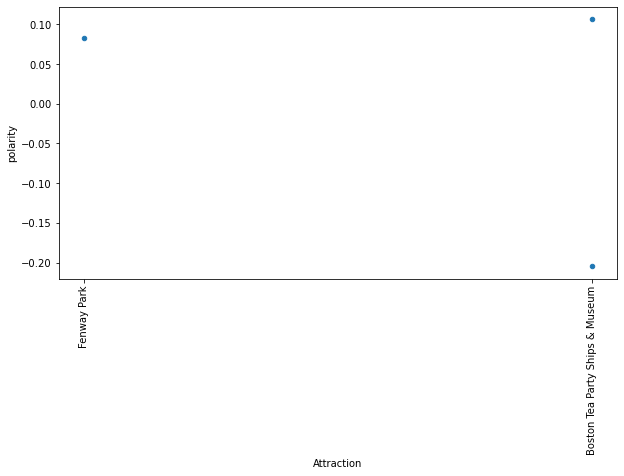

In [99]:
from textblob import TextBlob

sample_size = len(waste_money_tour)

def sentiment_func(x):
    sentiment = TextBlob(x['Text'])
    x['polarity'] = sentiment.polarity
    x['subjectivity'] = sentiment.subjectivity
    return x

sample = waste_money_tour.sample(sample_size).apply(sentiment_func, axis=1)
sample.plot.scatter('Attraction', 'polarity').tick_params(axis='x', labelrotation = 90)

# Analysis of Helpful Reviews

In [100]:
ta_5vspoor_helpful_df = ta_5vspoor[ta_5vspoor['Review_Helpful']>0]
ta_5vspoor_helpful_df.sample(10)

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Loc1,User_Loc2,User_Loc3,User_Loc4,User_Loc5
23469,Boston Tea Party Ships & Museum,Boston,2018-06-01,2018-06-01,547,165,1,4,"At USD 30 to go in, it seems a little pricy. The whole experience combines theatrical presentation with learning, and the replica ship (Eleanor) that we were on was very well built and presented. The tour takes 60 minutes, plus a 15 minute film. You get to throw tea in the harbour, and are given a character. You may be part of the story! Itâ€™s not fully wheelchair accessible.",Fun and informative but expensive,Ed Longley,GUILDFORD,UNITED KINGDOM,,,
26383,North End,Boston,2019-11-01,2019-09-01,245,95,1,4,"The North End is a vibrant Italian neighborhood on the north side of downtown Boston with many Italian restaurants and something for every budget. On some of the side streets, you'll find less-traveled, lower-cost places and on the main arteries the more touristy and more expensive places. There are some gems in here, such as Mama Maria's and Lucca's. On the lower-cost side, one could try La Summa. On certain less busy days and times, the charm of the North End is fantastic - trattorias, bakeries, butchers, small grocery stores, etc. operating as individual businesses. It is one of the, if not the most interesting little Italy neighborhood in America and deserves a visit.","Touristy, sometimes overpriced, but a must do, if you've never been!",RoadWarrior_BOS,BOSTON,MA,,,
27988,Fenway Park,Boston,2019-09-01,2019-09-01,63,13,1,5,Everyone that comes to Boston needs to take this one hour tour. Soooo much history!! Rich was great. He has lived here all of his 71 yrs and knows everything.,A MUST,tspillman,HIGHLAND VILLAGE,TX,,,
24026,Boston Tea Party Ships & Museum,Boston,2019-05-01,2019-05-01,131,44,1,4,"This is pricey at $30. If you do the Old Town Trolley Tour you get $10 off, and that's about the price it's worth. It starts out with an actor playing Sam Adams giving a fiery speech to stir up the colonists (aka you). Then you move onto the ship and get a quick tour. Then it's inside for some cool multimedia presentations. Throughout the tour you have a patriot in character guiding you along. I was hesitant to do this tour after some reviews said it wasn't worth it, but after I did it, I can't imagine my Boston vacation being complete without it.","Pricey, but interactive",valorrmac,CINCINNATI,OH,,,
24068,Boston Tea Party Ships & Museum,Boston,2019-06-01,2019-06-01,17,8,1,5,The Boston Tea Party comes alive during this interactive experience. My elementary school aged children really enjoyed it and had a much better understanding of the Boston Tea Party than they would have gotten at a â€œtraditionalâ€ museum. It also served as a great reference point to explain other sights along the Freedom Trail once they had this base knowledge. The whole experience is well thought out and the employees really go above and beyond to make this a fantastic experience for all ages.,Boston Tea Party Comes Alive,jlockfl,FL,,,,
21493,Museum of Fine Arts,Boston,2017-11-01,2017-11-01,94,36,2,Poor,"The near side of Museum Road has parking meters, coin or phone operated. But if your visit runs past 6:00 PM, you will get a $40 parking ticket. There is one sign at each end of the block that says the spaces are ""restricted to residents"" after 6:00 PM. No sticker on the meter, no other signs between the ends of the block. The museum? That is fine. But evidently they haven't complained to the city of Boston about the predatory parking situation next to them.",Dangerous neighborhood. Parking meter scam.,Concord_MABill,CONCORD,MA,,,
18905,Freedom Trail,Boston,2018-09-01,2018-09-01,50,5,1,5,We were captivated after just a few steps! So much history along this wondrous trail! You never know what surprise awaits. We happened upon a ceremony at the State House honoring medal of valor recipients. It was fascinating and inspiring!,Freedo

In [101]:
helpful_total = len(ta_5vspoor_helpful_df)
helpful_total

1089

In [102]:
helpful_5star = len(ta_5vspoor_helpful_df[ta_5vspoor_helpful_df['Rating']==5])
helpful_5star

811

In [103]:
helpful_4star = len(ta_5vspoor_helpful_df[ta_5vspoor_helpful_df['Rating']==4])
helpful_4star

188

In [104]:
helpful_poor = len(ta_5vspoor_helpful_df[ta_5vspoor_helpful_df['Rating']=='Poor'])
helpful_poor

90

In [105]:
count_5star_ttl

7622

In [106]:
count_4star_ttl

1873

In [107]:
count_poor_ttl

490

In [108]:
# Helpful reviews that gave 5 stars

helpful_5star/count_5star_ttl

0.10640251902387825

In [109]:
# Helpful reviews that gave 4 stars

helpful_4star/count_4star_ttl

0.1003737319807795

In [110]:
# Helpful reviews that gave 3 or fewer stars

helpful_poor/count_poor_ttl

0.1836734693877551

- It seems that reviews that rated attractions with 3 stars or fewer were more likely to be viewed as helpful

In [111]:
ta_5vspoor_helpful_df[ta_5vspoor_helpful_df['Rating']=='Poor'].sample(10)

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Loc1,User_Loc2,User_Loc3,User_Loc4,User_Loc5
23886,Boston Tea Party Ships & Museum,Boston,2018-12-01,2018-12-01,22,28,1,Poor,"I visited this museum with my 13 years boy. It's a nice small exhibition, mostly played by actors and contains visual effects. Not a regular museum you are expected to see. As for my boy it was boring especially if English isn't your language. So it looks like more as a small show on very low level. Don't waste your time and money, just take a walk around .",Doesn't worth the price,Alextsvang,,,,,
20238,Freedom Trail,Boston,2019-09-01,2019-09-01,1,1,1,Poor,"Dr. Joseph Warren is an incredible tour guide/ and all of the tour guides do an amazing job to bring the history and culture of Boston to the public, however I donâ€™t support how the Freedom Trail Foundation treats its tour guides and employees. I support the Bellringers Guild/ help give these amazing guides the fair contracts they deserve. And the rights they deserve to adequate support during inclement weather and high heat indexes.",Support The BellRingers Guild,Timmy C,,,,,
27833,Fenway Park,Boston,2019-08-01,2019-08-01,220,29,1,Poor,"Go for the experience, not for comfort. While the stadium was full of history, it was not a good place to see the games I attended. There were no ushers stationed around to guide you to your seat, the seats were uncomfortable, the sound system announcing the players was terrible. They certainly can update the stadium without compromising history. Better, larger screens to view the game and other activities would be helpful. We spent most of our time on the MLB app trying to keep track of pitches, outs and the score. The regular attendees were more than helpful if we asked them a question, or we may not have found our seats. I can say ""Been there, done that"" but it was not the most enjoyable baseball game I have been to. My review is not based on sour grapes - our team won both games.","Lots of history in this place, but no comfort!",Linda B,WILMINGTON,DE,,,
25664,North End,Boston,2018-04-01,2018-03-01,620,2,2,Poor,"The north end is a nice area to roam around, Italy is in itÂ´s arms but no italian piazzas. We have sampled some of the restaurants but they are little too much americanized in their cuisines.",Nice area to roam,Niels L,COPENHAGEN,DENMARK,,,
23801,Boston Tea Party Ships & Museum,Boston,2018-10-01,2018-09-01,69,13,1,Poor,"We went on a rainy September Wednesday around lunchtime. There were people participating in the tea party, by throwing large square 'bales of tea' overboard. I believe they paid to go onboard to tour the real looking ship and participate in the revolution. The staff were dressed in historically appropriate attire and kids would probably really get a kick out of doing this. We checked out the gift shop too, but overall it just wasn't my 'cup of tea'. We did walk close by to a waterfront seafood restaurant that was great but when the rain picked up it was a chilly (yummy) meal under their tent.",Cute & Historical But A Bit Too 'Canned' For My Taste,Karen S,VIENNA,OH,,,
26501,Fenway Park,Boston,2018-09-01,2018-08-01,4,3,1,Poor,"Tickets for this are available only on the day of the tour. IT IS A WASTE OF TIME AND MONEY!! We spent time on the field, were then ushered to sit down, the guide said that there was no time to talk about the history of the park (because the warm-up music started) but if you have questions to ask him. Then up to the Green Monster where we watched batting practice - and the tour was over. Are you kidding me?? The last time we took a group tour which was fun and informative - and you could buy tickets online. For this I had to go the the park earlier in the day to get the tickets? Forget about it!!",Pre-Game Tour,thishappycamper,NEW YORK,NY,,,
20188,Freedom Trail,Boston,2019-09-01,2019-09-01,4,1,1,Poor,"Iâ€™ve never given a $20 tip to anyone, but Lydia Mullikin wa

In [112]:
ta_5vspoor_helpful_df.loc[22956, 'Text']

"Aimed at a very low level of intellect, which may be why it is popular. You can take this tour and finish with very little idea of what the event was, what led up to it, or why it turned out to be significant. The only thought that seeps through is that if you are angry over an insignificant tax, it is ok to destroy other people's property. An actress of limited ability plays the role of an actual participant, and conducts the tour, which is not really a museum visit but a replica ship and then a series of rooms with videos. At over $25 a head, this is not a good way to spend your tourist dollar."

In [113]:
ta_5vspoor_helpful_df.loc[22956, 'User_Loc2']

'SPAIN'

In [114]:
ta_5vspoor_helpful_df.loc[23023, 'Text']

"Sorry guys but we really didn't like this museum. The role play by actors in costumes was frankly embarrassing (British reserve I guess) and so little history about what actually happened and its significance. We all found the shouty actors irritating after a while, and the one exhibit in the museum just made us laugh - a tea chest on a rotating podium with spotlights, behind glass. Really? The crown jewels in the Tower of London have less fanfare than that. The film was really good though (no shouting) but the talking portraits were frankly silly. The portrayal of King George was laughable and comedic - not suitable for a historic museum and a bit insulting I thought (although understandable given the context I guess). Sorry guys, this place is clearly aimed at a domestic audience and to be fair the US visitors seemed to love it. However we just didn't enjoy it and the whole experience left us cold and irritable. Great gift shop though with the best selection we saw anywhere in Bosto

In [115]:
ta_5vspoor_helpful_df.loc[23023, 'User_Loc2']

'UNITED KINGDOM'

In [116]:
ta_5vspoor_helpful_df.loc[19156, 'Text']

'After reading some other reviewers comments we decided to do the Freedom Trail without a guide as we were only in Boston for the day and wanted to be able to walk the whole trail from beginning to end. It is a lot of walking so be sure to wear comfortable shoes! I was glad we did not make a reservation in advance as we had problems getting to Boston from the train and took us longer than expected so we would of missed our time so by us doing self guided tour it worked out fine. We started at what we thought was the Boston Common, but some how didn\'t start where we wanted to so had to do some back tracking. We saw what you would of seen if you did the "Walk into History" and "North End" tours. It was nice as we could go at our own pace and take a lot of pictures. If I did it again the next time I would do a guided tour so I got a little more history and understood what I was looking at without having to google it on my phone.'

In [117]:
ta_5vspoor_helpful_df.head()

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Loc1,User_Loc2,User_Loc3,User_Loc4,User_Loc5
22733,Boston Tea Party Ships & Museum,Boston,2017-06-01,2017-05-01,72,53,1,5,We had a great time learning the history of the Boston Tea Party. Great audience participation with the live period dress characters. We had a great time even though it was raining. This is an excellent attraction and I would recommend a visit. A good tip is to pre book Boston Trolly Bus tickets and there is the opportunity to visit the Boston Tea Party Ships and Museam for free.,"Informative history of Boston, well worth a visit",Simon Lewis,BROMLEY,UNITED KINGDOM,,,
22781,Boston Tea Party Ships & Museum,Boston,2017-06-01,2017-06-01,17,15,1,5,We have 8 kids ranging from 6-19 and EVERYONE loves this museum. It was worth every penny! Super interactive and educational!,Best Museum in Boston!!!,jaydeelady,ORANGEVALE,CA,,,
22904,Boston Tea Party Ships & Museum,Boston,2017-07-01,2017-07-01,161,54,1,5,Educational and interactive. My 10 yo son and I really enjoyed it. We also liked the gift shop they had a lot of nice things. We used the on and off trolley tour to get there so we didn't have to worry about parking.,Cool,Charlieboysmom,,,,,
22936,Boston Tea Party Ships & Museum,Boston,2017-07-01,2017-07-01,147,48,1,4,tried to visit on a busy saturday only to find tours for the day sold out. :( as it is a bit of a walk and if you don't mind traveling the freedom trail out of order i'd recommend. starting here or at least making it a stop early in your day. This sight is NOT self guided and entry is by timed tickets.,Tried to visit on a busy Saturday,momLofteens,BOSTON,MA,,,
22956,Boston Tea Party Ships & Museum,Boston,2017-08-01,2017-07-01,"1,169",779,1,Poor,"Aimed at a very low level of intellect, which may be why it is popular. You can take this tour and finish with very little idea of what the event was, what led up to it, or why it turned out to be significant. The only thought that seeps through is that if you are angry over an insignificant tax, it is ok to destroy other people's property. An actress of limited ability plays the role of an actual participant, and conducts the tour, which is not really a museum visit but a replica ship and then a series of rooms with videos. At over $25 a head, this is not a good way to spend your tourist dollar.",Juvenile,MannyG2000,BARCELONA,SPAIN,,,


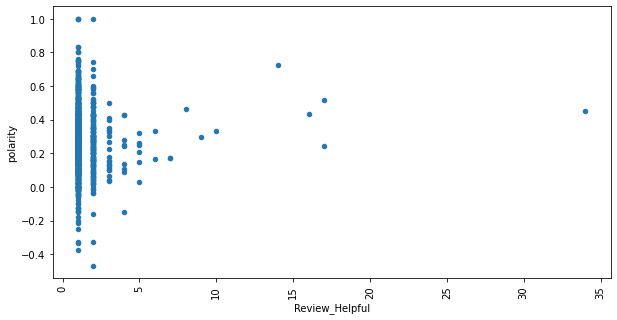

In [118]:
from textblob import TextBlob

sample_size = len(ta_5vspoor_helpful_df)

def sentiment_func(x):
    sentiment = TextBlob(x['Text'])
    x['polarity'] = sentiment.polarity
    x['subjectivity'] = sentiment.subjectivity
    return x

sample = ta_5vspoor_helpful_df.sample(sample_size).apply(sentiment_func, axis=1)
sample.plot.scatter('Review_Helpful', 'polarity').tick_params(axis='x', labelrotation = 90)

- Helpful reviews tend to be more positive

### Analysis of Review Text Polarity of the 20 most helpful users

In [119]:
helpful_users = ta_5vspoor.sort_values(by=['User_Helpful'], ascending = False).head(20)
helpful_users['Username'] = helpful_users['Username'].astype(str)
helpful_users

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Loc1,User_Loc2,User_Loc3,User_Loc4,User_Loc5
22139,Museum of Fine Arts,Boston,2019-01-01,2018-12-01,"4,905",988,0,5,"To be honest, it was not a planned visit and we only learned about this Museum whilst in Boston (the fact that it was free entry from 4pm that day encouraged us even more). But, boy, are we glad we went there ! What a great surprise to find such a huge collection of Dutch Golden Age and French impressionists ! Being European tourists, that's where we spent all of our time ; but we learned later that the American Art displays are even more impressive. So much splendid art, so little time . . . next time, for sure.",Wonderful surprise,Dirk W,ALEXANDRA HEADLAND,AUSTRALIA,,,
20974,Museum of Fine Arts,Boston,2017-05-01,2017-04-01,"5,762",987,0,5,"In addition to seeing the Art in Bloom displays around the museum, we viewed Botticelli and Search for the Divine, Make Way for Ducklings: The Art of Robert McCloskey, and Matisse in the Studio. The Matisse exhibit was interesting as the you can see the works with the objects of inspiration including a pewter jug, a chocolate maker, an Andalusian vase, textiles, sculptures and masks.",Another lovely Art in Bloom!,Nikko4Me,MILFORD,MA,,,
19426,Freedom Trail,Boston,2019-01-01,2018-12-01,"4,905",987,0,4,"Just follow the red brick road, you cannot go wrong. We walked it several times on our way from Boston Common to a restaurant around Faneuil Hall. Then finally we bought tickets for the guided tour from the kiosk in Boston Common and joined a small group of about 8 people. The tour guide was most informative and entertaining : at $ 12 per person it is a small investment to learn heaps about an important period of Boston's (and America's !) history in a fun way.",Boston best,Dirk W,ALEXANDRA HEADLAND,AUSTRALIA,,,
27259,Fenway Park,Boston,2019-05-01,2019-05-01,"9,552",973,0,5,I was here for an afternoon game. The weather was ok and it wasnâ€™t that crowded. Itâ€™s a great old park that is full of character and they embrace the past. Itâ€™s a great place to go. Iâ€™ve been to over 20 parks and this is second only to Wrigley.,Great park.,LostALot22,CHICAGO,IL,,,
21284,Museum of Fine Arts,Boston,2017-08-01,2017-05-01,"1,038",949,0,4,"My spouse and I visited Bostonâ€™s Museum of Fine Arts (MFA) on a Saturday afternoon in late May 2017. The museum is open daily from approximately 10:00 am until 5:00 pm, with extended hours until 10:00 pm on Wednesdays (including â€œWinedaysâ€ social event), Thursdays, and Fridays (including the monthly reoccurring â€œFirst Fridayâ€ cocktail party). Be sure to check their website for exact details. Admission costs $25 per adult, but you can enjoy a repeat visit within 10 days. If you visit the neighboring Isabella Stewart Gardner Museum (ISGM), you can save $2 on a combined admission. You are requested to check larger bags at the coat check counter. The over 600,000-square foot museum (founded in 1870) opened in its present Fenway-Kenmore neighborhood location in the early 1900s. The museum seems to occupy a series of interconnected buildings and wings (which makes navigating around a bit tricky). The museum collection is displayed in over 30 spacious, high-ceilinged galleries spread over four floors (including the basement). You can use either stairs or elevators to travel between the levels. Several dining options are available, including Bravo, American CafÃ©, Taste, and the Garden Cafeteria (listed in descending order from most formal/expensive to least). The expansive glass-enclosed courtyard hosts one of my favorite pieces in the museum, Dale Chihulyâ€™s 42-foot-high lime green icicle tower. Another favorite space is the rotunda with colonnades and frescoes painted by John Singer Sargent. (We loved how the museum placed a mirror in the center of the first floor space so that you can view the reflected ceiling paintings without craning your ne

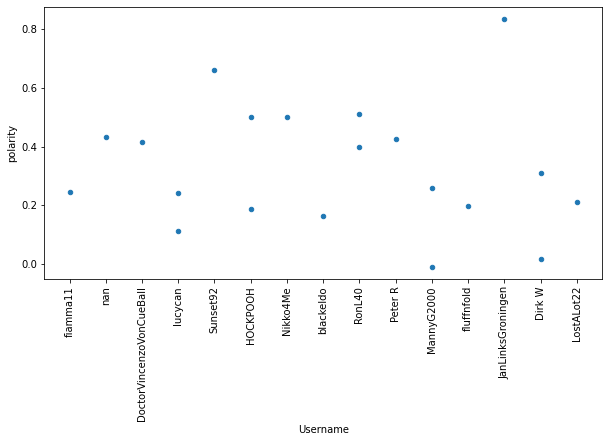

In [120]:
from textblob import TextBlob

def sentiment_func(x):
    sentiment = TextBlob(x['Text'])
    x['polarity'] = sentiment.polarity
    x['subjectivity'] = sentiment.subjectivity
    return x

sample = helpful_users.sample(20).apply(sentiment_func, axis=1)
sample.plot.scatter('Username', 'polarity').tick_params(axis='x', labelrotation = 90)

In [122]:
helpful_users_condensed = helpful_users[helpful_users.columns[[10, 5, 0, 8]]]
helpful_users_condensed

,Username,User_Helpful,Attraction,Text
22139,Dirk W,988,Museum of Fine Arts,"To be honest, it was not a planned visit and we only learned about this Museum whilst in Boston (the fact that it was free entry from 4pm that day encouraged us even more). But, boy, are we glad we went there ! What a great surprise to find such a huge collection of Dutch Golden Age and French impressionists ! Being European tourists, that's where we spent all of our time ; but we learned later that the American Art displays are even more impressive. So much splendid art, so little time . . . next time, for sure."
20974,Nikko4Me,987,Museum of Fine Arts,"In addition to seeing the Art in Bloom displays around the museum, we viewed Botticelli and Search for the Divine, Make Way for Ducklings: The Art of Robert McCloskey, and Matisse in the Studio. The Matisse exhibit was interesting as the you can see the works with the objects of inspiration including a pewter jug, a chocolate maker, an Andalusian vase, textiles, sculptures and masks."
19426,Dirk W,987,Freedom Trail,"Just follow the red brick road, you cannot go wrong. We walked it several times on our way from Boston Common to a restaurant around Faneuil Hall. Then finally we bought tickets for the guided tour from the kiosk in Boston Common and joined a small group of about 8 people. The tour guide was most informative and entertaining : at $ 12 per person it is a small investment to learn heaps about an important period of Boston's (and America's !) history in a fun way."
27259,LostALot22,973,Fenway Park,I was here for an afternoon game. The weather was ok and it wasnâ€™t that crowded. Itâ€™s a great old park that is full of character and they embrace the past. Itâ€™s a great place to go. Iâ€™ve been to over 20 parks and this is second only to Wrigley.
21284,fluffnfold,949,Museum of Fine Arts,"My spouse and I visited Bostonâ€™s Museum of Fine Arts (MFA) on a Saturday afternoon in late May 2017. The museum is open daily from approximately 10:00 am until 5:00 pm, with extended hours until 10:00 pm on Wednesdays (including â€œWinedaysâ€ social event), Thursdays, and Fridays (including the monthly reoccurring â€œFirst Fridayâ€ cocktail party). Be sure to check their website for exact details. Admission costs $25 per adult, but you can enjoy a repeat visit within 10 days. If you visit the neighboring Isabella Stewart Gardner Museum (ISGM), you can save $2 on a combined admission. You are requested to check larger bags at the coat check counter. The over 600,000-square foot museum (founded in 1870) opened in its present Fenway-Kenmore neighborhood location in the early 1900s. The museum seems to occupy a series of interconnected buildings and wings (which makes navigating around a bit tricky). The museum collection is displayed in over 30 spacious, high-ceilinged galleries spread over four floors (including the basement). You can use either stairs or elevators to travel between the levels. Several dining options are available, including Bravo, American CafÃ©, Taste, and the Garden Cafeteria (listed in descending order from most formal/expensive to least). The expansive glass-enclosed courtyard hosts one of my favorite pieces in the museum, Dale Chihulyâ€™s 42-foot-high lime green icicle tower. Another favorite space is the rotunda with colonnades and frescoes painted by John Singer Sargent. (We loved how the museum placed a mirror in the center of the first floor space so that you can view the reflected ceiling paintings without craning your neck - an interesting technique that we had not seen before!) The architecture of the museum itself is almost as interesting as the objects that hang inside it. The MFA's vast and varied collection of approximately 450,000 objects includes works by American painters (Homer, Sargent, Hopper, and Cassatt), Impressionists (Monet, Manet, Renoir, Degas, Van Gogh, Cezanne), sculptures, furniture, Egyptian artifacts, Asian art from Japan and China, African masks, Native Ame

### Dirk W's Reviews and polarity assessment

In [123]:
print(helpful_users_condensed.loc[22139, 'Attraction'])
helpful_users_condensed.loc[22139, 'Text']

Museum of Fine Arts


"To be honest, it was not a planned visit and we only learned about this Museum whilst in Boston (the fact that it was free entry from 4pm that day encouraged us even more). But, boy, are we glad we went there ! What a great surprise to find such a huge collection of Dutch Golden Age and French impressionists ! Being European tourists, that's where we spent all of our time ; but we learned later that the American Art displays are even more impressive. So much splendid art, so little time . . . next time, for sure."

In [124]:
print(helpful_users_condensed.loc[19426, 'Attraction'])
helpful_users_condensed.loc[19426, 'Text']

Freedom Trail


"Just follow the red brick road, you cannot go wrong. We walked it several times on our way from Boston Common to a restaurant around Faneuil Hall. Then finally we bought tickets for the guided tour from the kiosk in Boston Common and joined a small group of about 8 people. The tour guide was most informative and entertaining : at $ 12 per person it is a small investment to learn heaps about an important period of Boston's (and America's !) history in a fun way."

# Text Polarity/Basic Sentiment Analysis

In [125]:
from textblob import TextBlob

sample_size = len(ta_5vspoor)

def sentiment_func(x):
    sentiment = TextBlob(x['Text'])
    x['polarity'] = sentiment.polarity
    x['subjectivity'] = sentiment.subjectivity
    return x

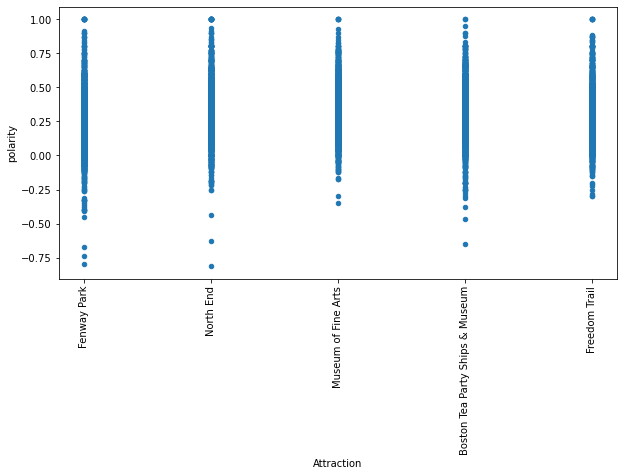

In [126]:
sample = ta_5vspoor.sample(sample_size).apply(sentiment_func, axis=1)
sample.plot.scatter('Attraction', 'polarity').tick_params(axis='x', labelrotation = 90)

In [127]:
fenway_poor = ta_5vspoor[(ta_5vspoor['Rating']=='Poor') &
           (ta_5vspoor['Attraction']=='Fenway Park')]
fenway_poor

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Loc1,User_Loc2,User_Loc3,User_Loc4,User_Loc5
13,Fenway Park,Boston,2018-08-01,2018-08-01,37,21,0,Poor,"Lots of shops , live buskers , and street food in Quincy market . It is for tourist . But It was alot of fun to visit",vibrant little area,Tender A,KOBE,JAPAN,,,
26482,Fenway Park,Boston,2018-08-01,2018-07-01,90,18,0,Poor,"We bought tickets online for a game before leaving the UK and found that there was a post restricting our view, I couldn't see either the pitcher or 1st base unless I sat at an angle! The stadium itself was lovely and getting through security and into the stadium was very easy as staff kept things going. There were loads of food and drink stalls outside for snacks.",Need to specify which seats have restricted views!,carol b,BRISTOL,UNITED KINGDOM,,,
26485,Fenway Park,Boston,2018-08-01,2018-08-01,77,25,0,Poor,"This was one of the top things to do on our list, we get there to take a tour only to find out that there is a festival going on that day and missed the last tour at 11am by 10 minutes and they would not let us in. This was not mentioned on your website what so ever!!! Terrible communication to your fans that have traveled so far and couldn't even view the stadium. Numerous staff members also mentioned that you need to do a better job of communicating with the public when tours will be canceled for that day, as this was also a problem last year. I'm sure if we would have been let in for a tour my review would have been different. Advise to others, call to make sure they are doing tours the day you plan on visiting.",Disappointing,weazer104,MICHIGAN,,,,
26492,Fenway Park,Boston,2018-09-01,2018-06-01,6,2,0,Poor,Fenway Park is a toilet and Fenway Franks are the worst Franks I have ever had. I am a huge baseball fan and I've been in a lot of stadiums and Fenway is the worst,The worst,Sixofone B,BROCKTON,MA,,,
26501,Fenway Park,Boston,2018-09-01,2018-08-01,4,3,1,Poor,"Tickets for this are available only on the day of the tour. IT IS A WASTE OF TIME AND MONEY!! We spent time on the field, were then ushered to sit down, the guide said that there was no time to talk about the history of the park (because the warm-up music started) but if you have questions to ask him. Then up to the Green Monster where we watched batting practice - and the tour was over. Are you kidding me?? The last time we took a group tour which was fun and informative - and you could buy tickets online. For this I had to go the the park earlier in the day to get the tickets? Forget about it!!",Pre-Game Tour,thishappycamper,NEW YORK,NY,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28384,Fenway Park,Boston,2019-08-01,2019-08-01,40,13,0,Poor,"I was so excited to tour Fenway but was disappointed. Our tour guide originally said they were going to split is into two groups because our group was so large but that didn't happen. So that means if you are stuck in the back of the group it is hard to hear and also was a problem when we went to sit up on the green monster and there was a limited area for us to be in. The tour only took us to various parts of the park where you could sit if you went to a game. We did not see any dugout, press box or get to go on the field. Very disappointing. I've been to several ballpark tours and this was the worst. It was a 2 pm tour on a Saturday and there was a game that night but the players were not even there yet so not sure why we didn't get to see more.",Disappointing Tour,hotel7231122,ORANGE COUNTY,CA,,,
28390,Fenway Park,Boston,2019-08-01,2019-08-01,70,25,0,Poor,"Tour guide was fine, but we did not get to go on the field due to it ""sprinkling"" even after it stopped we were not offered to go down. Nothing special about this tour vs the others that are WAY cheaper without the field experience. Really disappointed.","Tour was fine, but rushed and no field time",Brittanynicolexo,,,,

In [128]:
fenway_poor.loc[26485, 'Text']

"This was one of the top things to do on our list, we get there to take a tour only to find out that there is a festival going on that day and missed the last tour at 11am by 10 minutes and they would not let us in. This was not mentioned on your website what so ever!!! Terrible communication to your fans that have traveled so far and couldn't even view the stadium. Numerous staff members also mentioned that you need to do a better job of communicating with the public when tours will be canceled for that day, as this was also a problem last year. I'm sure if we would have been let in for a tour my review would have been different. Advise to others, call to make sure they are doing tours the day you plan on visiting."

In [129]:
fenway_poor.loc[26492, 'Text']

"Fenway Park is a toilet and Fenway Franks are the worst Franks I have ever had. I am a huge baseball fan and I've been in a lot of stadiums and Fenway is the worst"

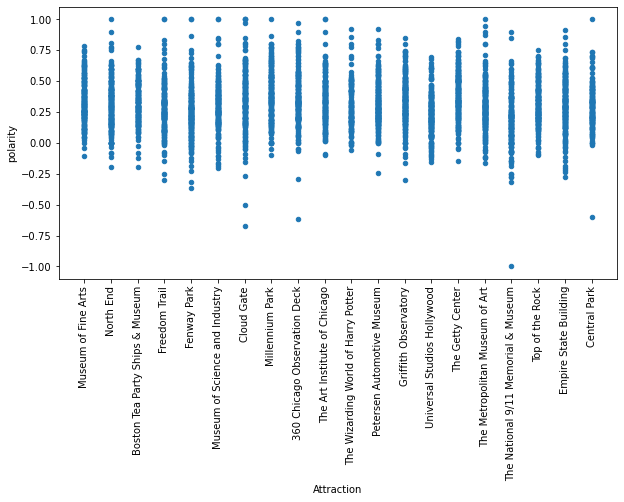

In [130]:
sample = group_city.sample(1000).apply(sentiment_func, axis=1)
sample.plot.scatter('Attraction', 'polarity').tick_params(axis='x', labelrotation = 90)

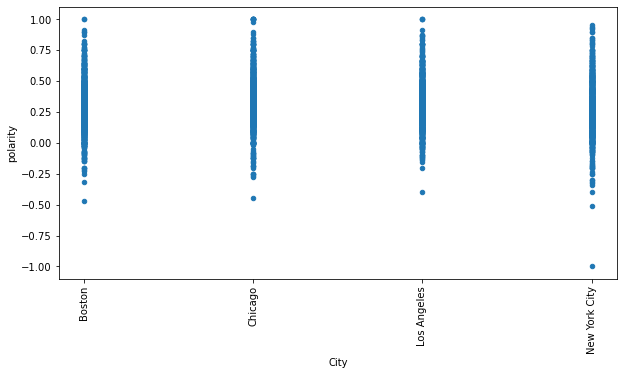

In [131]:
sample = group_city.sample(1000).apply(sentiment_func, axis=1)
sample.plot.scatter('City', 'polarity').tick_params(axis='x', labelrotation = 90)

# Analyzing Rating Based on Month and Year

In [132]:
ta_5vspoor.groupby('Attraction').agg(['count'])['Title']

ta_5vspoor_df = ta_5vspoor.loc[:, ['Visited', 'Rating']]
ta_5vspoor_df.sample(15)

,Visited,Rating
20769,2017-02-01,4
27148,2019-03-01,5
24540,2016-10-01,5
20808,2016-10-01,5
24317,2019-09-01,4
34553,2018-01-01,5
21035,2017-05-01,5
24184,2018-09-01,5
22853,2016-08-01,5
18710,2018-07-01,5


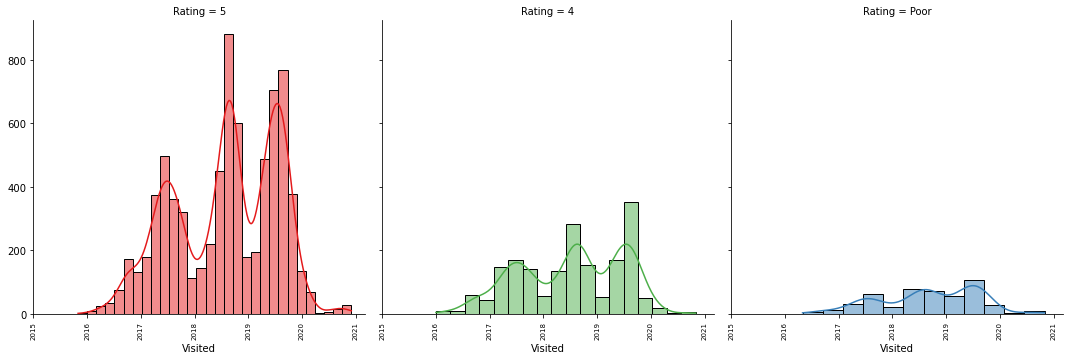

In [133]:
visited_grid = sns.FacetGrid(data=ta_5vspoor_df, col='Rating', hue="Rating", palette="Set1", height=5, 
                             aspect=1, col_order=ta_chng_rat.Rating.value_counts().index)

visited_grid.map(sns.histplot, "Visited", kde=True)

visited_grid.set_xticklabels(rotation='vertical', fontsize=7)

In [134]:
poor_date = ta_5vspoor[(ta_5vspoor['Visited']>'2019-03-01') &
           (ta_5vspoor['Visited']<'2019-09-01') &
           (ta_5vspoor['Rating']=='Poor')]
poor_date

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Loc1,User_Loc2,User_Loc3,User_Loc4,User_Loc5
23970,Boston Tea Party Ships & Museum,Boston,2019-04-01,2019-04-01,81,10,0,Poor,"This would be a super activity for families. My two sisters and I were in town for Marathon weekend and (even without children) thoroughly enjoyed the presentation - A mix of play along actors, multimedia and some museum pieces. I think kids under 6 would not really understand. Although it was an enjoyable hour I think it is probably $6 - $9 overpriced. Coming from Canada and adding the exchange rate made it not really worth the $30.US price",Fun and Informative - but Overpriced,TTTravels,MISSISSAUGA,CANADA,,,
23974,Boston Tea Party Ships & Museum,Boston,2019-04-01,2019-04-01,94,25,1,Poor,"Skip it. It's not a museum. There are a town hall re-enactment by the staff followed, a pretend tea tossing exercise, a quick walk around the boat, then a couple videos. The tea box handed down through generations is plausible, the tea recovered from the boot not so much. The digital picture technology was cool. Not a 'museum' experience.",If you are over 12 ...,Kristopher Kent,MIDDLETON,WI,,,
23975,Boston Tea Party Ships & Museum,Boston,2019-04-01,2019-04-01,184,82,0,Poor,Adult fare is $29 which is expensive for just over an hour. The staff are enthusiastic and we learned some interesting facts but it was all too hurried. Felt like we were on a conveyor waiting for the next group to be pushed through behind us. They couldnâ€™t wait to get us out into the attached tea room. Didnâ€™t even have enough time to â€œthrowâ€ tea box into the water. Poor value overall,Not good value and very hurried,Noshortcuts,YSTRADFELLTE,UNITED KINGDOM,,,
23978,Boston Tea Party Ships & Museum,Boston,2019-04-01,2019-04-01,41,8,0,Poor,"Seemed a bit expensive for what you got, but the kids enjoyed the interaction and it was well done. Plenty to see and gave a good Understanding of boston tea party",Great for kids,jeanpaulstoker,GOLD COAST,AUSTRALIA,,,
23980,Boston Tea Party Ships & Museum,Boston,2019-04-01,2019-04-01,19,1,0,Poor,"The admission fee is about $30/person, and the whole experience does not worth it. You would have a chance to dump the ""tea"" from the ship. Before coming, I expected I would see the ""real tea"" or something similar. The real experience was just dumping some regular boxes, which look like a pillow at my house. The lower level of the ship smelled weird, but that can be understood as it was a rainy day. However, the museum does have some interesting items from the Boston Tea Party, such as a tea container from the event. One short movie about the battle of Lexington and the midnight ride of Paul Revere is also included in the experience. Keep in mind that photos are prohibited for most of the parts.",Not worth your time and money!!,Gia Phuong Phan,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22413,Museum of Fine Arts,Boston,2019-08-01,2019-08-01,81,46,0,Poor,I went there to see Dennis Hopper paintings but the third floor was closed. They didnâ€™t advise me when I bought the tickets and there were no evidence of this on the site or in the museum I was really disappointed. The collection is amazing there are beautiful paintings but it is very difficult to orientate yourself in the museum. What a pity for the Hopper paintings.,Amazing collections but I didnâ€™t like the way is displayed,EarthGypsy,MILAN,ITALY,,,
26160,North End,Boston,2019-05-01,2019-05-01,"1,300",423,0,Poor,"I'm not sure what we were expecting but the North end was a little dull - plenty of Italian restaurants and a few historical sites, but it all felt a little artificial.",OK but a little disappointing,BrushM,OXFORD,UNITED KINGDOM,,,
26196,North End,Boston,2019-06-01,2019-06-01,152,55,0,Poor,We went by to see if we could go in but it was closed. They close pretty early. I think we were there around 4 and it was already

- There seems to be a larger uptick in poor ratings in middle of 2019

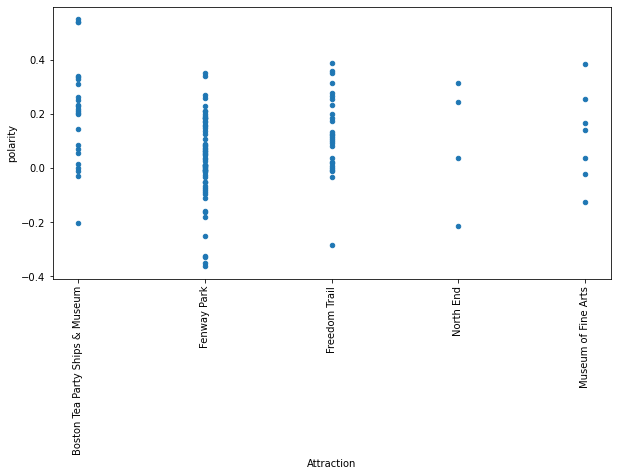

In [135]:
from textblob import TextBlob

sample_length = len(poor_date)

def sentiment_func(x):
    sentiment = TextBlob(x['Text'])
    x['polarity'] = sentiment.polarity
    x['subjectivity'] = sentiment.subjectivity
    return x

sample = poor_date.sample(sample_length).apply(sentiment_func, axis=1)
sample.plot.scatter('Attraction', 'polarity').tick_params(axis='x', labelrotation = 90)

In [136]:
poor_fp = poor_date[poor_date['Attraction']=='Fenway Park']

In [137]:
for i in list(poor_fp.index):
    print(i)
    print(poor_fp.loc[i, 'Attraction'])
    print(poor_fp.loc[i, 'Text'])
    print('\n')
    print('-'*50)

27176
Fenway Park
I purchased my ticket on line for pick up at Will Call window. Late opening of the ticket window and Automation problems led to standing there for 30 minutes. I guess I should be great full as that translated to less time spending crazy money. I have been to baseball stadiums all over the world but this one must be the most expensive. $5 for bottled water.


--------------------------------------------------
27183
Fenway Park
Went on this tour as part of a school field trip. The tour did not live up to my expectations, as it was very short and we didn't see very much. Upon leaving, it started to rain so we asked if we could eat our school lunches under the concourse; the answer was no. Weâ€¦


--------------------------------------------------
27199
Fenway Park
Guide was great. Park was interesting. Would have gone to a game if Sox were in town when I was. Sitting in the press box was very cool. Problem: stop hiding Yawkey's bigotry. It's part of the story. It's why Y

In [139]:
lemmatizer= WordNetLemmatizer()
stop_filters = stopwords.words('english') + list(string.punctuation) + ['boston', '’', "n't", "'s", 'u', 'get', "'m", 
                                                                        'also', '...' ,"'", '`', '``', '-', '"', "''", '""']

# Word Count

corpus_poor_fp = ' '.join(poor_fp[poor_fp['Text'].notnull()]['Text']).lower()
tokens_poor_fp = [lemmatizer.lemmatize(tokens) for tokens in word_tokenize(corpus_poor_fp) if tokens not in stop_filters]

fdist_poor_fp = FreqDist(tokens_poor_fp)
fdist_poor_fp.most_common(10)

[('tour', 87),
 ('fenway', 53),
 ('game', 52),
 ('park', 46),
 ('seat', 41),
 ('field', 31),
 ('stadium', 29),
 ('fan', 29),
 ('see', 28),
 ('ticket', 24)]

In [655]:
poor_date.loc[27183, 'Text']

"Went on this tour as part of a school field trip. The tour did not live up to my expectations, as it was very short and we didn't see very much. Upon leaving, it started to rain so we asked if we could eat our school lunches under the concourse; the answer was no. We…"

### Analyzing Ratings of Specific Attractions

In [318]:
ta_5vspoor_1 = ta_5vspoor[(ta_5vspoor['Attraction']=='Boston Tea Party Ships & Museum')]
ta_5vspoor_1

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Loc1,User_Loc2,User_Loc3,User_Loc4,User_Loc5
0,Boston Tea Party Ships & Museum,Boston,2017-03-01,2017-03-01,360,186,0,5,We stopped over here on our way to the airport...,Entertaining and Educational,nadiag0610,SAN DIEGO,CA,,,
1,Boston Tea Party Ships & Museum,Boston,2017-03-01,2017-03-01,174,17,0,5,Who knew committing treason could be fun? From...,History Comes Alive,1TravelNP,GREENSBORO,NC,,,
2,Boston Tea Party Ships & Museum,Boston,2017-03-01,2017-03-01,31,11,0,5,Loved this. It's great fun and there are some ...,Really well done,Paulrob75,LONDON,UNITED KINGDOM,,,
3,Boston Tea Party Ships & Museum,Boston,2017-03-01,2017-03-01,44,26,0,5,"Well organised tour, staff very knowledgeable ...",Very informative,budd1965,DERBY,UNITED KINGDOM,,,
4,Boston Tea Party Ships & Museum,Boston,2017-03-01,2017-03-01,21,2,0,5,This museum is very interactive and extremely ...,Wow!,Kara B,RICHMOND,TX,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34846,Boston Tea Party Ships & Museum,Boston,2017-11-01,2017-09-01,19,9,0,4,It was informative and fun - had some interest...,Tourism at its highest,AnnaDuke,LAS VEGAS,NV,,,
34849,Boston Tea Party Ships & Museum,Boston,2017-11-01,2017-08-01,78,8,0,4,What a well planned tourist attraction this is...,Take part,Diane A,NUNEATON,UNITED KINGDOM,,,
34851,Boston Tea Party Ships & Museum,Boston,2017-11-01,2017-10-01,15,6,0,5,This museum is an interactive one. The cast as...,History made Fun,Pamela F,BELTON,,,,
34853,Boston Tea Party Ships & Museum,Boston,2017-11-01,2017-10-01,88,8,0,5,Excellent history in an interactive session wi...,Historical entertainment,Lauren P,SURREY,UNITED KINGDOM,,,


In [319]:
ta_5vspoor_1_df = ta_5vspoor_1.loc[:, ['Visited', 'Rating']]
ta_5vspoor_1_df.sample(15)

,Visited,Rating
23499,2018-06-01,5
22958,2017-08-01,5
22721,2017-05-01,4
23127,2017-10-01,5
24298,2019-09-01,5
23593,2018-07-01,5
23760,2018-09-01,5
22860,2017-07-01,Poor
23017,2017-07-01,5
23338,2018-03-01,5


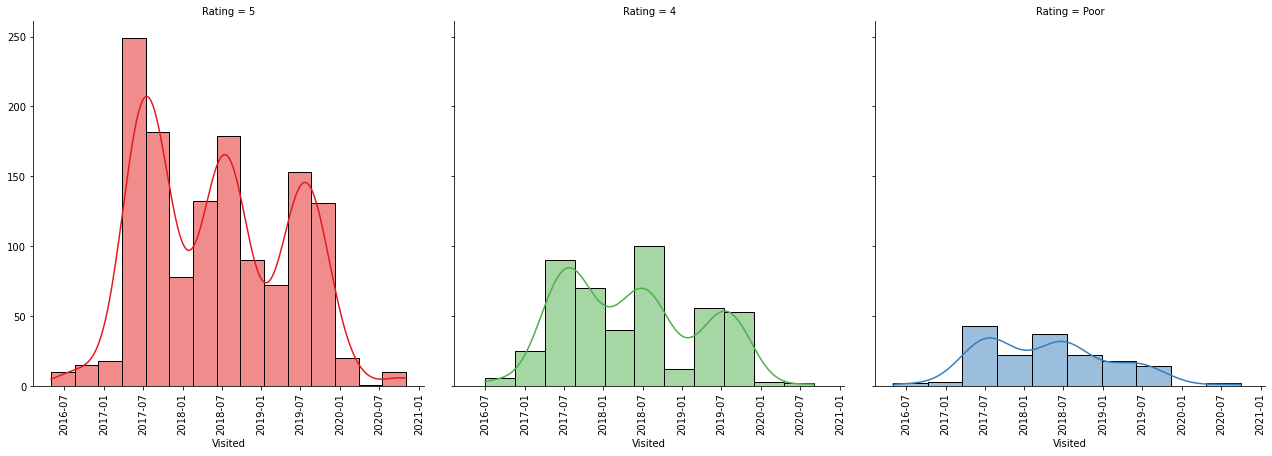

In [320]:
visited_grid_1 = sns.FacetGrid(data=ta_5vspoor_1_df, col='Rating', hue="Rating", palette="Set1", height=6, aspect=1,
                             col_order=ta_chng_rat.Rating.value_counts().index)

visited_grid_1.map(sns.histplot, "Visited", kde=True)

visited_grid_1.set_xticklabels(rotation='vertical', fontsize=10)

- There were fewer poor ratings in the summer/fall of 2019
- This seems to indicate the later reviews may be better overall during the seasonal spike

In [321]:
ta_5vspoor_2 = ta_5vspoor[(ta_5vspoor['Attraction']=='Fenway Park')]
ta_5vspoor_2

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Loc1,User_Loc2,User_Loc3,User_Loc4,User_Loc5
10,Fenway Park,Boston,2018-08-01,2018-08-01,7,21,0,5,We went on the stadium tour and this was very ...,Great tour experience,morrisonpaul47,DUDLEY,UNITED KINGDOM,,,
11,Fenway Park,Boston,2018-08-01,2018-07-01,7,0,0,5,Absolutely the best seats in the house. Fenway...,Green Monster seats,Linda B,OPPENHEIM,UNITED STATES,,,
12,Fenway Park,Boston,2018-08-01,2018-08-01,17,2,0,5,I hadn’t been back to Fenway Park since I move...,Still the Greatest Place to see MLB,Philip L,LAS VEGAS,NV,,,
13,Fenway Park,Boston,2018-08-01,2018-08-01,37,21,0,Poor,"Lots of shops , live buskers , and street food...",vibrant little area,Tender A,KOBE,JAPAN,,,
14,Fenway Park,Boston,2018-08-01,2018-08-01,74,23,0,5,We went to 2 Yankees Red Sox games here. We lo...,Yankees Red Sox,T W,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34448,Fenway Park,Boston,2018-09-01,2018-09-01,159,28,0,5,We always wanted to go and see the green monst...,On the bucket list,The_Mold_Guy,CALEDON,CANADA,,,
34450,Fenway Park,Boston,2018-09-01,2018-09-01,53,5,0,5,I have been a Sox fan since 7 years old and ha...,3 days in Boston..,JohnnyK14,GRIMSBY,CANADA,,,
34451,Fenway Park,Boston,2018-09-01,2018-09-01,17,2,0,5,"Just like the title says, we lost the game but...","We lost, but great time and game",Ed2553377,GLENVILLE,NY,,,
34454,Fenway Park,Boston,2018-09-01,2018-09-01,53,8,0,5,25 of us flew to Boston specifically to attend...,30 on 30,dale b,NAPERVILLE,IL,,,


In [322]:
ta_5vspoor_2_df = ta_5vspoor_2.loc[:, ['Visited', 'Rating']]
ta_5vspoor_2_df.sample(15)

,Visited,Rating
34417,2018-10-01,5
28194,2019-09-01,5
27433,2019-06-01,5
27378,2019-06-01,5
27989,2019-08-01,5
26671,2018-09-01,5
27937,2019-08-01,5
27284,2019-05-01,5
27920,2019-09-01,5
26695,2018-09-01,5


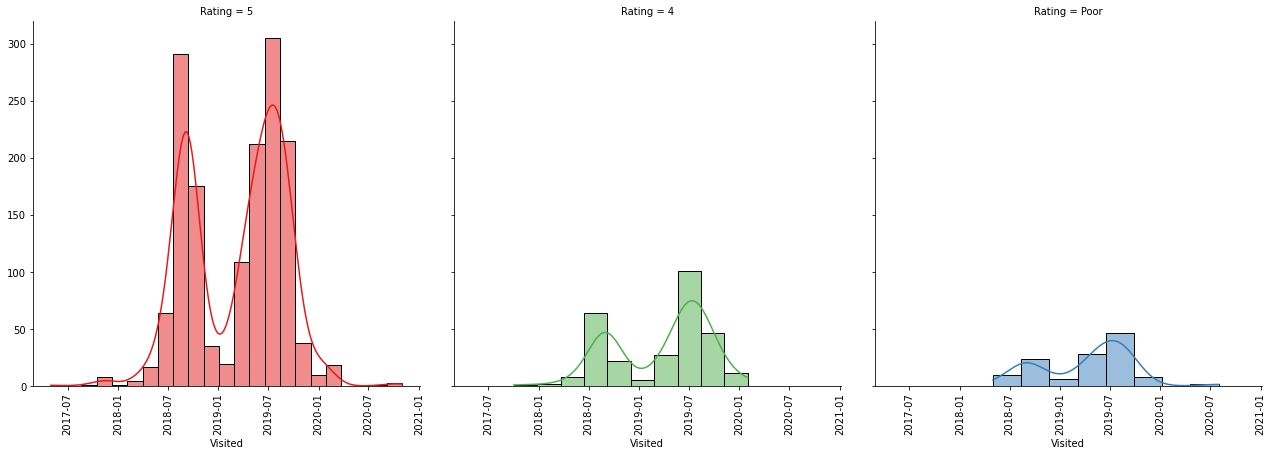

In [323]:
visited_grid_2 = sns.FacetGrid(data=ta_5vspoor_2_df, col='Rating', hue="Rating", palette="Set1", height=6, aspect=1,
                             col_order=ta_chng_rat.Rating.value_counts().index)

visited_grid_2.map(sns.histplot, "Visited", kde=True)

visited_grid_2.set_xticklabels(rotation='vertical', fontsize=10)

- Based on what we can see from the poor ratings histogram from Fenway Park, we may be able to conjecture that the significant increase in poor ratings in Boston was caused by this uptake

In [324]:
ta_5vspoor_3 = ta_5vspoor[(ta_5vspoor['Attraction']=='Freedom Trail')]
ta_5vspoor_3

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Loc1,User_Loc2,User_Loc3,User_Loc4,User_Loc5
15,Freedom Trail,Boston,2018-08-01,2018-07-01,176,6,0,5,"I love history, so I found out about the Freed...",A blast from the past,Brent N,METAIRIE,LA,,,
16,Freedom Trail,Boston,2018-08-01,2018-07-01,470,20,1,5,I've wanted to do this for a long time and fin...,A must do when visiting Boston.,MyGeeklings,,,,,
17,Freedom Trail,Boston,2018-08-01,2018-07-01,46,19,0,5,This was a great walking tour. We could go at ...,Amazing history,Sandra K,SPRINGFIELD,MO,,,
18,Freedom Trail,Boston,2018-08-01,2018-08-01,3,0,0,5,Isaiah Thomas was the best tour I have ever ha...,Best tour ever,Travis R,,,,,
19,Freedom Trail,Boston,2018-08-01,2018-07-01,116,37,2,5,"There are many reviews, so I’ll keep it brief....",History of America,Chateau Believe,BIG BEAR REGION,CA,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34842,Freedom Trail,Boston,2019-09-01,2019-08-01,97,39,0,5,A must-do for anyone into the historical aspec...,Did only part- but worth it!,910dianel,HARRISBURG,PA,,,
34844,Freedom Trail,Boston,2019-09-01,2019-08-01,42,13,0,5,You will learn a lot about American history......,A must do in Boston,Laurahill269,PITTSBURGH,PA,,,
34847,Freedom Trail,Boston,2019-09-01,2019-08-01,750,91,0,5,The Freedom Trail was a great history lesson o...,History Lesson,HNBISOFF,BEDFORD,TX,,,
34850,Freedom Trail,Boston,2019-09-01,2019-08-01,19,1,0,4,I wanted to visit Boston to see historical lan...,"Wanted history, got history.",Chris,IDAHO,,,,


In [325]:
ta_5vspoor_3_df = ta_5vspoor_3.loc[:, ['Visited', 'Rating']]
ta_5vspoor_3_df.sample(15)

,Visited,Rating
18887,2018-08-01,5
18801,2018-07-01,5
20478,2019-11-01,4
19151,2018-09-01,5
19946,2019-07-01,Poor
19,2018-07-01,5
20172,2019-09-01,5
20606,2020-03-01,4
19183,2018-10-01,5
20128,2019-07-01,4


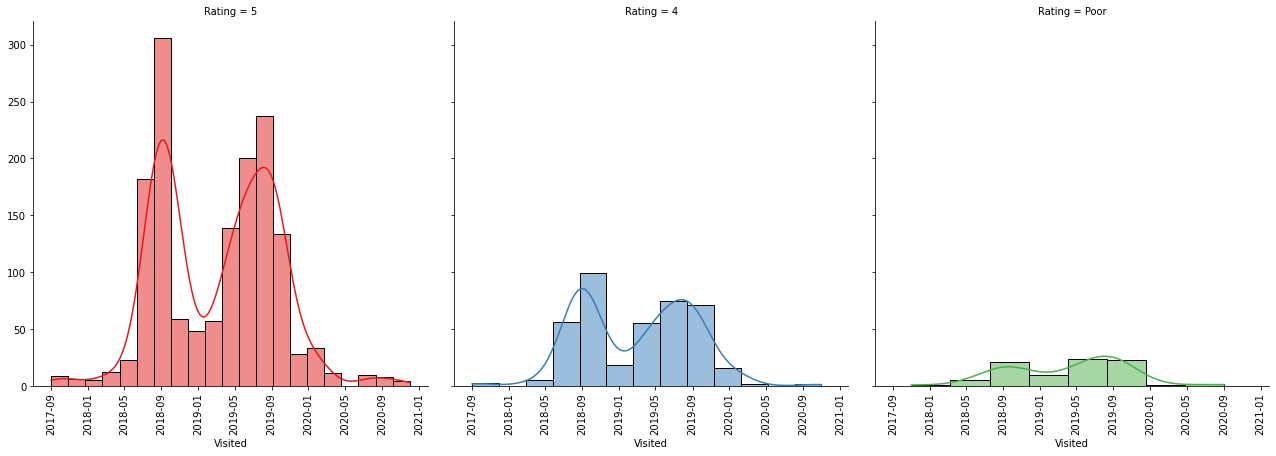

In [326]:
visited_grid_3 = sns.FacetGrid(data=ta_5vspoor_3_df, col='Rating', hue="Rating", palette="Set1", height=6, aspect=1,
                             col_order=ta_chng_rat.Rating.value_counts().index)

visited_grid_3.map(sns.histplot, "Visited", kde=True)

visited_grid_3.set_xticklabels(rotation='vertical', fontsize=10)

In [327]:
ta_5vspoor_4 = ta_5vspoor[(ta_5vspoor['Attraction']=='Museum of Fine Arts')]
ta_5vspoor_4

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Loc1,User_Loc2,User_Loc3,User_Loc4,User_Loc5
1990,Museum of Fine Arts,Boston,2016-12-01,2016-12-01,40,2,0,5,We visit the museum monthly and are always ple...,A great museum--period,M1786GJjosephc,BRAINTREE,MA,UNITED STATES,,
1991,Museum of Fine Arts,Boston,2016-12-01,2016-12-01,70,14,0,5,This one of the reasons Boston is a first clas...,A TREASURE,grandmeggy,ORLEANS,MA,,,
1992,Museum of Fine Arts,Boston,2016-12-01,2016-11-01,4,1,0,5,교통도 편하고 볼 작품이 많았음. 작품이 많아 충분한 시간을 가지고 가는 것이 좋을...,Great!!!,Sammy J,,,,,
1993,Museum of Fine Arts,Boston,2016-12-01,2016-12-01,2,1,0,5,Went to school in Boston and I would spend aft...,One of my favorite places in Boston,thatyoungtraveler,BOSTON,MA,,,
1994,Museum of Fine Arts,Boston,2016-12-01,2016-10-01,31,13,0,5,My only complaint was that I did not have time...,This is a world class facility,DAVID P,BRITISH COLUMBIA,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34589,Museum of Fine Arts,Boston,2017-02-01,2017-02-01,24,18,0,5,"I like the new member plans; however, I wish t...",Always Perfect,ladyselena,BOSTON,MA,,,
34591,Museum of Fine Arts,Boston,2017-02-01,2017-02-01,952,342,0,5,Just a phenomenal museum with a diverse and ec...,Few if any are better,HonestMcHonest,DENVER,CO,,,
34593,Museum of Fine Arts,Boston,2017-02-01,2016-07-01,"3,484",658,0,5,Outside the main entrance is a striking sculpt...,Magnificent range of exhibitions 5,Lavarcham,LONDON,UNITED KINGDOM,,,
34596,Museum of Fine Arts,Boston,2017-02-01,2016-12-01,261,85,0,4,I wish we had more time to spend in it but the...,Nice way to spend a cold afternoon,TousPourUn,MIAMI,FL,,,


In [328]:
ta_5vspoor_4_df = ta_5vspoor_4.loc[:, ['Visited', 'Rating']]
ta_5vspoor_4_df.sample(15)

,Visited,Rating
21730,2018-04-01,5
21119,2017-06-01,5
20744,2017-02-01,5
22565,2020-02-01,Poor
21142,2017-07-01,4
22495,2019-11-01,5
21288,2017-08-01,5
20755,2017-02-01,5
21835,2018-07-01,5
21617,2018-02-01,5


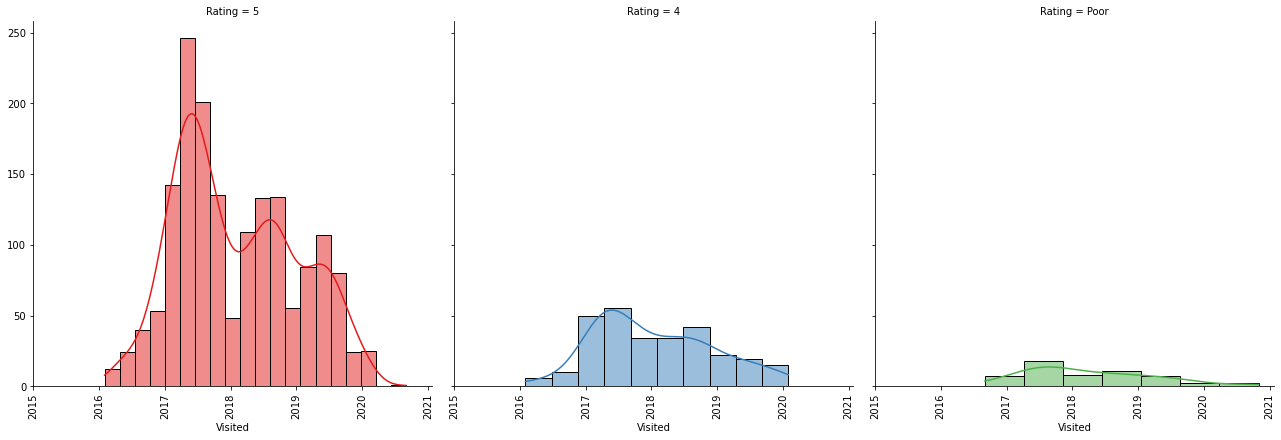

In [329]:
visited_grid_4 = sns.FacetGrid(data=ta_5vspoor_4_df, col='Rating', hue="Rating", palette="Set1", height=6, aspect=1,
                             col_order=ta_chng_rat.Rating.value_counts().index)

visited_grid_4.map(sns.histplot, "Visited", kde=True)

visited_grid_4.set_xticklabels(rotation='vertical', fontsize=10)

In [330]:
ta_5vspoor_5 = ta_5vspoor[(ta_5vspoor['Attraction']=='North End')]
ta_5vspoor_5

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Loc1,User_Loc2,User_Loc3,User_Loc4,User_Loc5
1995,North End,Boston,2016-10-01,2016-10-01,98,14,0,5,"Beautiful old buildings, historical sites, gre...",A must when your in Boston,Jill H,TEXAS,,,,
1996,North End,Boston,2016-10-01,2016-10-01,61,6,0,5,Lots of great Italian restaurants & history. B...,Cool area,dagogirl07,HOUSTON,TX,,,
1997,North End,Boston,2016-10-01,2016-10-01,13,0,0,5,Great Italian food. Almost any place you go to...,Get your Italian on,Timothy H,,,,,
1998,North End,Boston,2016-10-01,2016-10-01,79,25,0,4,The North End has great Italian food but do no...,Great food,delainao,DALLAS,TX,,,
1999,North End,Boston,2016-10-01,2016-09-01,25,7,0,5,Stunning area of Boston. Such a huge area for ...,Stunning & Busy,EvelynC845,YOUGHAL,IRELAND,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34478,North End,Boston,2017-11-01,2017-10-01,53,10,0,5,this was one of our favorite parts of Boston. ...,smell the garlic and fresh bread,jamie a,NASHVILLE,,,,
34480,North End,Boston,2017-10-01,2017-10-01,51,8,0,5,Love the north end ! It's got a great selectio...,Best spot in town,Lenore D,HUNTINGTON,NY,,,
34481,North End,Boston,2017-11-01,2017-11-01,54,8,0,4,"While I've been here before, I must say I enjo...",NOV Visit,Albert E,OLIVE BRANCH,MS,,,
34483,North End,Boston,2017-10-01,2017-09-01,49,12,0,5,"We stayed here on our visit to Boston, first t...",Loved the North End!,Teresa Y,,,,,


In [331]:
ta_5vspoor_5_df = ta_5vspoor_5.loc[:, ['Visited', 'Rating']]
ta_5vspoor_5_df.sample(15)

,Visited,Rating
24798,2016-12-01,4
24804,2017-01-01,5
25845,2018-08-01,5
26227,2019-06-01,4
25155,2017-07-01,4
25050,2017-06-01,5
25874,2018-08-01,5
24519,2016-10-01,Poor
25999,2018-10-01,Poor
25624,2018-03-01,5


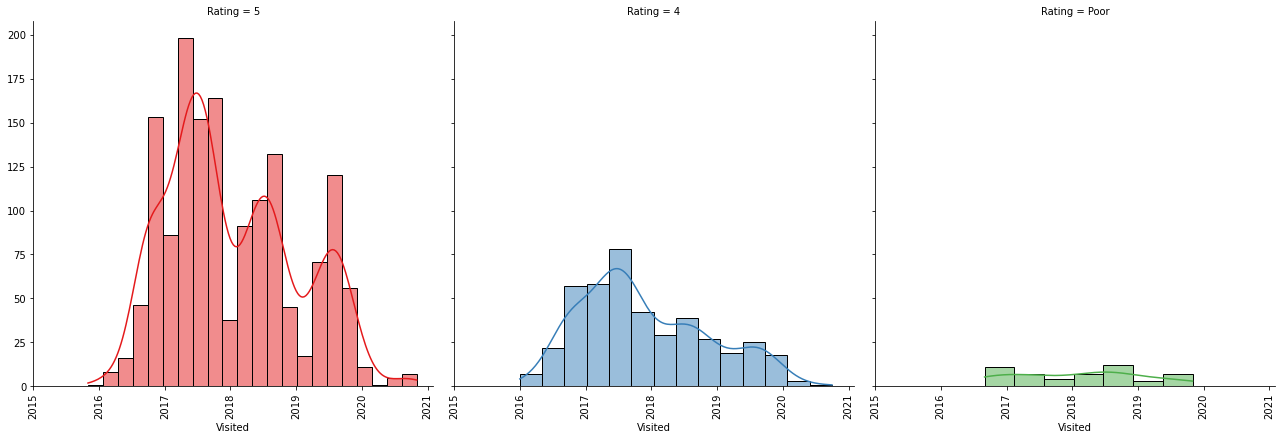

In [332]:
visited_grid_5 = sns.FacetGrid(data=ta_5vspoor_5_df, col='Rating', hue="Rating", palette="Set1", height=6, aspect=1,
                             col_order=ta_chng_rat.Rating.value_counts().index)

visited_grid_5.map(sns.histplot, "Visited", kde=True)

visited_grid_5.set_xticklabels(rotation='vertical', fontsize=10)

## Analyzing 5 star reviews on specific month and year

In [656]:
ta_5vspoor_date = ta_5vspoor[ta_5vspoor['Visited']=='2019-07-01']

corpus_5star_date = ' '.join(ta_5vspoor_date[ta_5vspoor_date['Rating']==5]['Text']).lower()
tokens_5star_date = [lemmatizer.lemmatize(tokens) for tokens in word_tokenize(corpus_5star_date) if tokens not in stop_filters]

bigram_5star_date = list(nltk.bigrams(tokens_5star_date))
fdist_bi_5star_date = FreqDist(bigram_5star_date)
fdist_bi_5star_date.most_common(10)

[(('freedom', 'trail'), 63),
 (('tour', 'guide'), 48),
 (('baseball', 'fan'), 41),
 (('fenway', 'park'), 37),
 (('red', 'sox'), 30),
 (('green', 'monster'), 28),
 (('north', 'end'), 28),
 (('tea', 'party'), 26),
 (('bunker', 'hill'), 21),
 (('paul', 'revere'), 18)]

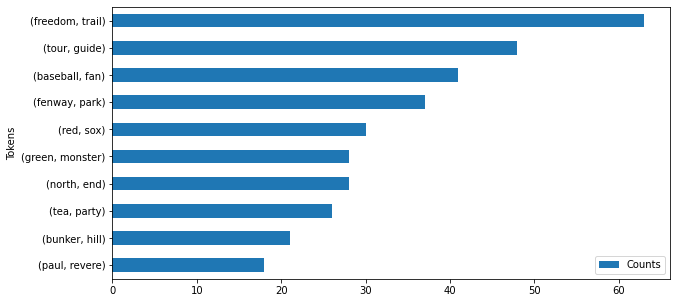

In [657]:
# Graph of 5 Star Bigram

fdist_bi_5star_date_graph = pd.DataFrame(fdist_bi_5star_date.most_common(10),
                                    columns=['Tokens', 'Counts']).set_index('Tokens').plot(kind='barh')
fdist_bi_5star_date_graph.invert_yaxis()

In [658]:
from textblob import TextBlob

sample_size = len(ta_5vspoor_date.Attraction)

def sentiment_func(x):
    sentiment = TextBlob(x['Text'])
    x['polarity'] = sentiment.polarity
    x['subjectivity'] = sentiment.subjectivity
    return x

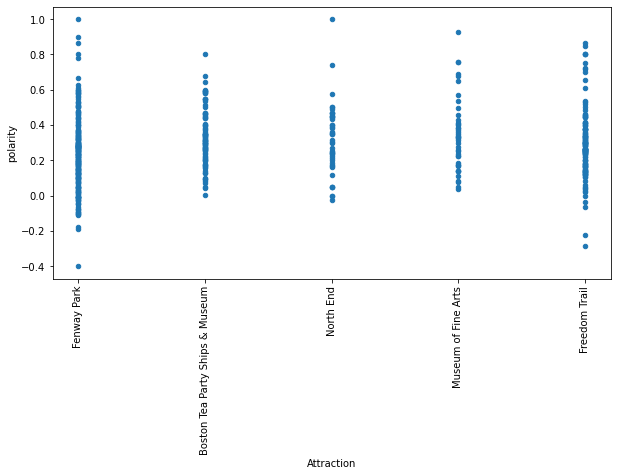

In [659]:
sample = ta_5vspoor_date.sample(sample_size).apply(sentiment_func, axis=1)
sample.plot.scatter('Attraction', 'polarity').tick_params(axis='x', labelrotation = 90)

- Analyzing all reviews on specific month and year

In [664]:
# Get reviews for June 2019
ta_date = ta_5vspoor[ta_5vspoor['Visited']=='2019-06-01']

In [665]:
corpus_date = ' '.join(ta_date['Text']).lower()
tokens_date = [lemmatizer.lemmatize(tokens) for tokens in word_tokenize(corpus_date) if tokens not in stop_filters]

bigram_date = list(nltk.bigrams(tokens_date))
fdist_bi_date = FreqDist(bigram_date)
fdist_bi_date.most_common(20)

[(('freedom', 'trail'), 58),
 (('fenway', 'park'), 38),
 (('tea', 'party'), 33),
 (('red', 'sox'), 31),
 (('tour', 'guide'), 30),
 (('baseball', 'fan'), 28),
 (('highly', 'recommend'), 26),
 (('north', 'end'), 21),
 (('ball', 'park'), 18),
 (('green', 'monster'), 18),
 (('along', 'way'), 17),
 (('north', 'church'), 15),
 (('bunker', 'hill'), 15),
 (('paul', 'revere'), 14),
 (('great', 'time'), 13),
 (('much', 'history'), 13),
 (('guided', 'tour'), 13),
 (('great', 'experience'), 12),
 (('great', 'place'), 12),
 (('red', 'brick'), 12)]

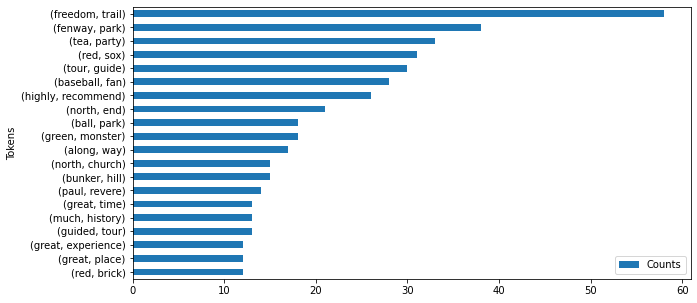

In [666]:
fdist_bi_date_graph = pd.DataFrame(fdist_bi_date.most_common(20),
                                    columns=['Tokens', 'Counts']).set_index('Tokens').plot(kind='barh')
fdist_bi_date_graph.invert_yaxis()

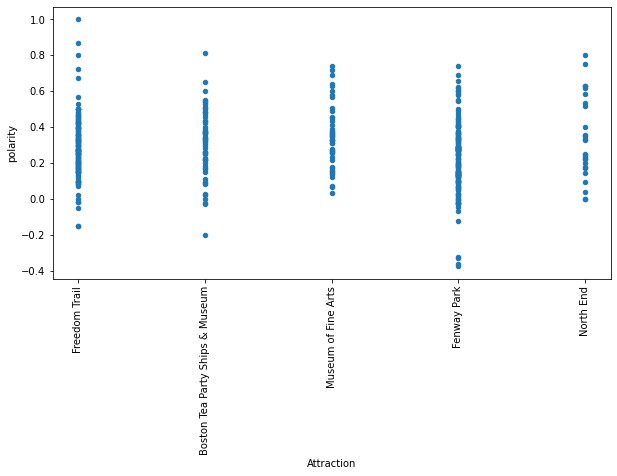

In [667]:
from textblob import TextBlob

sample_size = len(ta_date.Attraction)

def sentiment_func(x):
    sentiment = TextBlob(x['Text'])
    x['polarity'] = sentiment.polarity
    x['subjectivity'] = sentiment.subjectivity
    return x

sample = ta_date.sample(sample_size).apply(sentiment_func, axis=1)
sample.plot.scatter('Attraction', 'polarity').tick_params(axis='x', labelrotation = 90)

In [668]:
# Get reviews for Jan 2020
ta_date = ta_5vspoor[ta_5vspoor['Visited']=='2020-01-01']

In [669]:
corpus_date = ' '.join(ta_date['Text']).lower()
tokens_date = [lemmatizer.lemmatize(tokens) for tokens in word_tokenize(corpus_date) if tokens not in stop_filters]

bigram_date = list(nltk.bigrams(tokens_date))
fdist_bi_date = FreqDist(bigram_date)
fdist_bi_date.most_common(20)

[(('freedom', 'trail'), 13),
 (('tour', 'guide'), 5),
 (('highly', 'recommend'), 5),
 (('special', 'exhibit'), 5),
 (('red', 'line'), 4),
 (('north', 'end'), 4),
 (('well', 'worth'), 3),
 (('tea', 'party'), 3),
 (('baseball', 'fan'), 3),
 (('great', 'way'), 3),
 (('way', 'see'), 3),
 (('really', 'enjoyed'), 3),
 (('fenway', 'park'), 3),
 (('walking', 'freedom'), 3),
 (('along', 'way'), 3),
 (('guided', 'tour'), 3),
 (('burying', 'ground'), 3),
 (('little', 'italy'), 3),
 (('contemporary', 'art'), 3),
 (('great', 'experience'), 2)]

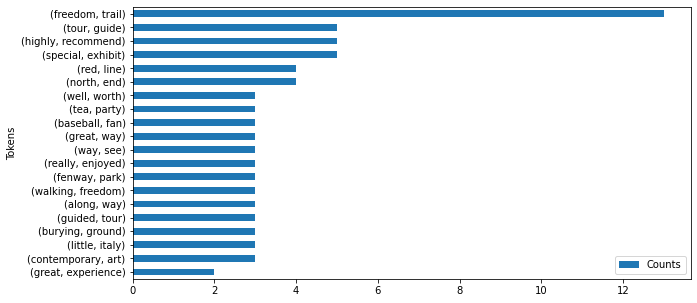

In [670]:
fdist_bi_date_graph = pd.DataFrame(fdist_bi_date.most_common(20),
                                    columns=['Tokens', 'Counts']).set_index('Tokens').plot(kind='barh')
fdist_bi_date_graph.invert_yaxis()

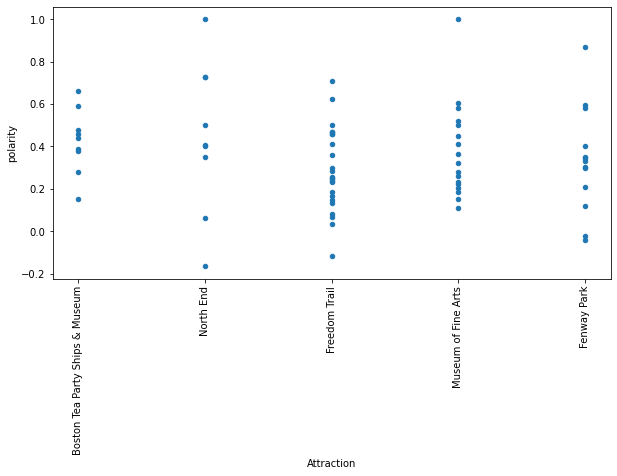

In [671]:
from textblob import TextBlob

sample_size = len(ta_date.Attraction)

def sentiment_func(x):
    sentiment = TextBlob(x['Text'])
    x['polarity'] = sentiment.polarity
    x['subjectivity'] = sentiment.subjectivity
    return x

sample = ta_date.sample(sample_size).apply(sentiment_func, axis=1)
sample.plot.scatter('Attraction', 'polarity').tick_params(axis='x', labelrotation = 90)

# User Location-Based Analysis

In [198]:
user_loc_df = tripadv[(tripadv['City']=='Boston') &
                     (tripadv['User_Loc2']!='')]
user_loc_agg_df = user_loc_df.groupby('User_Loc2')['Rating'].agg(['count', 'mean', 'std'])
user_loc_agg_df

,count,mean,std
User_Loc2,,,
GREECE,1,4.000000,NaN
AB,1,5.000000,NaN
AK,8,4.750000,0.462910
AL,58,4.775862,0.531238
ALBERTA,3,5.000000,0.000000
...,...,...,...
WI,79,4.658228,0.677213
WI,1,5.000000,NaN
WV,16,4.875000,0.341565


In [199]:
user_loc_agg_df_10 = user_loc_agg_df[user_loc_agg_df['count']>=10].sort_values('mean',
                                                                               ascending = False)
user_loc_agg_df_10.head(5)

,count,mean,std
User_Loc2,,,
WV,16,4.875000,0.341565
OK,40,4.825000,0.446496
SD,17,4.823529,0.392953
COLOMBIA,11,4.818182,0.404520
NJ,124,4.798387,0.493533


In [200]:
user_loc_agg_df_10.tail(5)

,count,mean,std
User_Loc2,,,
INDIA,46,4.543478,0.545956
ISRAEL,18,4.500000,0.857493
THE NETHERLANDS,30,4.466667,0.628810
SPAIN,16,4.437500,0.813941
SOUTH AFRICA,11,4.000000,1.000000


# Use States or 10 most common locations

In [673]:
ta_loc_1 = user_loc_df[(user_loc_df['User_Loc2']=='WV') |
                       (user_loc_df['User_Loc2']=='OK') |
                       (user_loc_df['User_Loc2']=='SD') |
                       (user_loc_df['User_Loc2']=='COLOMBIA') |
                       (user_loc_df['User_Loc2']=='NJ')]
ta_loc_1.sample(20)

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Loc1,User_Loc2,User_Loc3,User_Loc4,User_Loc5
23032,Boston Tea Party Ships & Museum,Boston,2017-08-01,2017-08-01,29,12,0,5,"This was a little pricey for my taste, but aft...",Worth a visit...you'll probably learn a few th...,danielmlennon,MIDDLETOWN,NJ,,,
19150,Freedom Trail,Boston,2018-10-01,2018-09-01,5,0,0,5,My three sisters and I were very grateful that...,We Loved Joan and Trailblazer Tours,Terabear,EL RENO,OK,,,
22244,Museum of Fine Arts,Boston,2019-04-01,2019-03-01,36,3,0,5,We went on a rainy day as there was little to ...,Not enough time!,Cassandra L,SIOUX FALLS,SD,,,
21037,Museum of Fine Arts,Boston,2017-05-01,2017-05-01,362,47,0,5,Regular and special exhibitions are not to be ...,Wonderful Boston museum,Carole S,WESTFIELD,NJ,,,
22897,Boston Tea Party Ships & Museum,Boston,2017-07-01,2017-07-01,55,29,0,5,The whole experience was excellent. It was ent...,Great site in American history,lunasatcc,HAZLET,NJ,,,
23084,Boston Tea Party Ships & Museum,Boston,2017-09-01,2017-08-01,47,21,0,5,The one thing our 19yo wanted to do in our lim...,A Must!,JTDQ,MEDFORD,NJ,,,
20759,Museum of Fine Arts,Boston,2017-02-01,2017-02-01,64,29,0,5,Nice museum with a good collection from around...,A solid afternoon to see,SteveCap,HACKETTSTOWN,NJ,,,
20167,Freedom Trail,Boston,2019-09-01,2019-09-01,961,185,0,4,Used Freedom Trail Boston Guide app along with...,Great way to experience history,Mountainman827,CUSTER,SD,,,
26357,North End,Boston,2019-10-01,2019-10-01,43,6,0,5,The North End is full of great restaurants and...,Fun and fattening place to walk around,Maggie S,TAGANGA,COLOMBIA,,,
23710,Boston Tea Party Ships & Museum,Boston,2018-08-01,2018-08-01,206,79,0,5,This was such a great tour! Each staff member ...,Must see piece of history!,grenisv,RAPID CITY,SD,,,


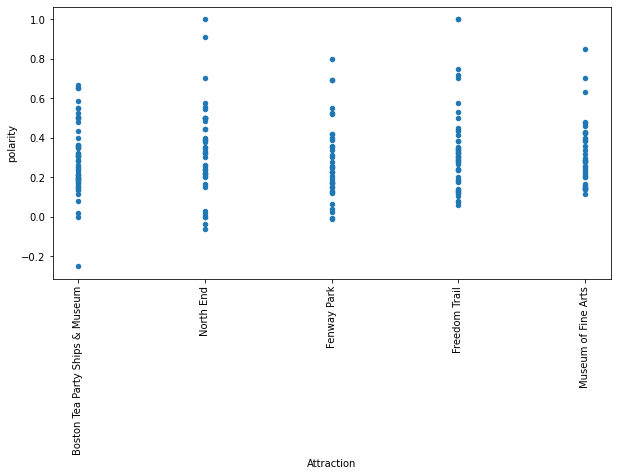

In [674]:
from textblob import TextBlob

sample_size = len(ta_loc_1.Attraction)

def sentiment_func(x):
    sentiment = TextBlob(x['Text'])
    x['polarity'] = sentiment.polarity
    x['subjectivity'] = sentiment.subjectivity
    return x

sample = ta_loc_1.sample(sample_size).apply(sentiment_func, axis=1)
sample.plot.scatter('Attraction', 'polarity').tick_params(axis='x', labelrotation = 90)

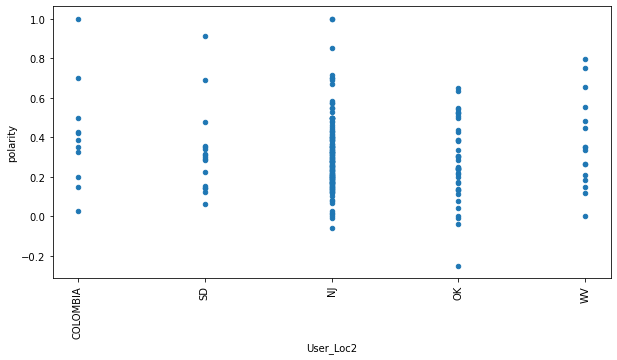

In [675]:
from textblob import TextBlob

sample_size = len(ta_loc_1.Attraction)

def sentiment_func(x):
    sentiment = TextBlob(x['Text'])
    x['polarity'] = sentiment.polarity
    x['subjectivity'] = sentiment.subjectivity
    return x

sample = ta_loc_1.sample(sample_size).apply(sentiment_func, axis=1)
sample.plot.scatter('User_Loc2', 'polarity').tick_params(axis='x', labelrotation = 90)

In [203]:
corpus_loc_1 = ' '.join(ta_loc_1['Text']).lower()
tokens_loc_1 = [lemmatizer.lemmatize(tokens) for tokens in word_tokenize(corpus_loc_1) if tokens not in stop_filters]

bigram_loc_1 = list(nltk.bigrams(tokens_loc_1))
fdist_bi_loc_1 = FreqDist(bigram_loc_1)
fdist_bi_loc_1.most_common(10)

[(('freedom', 'trail'), 11),
 (('tea', 'party'), 10),
 (('tour', 'guide'), 9),
 (('north', 'end'), 9),
 (('red', 'sox'), 5),
 (('baseball', 'fan'), 5),
 (('red', 'brick'), 5),
 (('history', 'lesson'), 4),
 (('great', 'tour'), 4),
 (('green', 'monster'), 4)]

In [204]:
trigram_loc_1 = list(nltk.trigrams(tokens_loc_1))
fdist_tri_loc_1 = FreqDist(trigram_loc_1)
fdist_tri_loc_1.most_common(10)

[(('paul', 'revere', 'house'), 3),
 (('time', 'tea', 'party'), 2),
 (('tea', 'party', 'ship'), 2),
 (('party', 'ship', 'museum'), 2),
 (('great', 'place', 'visit'), 2),
 (('last', 'minute', 'ticket'), 2),
 (('red', 'sox', 'fan'), 2),
 (('tour', 'guide', 'knowledgeable'), 2),
 (('great', 'tour', 'guide'), 2),
 (('old', 'north', 'church'), 2)]

In [205]:
ta_loc_2 = user_loc_df[(user_loc_df['User_Loc2']=='INDIA') |
                       (user_loc_df['User_Loc2']=='ISRAEL') |
                       (user_loc_df['User_Loc2']=='THE NETHERLANDS') |
                       (user_loc_df['User_Loc2']=='SPAIN') |
                       (user_loc_df['User_Loc2']=='SOUTH AFRICA')]
ta_loc_2.sample(20)

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Loc1,User_Loc2,User_Loc3,User_Loc4,User_Loc5
22496,Museum of Fine Arts,Boston,2019-11-01,2019-10-01,19,1,0,5,Great visit to Boston Museum of Fine Arts. Due...,Something for every art enthusiast,Geoff N,EINDHOVEN,THE NETHERLANDS,,,
24918,North End,Boston,2017-04-01,2017-04-01,986,193,0,5,"With a nice history, delectable food and neat ...",Interesting!,DipuKV,PUNE,INDIA,,,
20250,Freedom Trail,Boston,2019-09-01,2019-09-01,119,29,1,4,Its a great way to see the city. The walk isnt...,Great city walk,sanderdijk,BERKEL EN RODENRIJS,THE NETHERLANDS,,,
26474,Fenway Park,Boston,2018-08-01,2018-08-01,54,17,0,5,Everyone needs to attend Fenway park once in t...,Famous Green Monster,unwindwithspa,EINDHOVEN,THE NETHERLANDS,,,
19428,Freedom Trail,Boston,2019-01-01,2018-10-01,22,3,0,4,The freedom trail is a must for any visit to B...,Fun and Informative!,Gustav d,JOHANNESBURG,SOUTH AFRICA,,,
19945,Freedom Trail,Boston,2019-07-01,2018-09-01,29,17,0,5,Enjoyed this trail even though at the time my ...,A worthy experience,Josette M,CAPE TOWN CENTRAL,SOUTH AFRICA,,,
26530,Fenway Park,Boston,2018-09-01,2018-08-01,56,7,0,4,I'm not a baseball fan but really enjoyed the ...,Great vibes!,danielj1004,VELSERBROEK,THE NETHERLANDS,,,
20490,Freedom Trail,Boston,2019-12-01,2019-09-01,"2,539",314,1,5,A must do experience..You can learn about the ...,Best way to see Boston,Gopinath Prabhu,BELTHANGADY,INDIA,,,
23396,Boston Tea Party Ships & Museum,Boston,2018-04-01,2018-04-01,84,25,0,5,This isn't your typical museum! From the momen...,A fun and interactive experience,EmilyR44,PUNE,INDIA,,,
23463,Boston Tea Party Ships & Museum,Boston,2018-06-01,2018-05-01,165,35,0,4,"We had heard a lot about this attraction, henc...",peek into history,historycling,CHANDIGARH,INDIA,,,


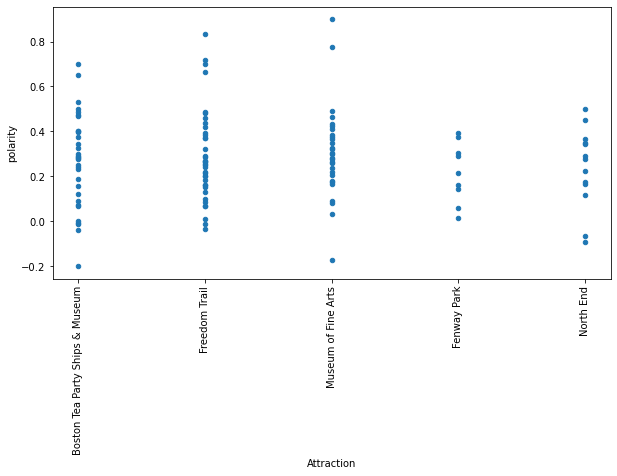

In [206]:
from textblob import TextBlob

sample_size = len(ta_loc_2.Attraction)

def sentiment_func(x):
    sentiment = TextBlob(x['Text'])
    x['polarity'] = sentiment.polarity
    x['subjectivity'] = sentiment.subjectivity
    return x

sample = ta_loc_2.sample(sample_size).apply(sentiment_func, axis=1)
sample.plot.scatter('Attraction', 'polarity').tick_params(axis='x', labelrotation = 90)

- We might be seeing that the reason why there are so many positive reviews in the top 5 count is that a lot of them went to Fenway
- we might want to consider how we market to different groups based on these grams

In [207]:
corpus_loc_2 = ' '.join(ta_loc_2['Text']).lower()
tokens_loc_2 = [lemmatizer.lemmatize(tokens) for tokens in word_tokenize(corpus_loc_2) if tokens not in stop_filters]

bigram_loc_2 = list(nltk.bigrams(tokens_loc_2))
fdist_bi_loc_2 = FreqDist(bigram_loc_2)
fdist_bi_loc_2.most_common(10)

[(('freedom', 'trail'), 16),
 (('tea', 'party'), 13),
 (('north', 'end'), 6),
 (('bunker', 'hill'), 5),
 (('american', 'history'), 4),
 (('history', 'city'), 4),
 (('along', 'trail'), 4),
 (('learn', 'history'), 4),
 (('museum', 'fine'), 4),
 (('fine', 'art'), 4)]

In [208]:
trigram_loc_2 = list(nltk.trigrams(tokens_loc_2))
fdist_tri_loc_2 = FreqDist(trigram_loc_2)
fdist_tri_loc_2.most_common(10)

[(('museum', 'fine', 'art'), 4),
 (('place', 'history', 'lover'), 2),
 (('must', 'visit', 'place'), 2),
 (('along', 'freedom', 'trail'), 2),
 (('freedom', 'trail', 'pass'), 2),
 (('bunker', 'hill', 'monument'), 2),
 (('learn', 'history', 'city'), 2),
 (('see', 'botticelli', 'exhibition'), 2),
 (('beautiful', 'peek', 'historic'), 1),
 (('peek', 'historic', 'tea'), 1)]

# Analysis of Review Text Polarity of the 20 most helpful users

In [581]:
helpful_users = ta_5vspoor.sort_values(by=['User_Helpful'], ascending = False).head(20)
helpful_users['Username'] = helpful_users['Username'].astype(str)
helpful_users

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Loc1,User_Loc2,User_Loc3,User_Loc4,User_Loc5
22139,Museum of Fine Arts,Boston,2019-01-01,2018-12-01,"4,905",988,0,5,"To be honest, it was not a planned visit and w...",Wonderful surprise,Dirk W,ALEXANDRA HEADLAND,AUSTRALIA,,,
20974,Museum of Fine Arts,Boston,2017-05-01,2017-04-01,"5,762",987,0,5,In addition to seeing the Art in Bloom display...,Another lovely Art in Bloom!,Nikko4Me,MILFORD,MA,,,
19426,Freedom Trail,Boston,2019-01-01,2018-12-01,"4,905",987,0,4,"Just follow the red brick road, you cannot go ...",Boston best,Dirk W,ALEXANDRA HEADLAND,AUSTRALIA,,,
27259,Fenway Park,Boston,2019-05-01,2019-05-01,"9,552",973,0,5,I was here for an afternoon game. The weather ...,Great park.,LostALot22,CHICAGO,IL,,,
21284,Museum of Fine Arts,Boston,2017-08-01,2017-05-01,"1,038",949,0,4,My spouse and I visited Boston’s Museum of Fin...,Great Permanent Collection and Nice Rotating E...,fluffnfold,PENNSYLVANIA,,,,
23175,Boston Tea Party Ships & Museum,Boston,2017-10-01,2017-10-01,"1,725",919,0,4,This is a great way to get children interested...,Good experience,Sunset92,BROOKLYN,NY,,,
25490,North End,Boston,2017-11-01,2017-10-01,"3,284",917,0,5,It's a beautiful place with great Italian rest...,Maybe the best Little italy in the US,RonL40,UTICA,NY,,,
34559,Museum of Fine Arts,Boston,2017-06-01,2017-06-01,"3,284",917,0,5,"Loved the Matisse, Botticelli and African-Amer...",Beautiful permanent collection. Great Matisse ...,RonL40,UTICA,NY,,,
19642,Freedom Trail,Boston,2019-05-01,2019-05-01,"2,559",904,0,5,The Freedom Trail takes you to about 17 sites ...,Walk it,lucycan,MINNEAPOLIS,MN,,,
26158,North End,Boston,2019-05-01,2019-05-01,"2,559",904,0,5,This is the area to the north of the 93 highwa...,Great area,lucycan,MINNEAPOLIS,MN,,,


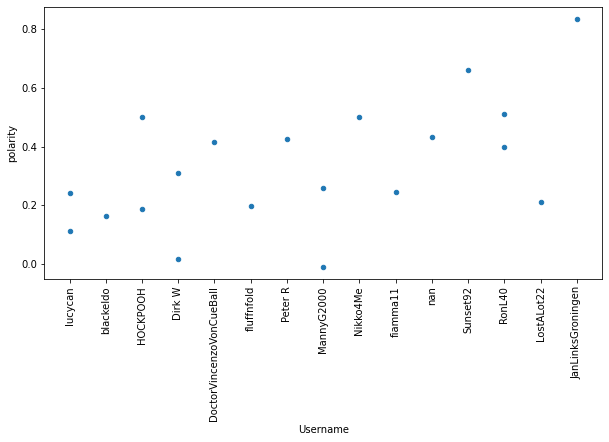

In [587]:
from textblob import TextBlob

def sentiment_func(x):
    sentiment = TextBlob(x['Text'])
    x['polarity'] = sentiment.polarity
    x['subjectivity'] = sentiment.subjectivity
    return x

sample = helpful_users.sample(20).apply(sentiment_func, axis=1)
sample.plot.scatter('Username', 'polarity').tick_params(axis='x', labelrotation = 90)

In [583]:
helpful_users_condensed = helpful_users[helpful_users.columns[[10, 5, 0, 8]]]
helpful_users_condensed

,Username,User_Helpful,Attraction,Text
22139,Dirk W,988,Museum of Fine Arts,"To be honest, it was not a planned visit and w..."
20974,Nikko4Me,987,Museum of Fine Arts,In addition to seeing the Art in Bloom display...
19426,Dirk W,987,Freedom Trail,"Just follow the red brick road, you cannot go ..."
27259,LostALot22,973,Fenway Park,I was here for an afternoon game. The weather ...
21284,fluffnfold,949,Museum of Fine Arts,My spouse and I visited Boston’s Museum of Fin...
23175,Sunset92,919,Boston Tea Party Ships & Museum,This is a great way to get children interested...
25490,RonL40,917,North End,It's a beautiful place with great Italian rest...
34559,RonL40,917,Museum of Fine Arts,"Loved the Matisse, Botticelli and African-Amer..."
19642,lucycan,904,Freedom Trail,The Freedom Trail takes you to about 17 sites ...
26158,lucycan,904,North End,This is the area to the north of the 93 highwa...


### Dirk W's Reviews and polarity assessment

In [590]:
print(helpful_users_condensed.loc[22139, 'Attraction'])
helpful_users_condensed.loc[22139, 'Text']

Museum of Fine Arts


"To be honest, it was not a planned visit and we only learned about this Museum whilst in Boston (the fact that it was free entry from 4pm that day encouraged us even more). But, boy, are we glad we went there ! What a great surprise to find such a huge collection of Dutch Golden Age and French impressionists ! Being European tourists, that's where we spent all of our time ; but we learned later that the American Art displays are even more impressive. So much splendid art, so little time . . . next time, for sure."

In [591]:
print(helpful_users_condensed.loc[19426, 'Attraction'])
helpful_users_condensed.loc[19426, 'Text']

Freedom Trail


"Just follow the red brick road, you cannot go wrong. We walked it several times on our way from Boston Common to a restaurant around Faneuil Hall. Then finally we bought tickets for the guided tour from the kiosk in Boston Common and joined a small group of about 8 people. The tour guide was most informative and entertaining : at $ 12 per person it is a small investment to learn heaps about an important period of Boston's (and America's !) history in a fun way."